# Load Data

In [162]:
tr = 'C:/Users/Lenovo/Downloads/FitbitTrainData.csv'
ts = 'C:/Users/Lenovo/Downloads/FitbitTestData.csv'
import pandas as pd
df_tr = pd.read_csv(tr)
df_ts = pd.read_csv(ts)

In [163]:
X_train = df_tr.drop(columns=['Calories'])
y_train = df_tr['Calories']
X_test = df_ts.drop(columns=['Calories'])
y_test = df_ts['Calories']

# Import Libraries

In [164]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet, BayesianRidge
from sklearn.tree import DecisionTreeRegressor
from xgboost import XGBRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.preprocessing import PolynomialFeatures
from catboost import CatBoostRegressor
from lightgbm import LGBMRegressor
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.model_selection import cross_val_score

In [165]:
from sklearn.metrics import (
    mean_squared_error,
    r2_score,
    mean_absolute_error,
    mean_absolute_percentage_error
)
import matplotlib.pyplot as plt
import time

# Define Function

In [166]:
import numpy as np
import matplotlib.pyplot as plt
import time
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error, mean_absolute_percentage_error
from sklearn.model_selection import KFold

def evaluate_model(model, model_name):
    start_time = time.time()
    
    # Inisialisasi K-Fold
    kf = KFold(n_splits=3, shuffle=True, random_state=42)
    
    rmse_train_list = []
    r2_train_list = []
    mae_train_list = []
    mape_train_list = []
    
    # K-Fold Cross Validation
    for train_index, val_index in kf.split(X_train):
        X_train_fold, X_val_fold = X_train.iloc[train_index], X_train.iloc[val_index]
        y_train_fold, y_val_fold = y_train.iloc[train_index], y_train.iloc[val_index]
        
        # Latih model pada lipatan
        model.fit(X_train_fold, y_train_fold)
        y_train_pred = model.predict(X_train_fold)
        y_val_pred = model.predict(X_val_fold)
        
        # Hitung metrik untuk lipatan
        rmse_train_list.append(np.sqrt(mean_squared_error(y_train_fold, y_train_pred)))
        r2_train_list.append(r2_score(y_train_fold, y_train_pred))
        mae_train_list.append(mean_absolute_error(y_train_fold, y_train_pred))
        mape_train_list.append(mean_absolute_percentage_error(y_train_fold, y_train_pred))

    # Rata-rata metrik untuk data latih
    rmse_train = np.mean(rmse_train_list)
    r2_train = np.mean(r2_train_list)
    mae_train = np.mean(mae_train_list)
    mape_train = np.mean(mape_train_list)

    # Latih model dengan semua data latih untuk evaluasi
    model.fit(X_train, y_train)
    
    # Hitung prediksi untuk data uji
    y_test_pred = model.predict(X_test)
    
    # Hitung metrik untuk data uji
    rmse_test = np.sqrt(mean_squared_error(y_test, y_test_pred))
    r2_test = r2_score(y_test, y_test_pred)
    mae_test = mean_absolute_error(y_test, y_test_pred)
    mape_test = mean_absolute_percentage_error(y_test, y_test_pred)

    # Hitung residual untuk data latih dan data uji
    y_train_pred = model.predict(X_train)  # Prediksi pada seluruh data latih
    residuals_train = y_train - y_train_pred
    residuals_test = y_test - y_test_pred
    mean_residual_train = np.mean(residuals_train)
    mean_residual_test = np.mean(residuals_test)

    # Plot residual
    plt.figure(figsize=(14, 6))

    # Plot residual dan nilai aktual vs prediksi
    plt.figure(figsize=(20, 6))

    # Residuals vs Predicted Values (data latih)
    plt.subplot(1, 3, 1)
    plt.scatter(y_train_pred, residuals_train, color='orange', alpha=0.5)
    plt.axhline(y=0, color='red', linestyle='--')
    plt.title('Residuals vs Predicted Values (Train)')
    plt.xlabel('Predicted Values (Train)')
    plt.ylabel('Residuals (Train)')
    
    # Residuals vs Predicted Values (data uji)
    plt.subplot(1, 3, 2)
    plt.scatter(y_test_pred, residuals_test, color='blue', alpha=0.5)
    plt.axhline(y=0, color='red', linestyle='--')
    plt.title('Residuals vs Predicted Values (Test)')
    plt.xlabel('Predicted Values (Test)')
    plt.ylabel('Residuals (Test)')
    
    # Actual vs Predicted Values (data uji)
    plt.subplot(1, 3, 3)
    plt.scatter(y_test, y_test_pred, color='green', alpha=0.5)
    plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')  # Garis diagonal
    plt.title('Actual vs Predicted Values (Test)')
    plt.xlabel('Actual Values')
    plt.ylabel('Predicted Values')

    plt.tight_layout()
    plt.show()

    end_time = time.time()
    training_time = end_time - start_time

    return {
        'Model': model_name,
        'Training Time (s)': training_time,
        'RMSE Train': rmse_train,
        'RMSE Test': rmse_test,
        'R2 Train': r2_train,
        'R2 Test': r2_test,
        'MAE Train': mae_train,
        'MAE Test': mae_test,
        'Mean Residual Train': mean_residual_train,
        'Mean Residual Test': mean_residual_test,
        'MAPE Train': mape_train,
        'MAPE Test': mape_test
    }

results = []


# Dataset without treatment

## Model: Baseline 

### Random Forest

<Figure size 1400x600 with 0 Axes>

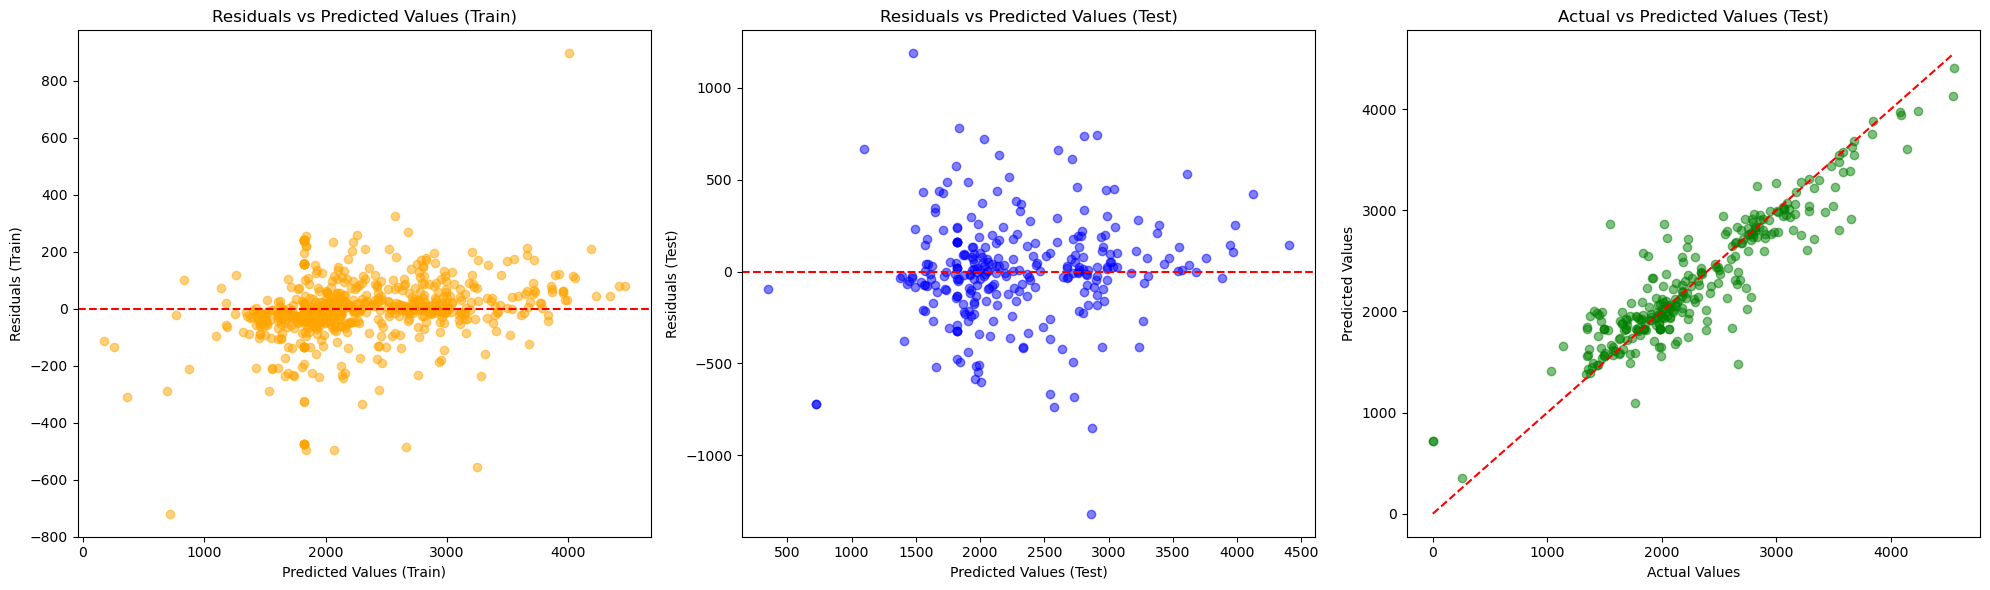

{'Model': 'Random Forest',
 'Training Time (s)': 31.58021330833435,
 'RMSE Train': 121.06773716697944,
 'RMSE Test': 282.4683338717226,
 'R2 Train': 0.9712889405878685,
 'R2 Test': 0.8420464662628393,
 'MAE Train': 79.58799228257816,
 'MAE Test': 192.02202289280652,
 'Mean Residual Train': -2.970519360963311,
 'Mean Residual Test': 2.3147126350014737,
 'MAPE Train': 4149169525665798.5,
 'MAPE Test': 2.2985925332178564e+16}

In [167]:
rf_results = evaluate_model(RandomForestRegressor(random_state=42), 'Random Forest')
results.append(rf_results)
rf_results

### Linear Regression

<Figure size 1400x600 with 0 Axes>

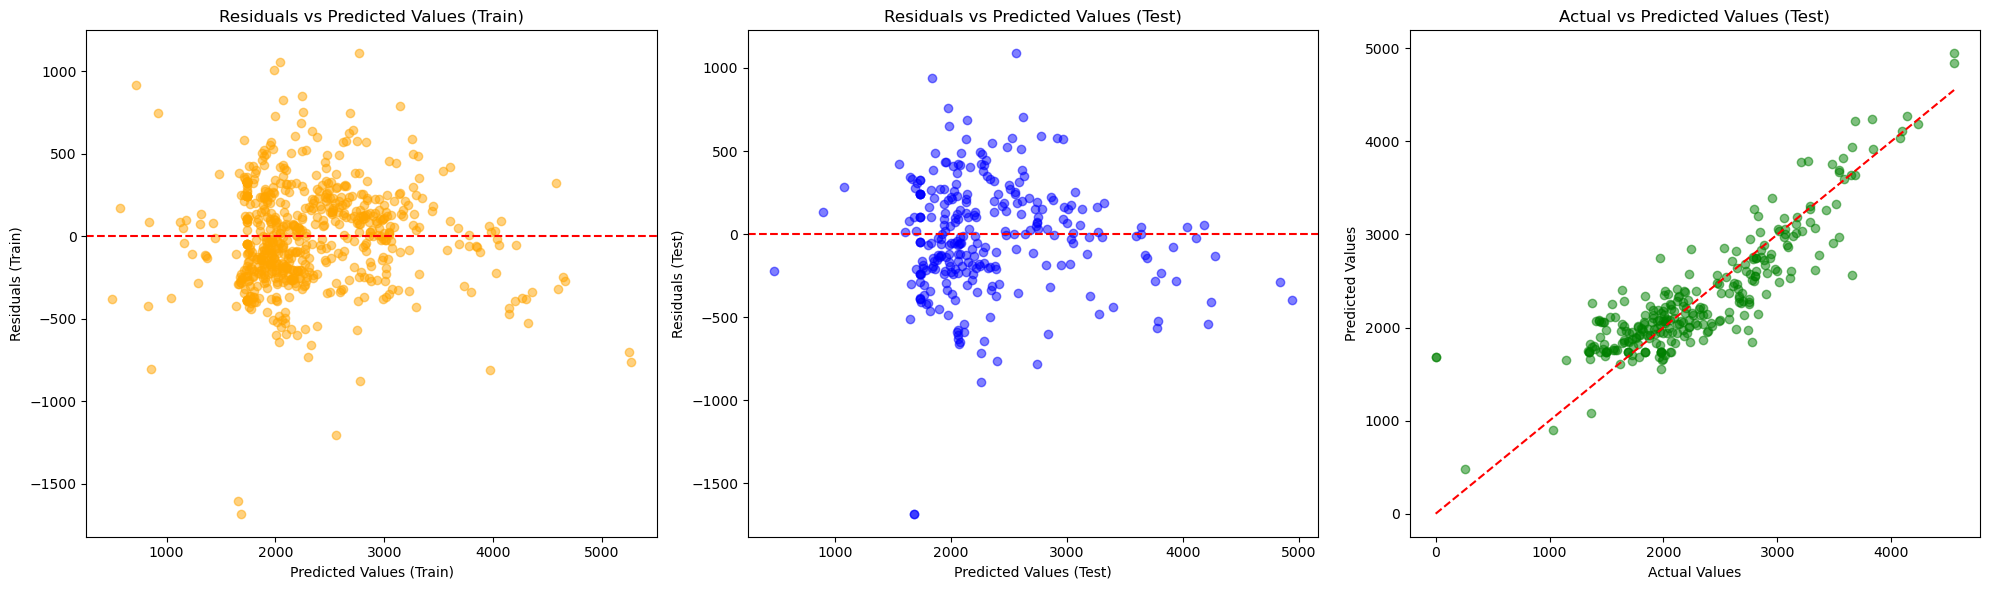

{'Model': 'Linear Regression',
 'Training Time (s)': 7.016064882278442,
 'RMSE Train': 298.2328291776293,
 'RMSE Test': 345.04497547062124,
 'R2 Train': 0.8258037790726914,
 'R2 Test': 0.7643099627417526,
 'MAE Train': 230.95294493315484,
 'MAE Test': 260.4319462900469,
 'Mean Residual Train': 0.0042340320433016145,
 'Mean Residual Test': -22.494684574106923,
 'MAPE Train': 1.129376449642153e+16,
 'MAPE Test': 5.37185890445479e+16}

In [168]:
lr_results = evaluate_model(LinearRegression(), 'Linear Regression')
results.append(lr_results)
lr_results

### Ridge

<Figure size 1400x600 with 0 Axes>

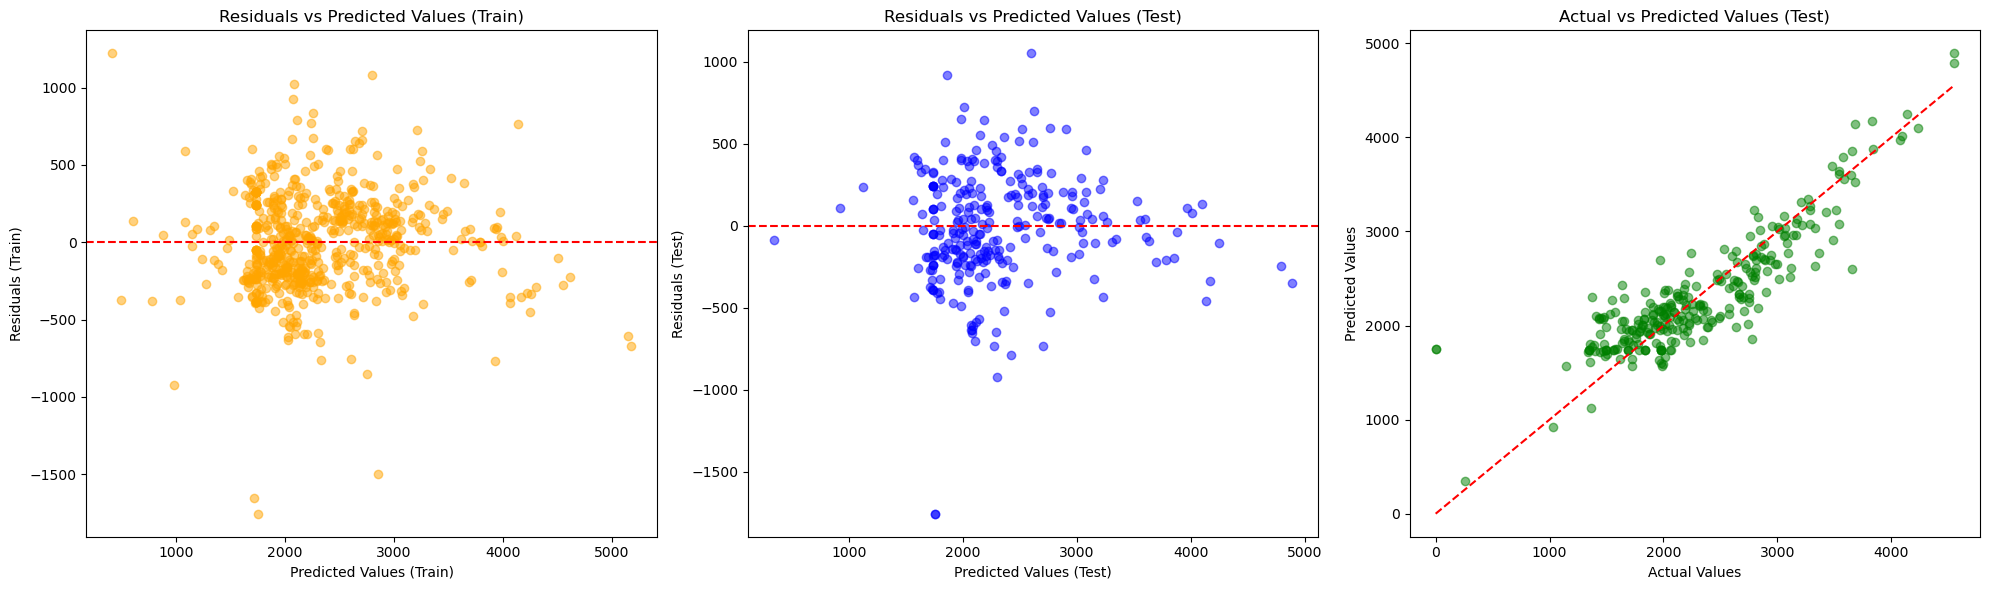

{'Model': 'Ridge',
 'Training Time (s)': 6.915497064590454,
 'RMSE Train': 303.46183787865704,
 'RMSE Test': 339.94788798226784,
 'R2 Train': 0.8197203979745038,
 'R2 Test': 0.7712218706755641,
 'MAE Train': 234.17093403098363,
 'MAE Test': 254.63694471833796,
 'Mean Residual Train': 1.3704714684249603e-13,
 'Mean Residual Test': -15.648389681705178,
 'MAPE Train': 1.1885117487826614e+16,
 'MAPE Test': 5.6051105130661144e+16}

In [169]:
ridge_results = evaluate_model(Ridge(random_state=42), 'Ridge')
results.append(ridge_results)
ridge_results

### Lasso

c:\Users\Lenovo\anacond3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:678: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.640e+06, tolerance: 2.288e+04
  model = cd_fast.enet_coordinate_descent(
c:\Users\Lenovo\anacond3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:678: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.531e+06, tolerance: 2.033e+04
  model = cd_fast.enet_coordinate_descent(
c:\Users\Lenovo\anacond3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:678: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.614e+06, toleranc

<Figure size 1400x600 with 0 Axes>

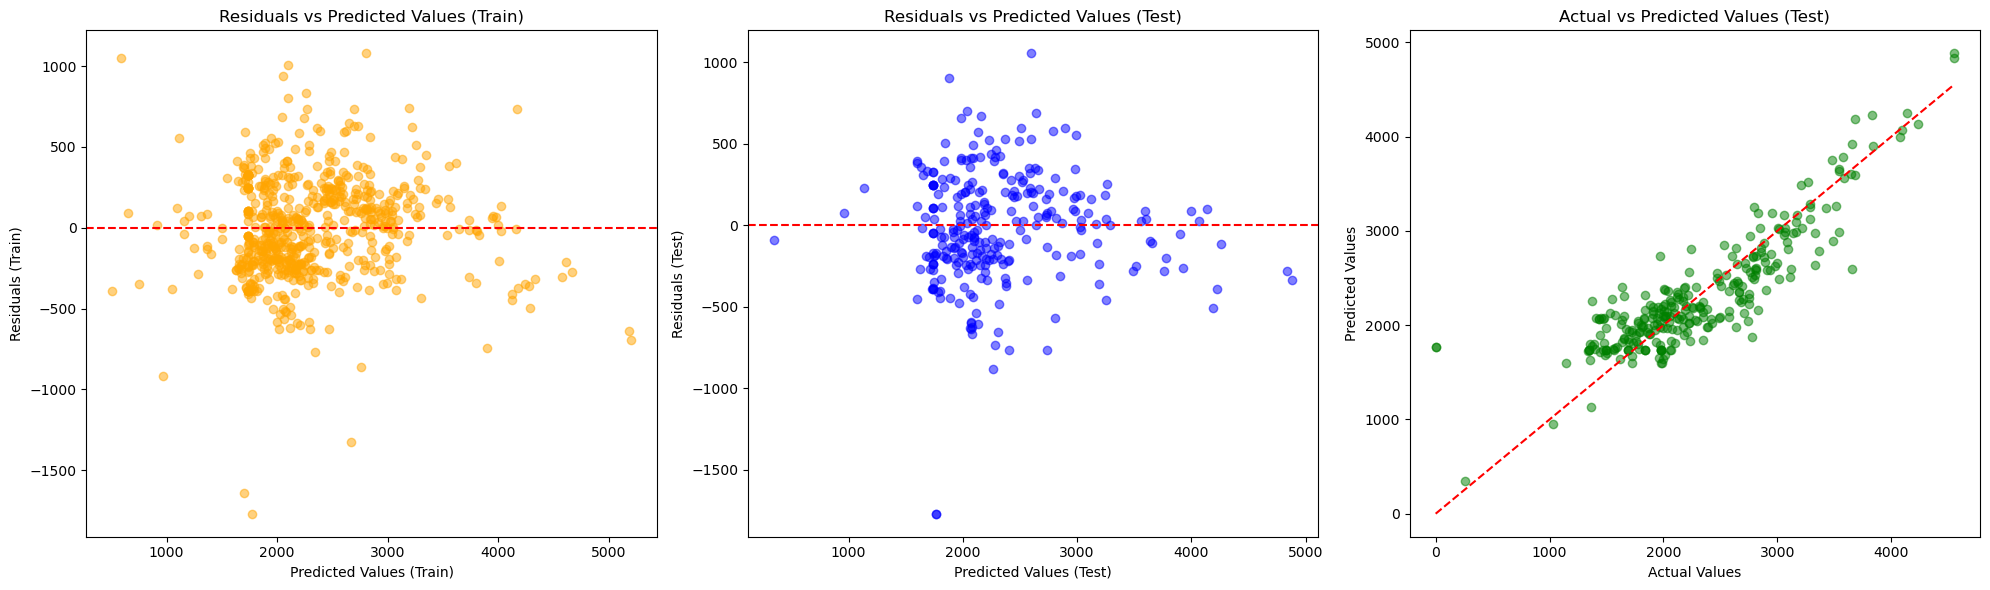

{'Model': 'Lasso',
 'Training Time (s)': 7.2979748249053955,
 'RMSE Train': 300.99826851936604,
 'RMSE Test': 343.6819458343972,
 'R2 Train': 0.8225530080409533,
 'R2 Test': 0.7661683754552496,
 'MAE Train': 233.92717860469338,
 'MAE Test': 258.89118944687146,
 'Mean Residual Train': 7.682946110867202e-14,
 'Mean Residual Test': -19.411492603468115,
 'MAPE Train': 1.1922532611034854e+16,
 'MAPE Test': 5.649834048893181e+16}

In [170]:
lasso_results = evaluate_model(Lasso(random_state=42), 'Lasso')
results.append(lasso_results)
lasso_results

### Elastic Net

<Figure size 1400x600 with 0 Axes>

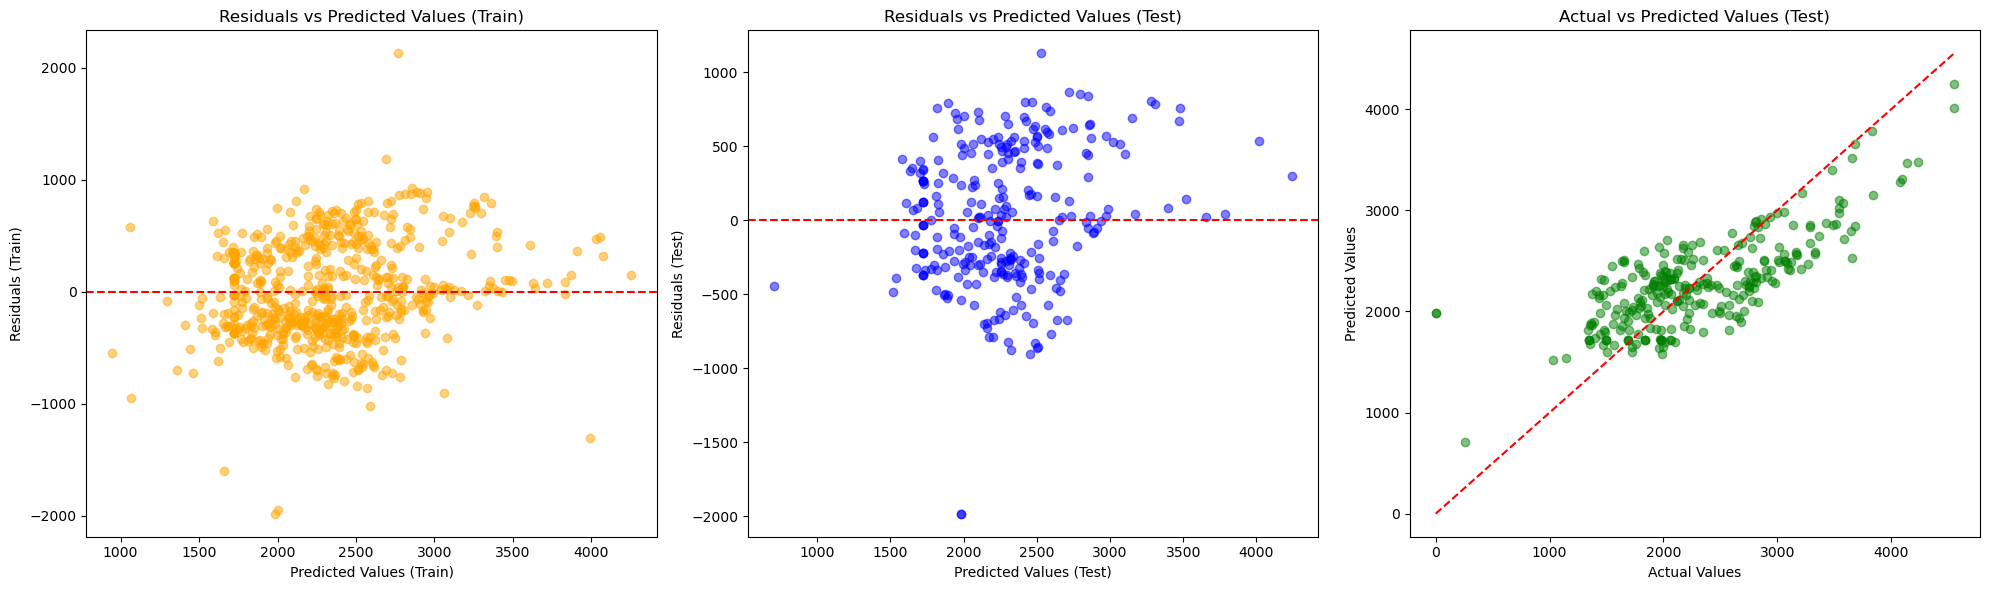

{'Model': 'Elastic Net',
 'Training Time (s)': 7.328069686889648,
 'RMSE Train': 438.94903928054623,
 'RMSE Test': 467.07391498601737,
 'R2 Train': 0.6221991203995371,
 'R2 Test': 0.5681220442182844,
 'MAE Train': 355.53589185634723,
 'MAE Test': 379.8430645182951,
 'Mean Residual Train': 1.7442364143590404e-13,
 'Mean Residual Test': 21.218839669937015,
 'MAPE Train': 1.347167375707603e+16,
 'MAPE Test': 6.334382344779568e+16}

In [171]:
elastic_net_results = evaluate_model(ElasticNet(random_state=42), 'Elastic Net')
results.append(elastic_net_results)
elastic_net_results

### Decision Tree

<Figure size 1400x600 with 0 Axes>

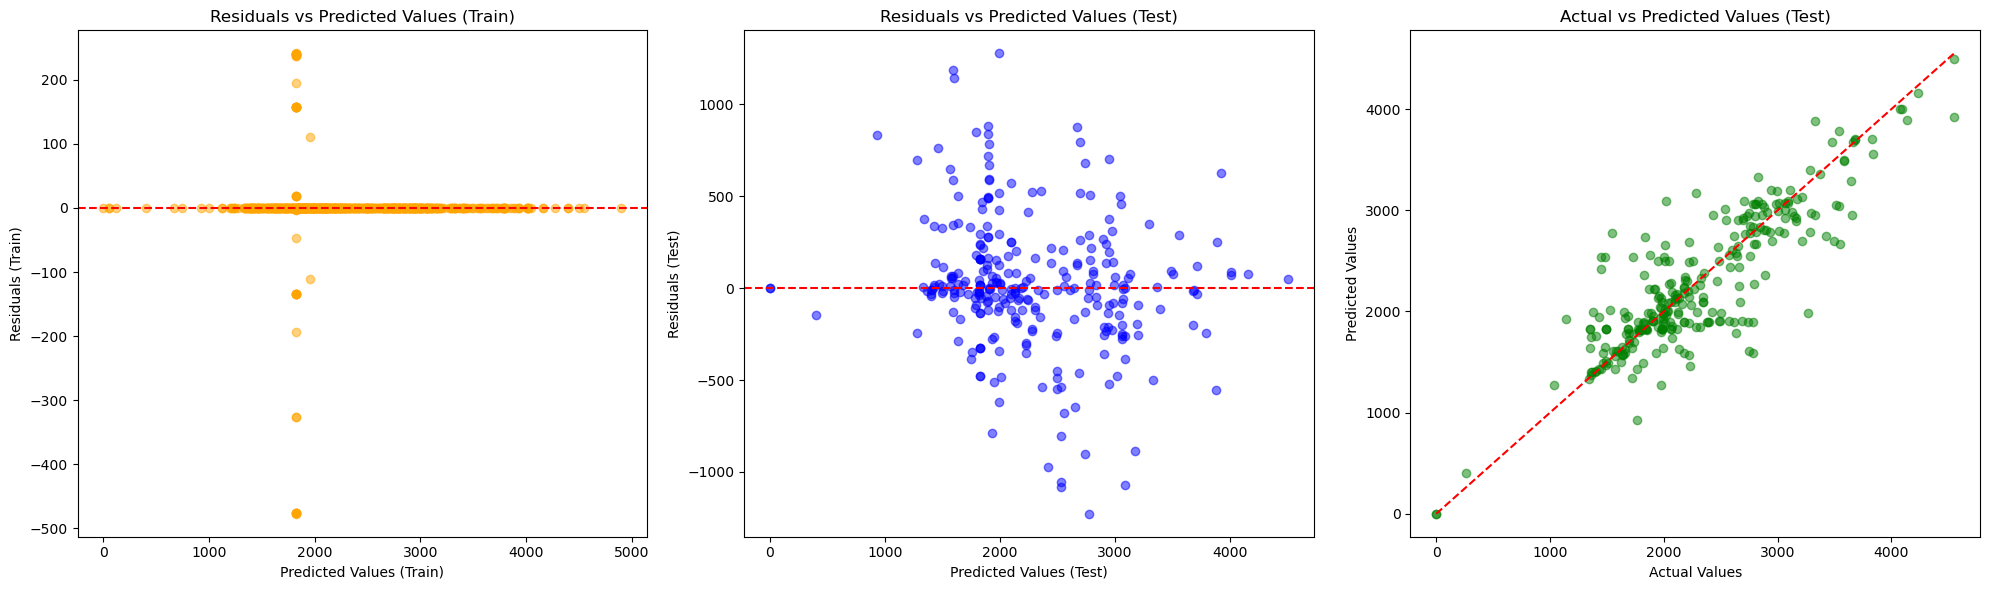

{'Model': 'Decision Tree',
 'Training Time (s)': 7.8399975299835205,
 'RMSE Train': 62.75153327964148,
 'RMSE Test': 365.8294189363158,
 'R2 Train': 0.9923046372362894,
 'R2 Test': 0.7350602852942101,
 'MAE Train': 13.566958295819894,
 'MAE Test': 249.68583866689727,
 'Mean Residual Train': 5.191179804640001e-15,
 'Mean Residual Test': 23.445799457994585,
 'MAPE Train': 0.008080547056358725,
 'MAPE Test': 0.11661535739385412}

In [172]:
dt_results = evaluate_model(DecisionTreeRegressor(random_state=42), 'Decision Tree')
results.append(dt_results)
dt_results

### XGBoost

<Figure size 1400x600 with 0 Axes>

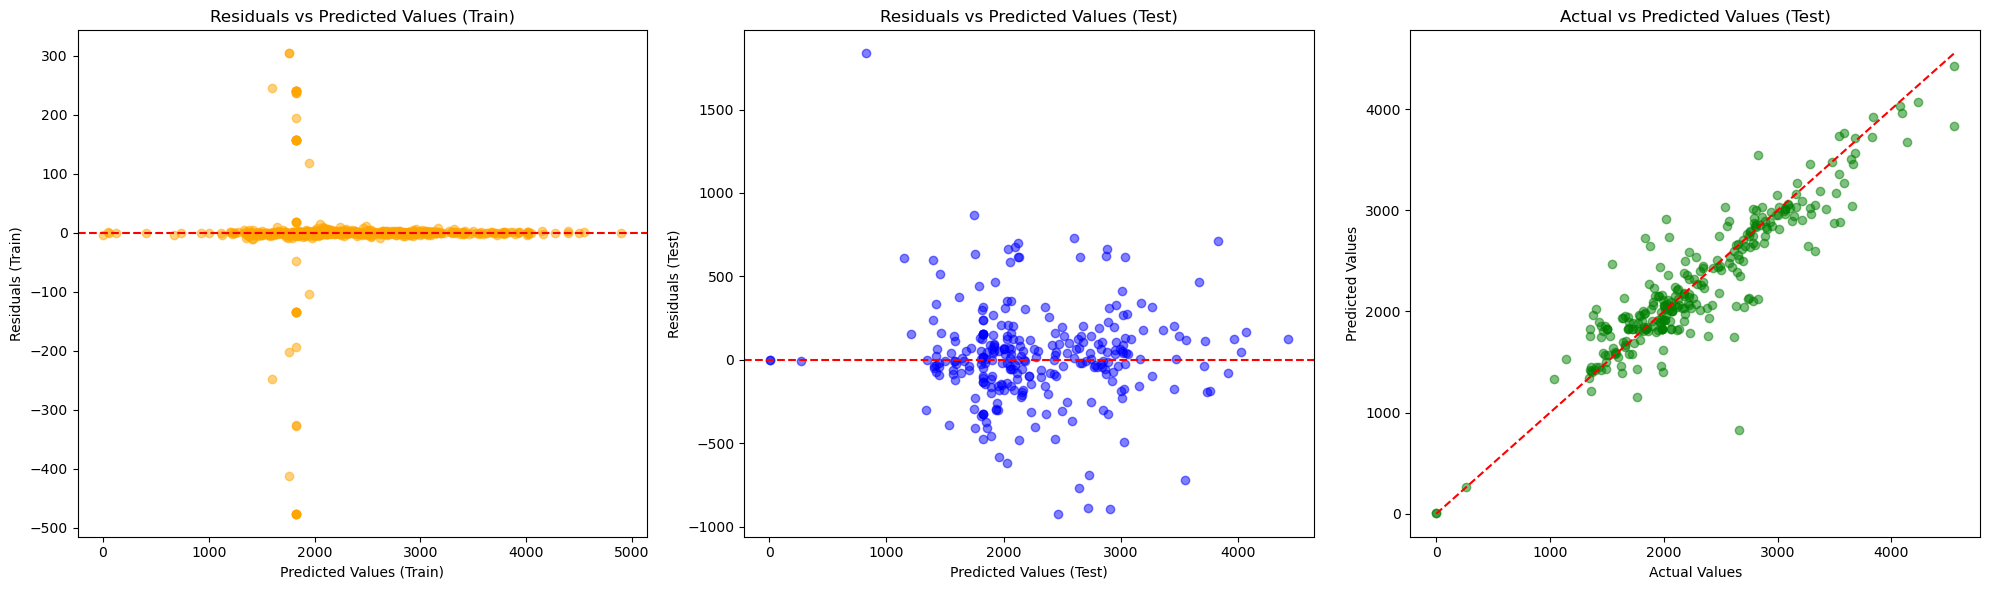

{'Model': 'XGBoost',
 'Training Time (s)': 15.61868667602539,
 'RMSE Train': 62.98803727984398,
 'RMSE Test': 292.2262911588673,
 'R2 Train': 0.9922474764349155,
 'R2 Test': 0.8309448590380583,
 'MAE Train': 14.433546638561348,
 'MAE Test': 194.37774945996333,
 'Mean Residual Train': -0.004541512493673525,
 'Mean Residual Test': 21.706874701993684,
 'MAPE Train': 16201978020937.264,
 'MAPE Test': 121404210905320.48}

In [173]:
xgb_results = evaluate_model(XGBRegressor(random_state=42), 'XGBoost')
results.append(xgb_results)
xgb_results

### Gradien Boosting

<Figure size 1400x600 with 0 Axes>

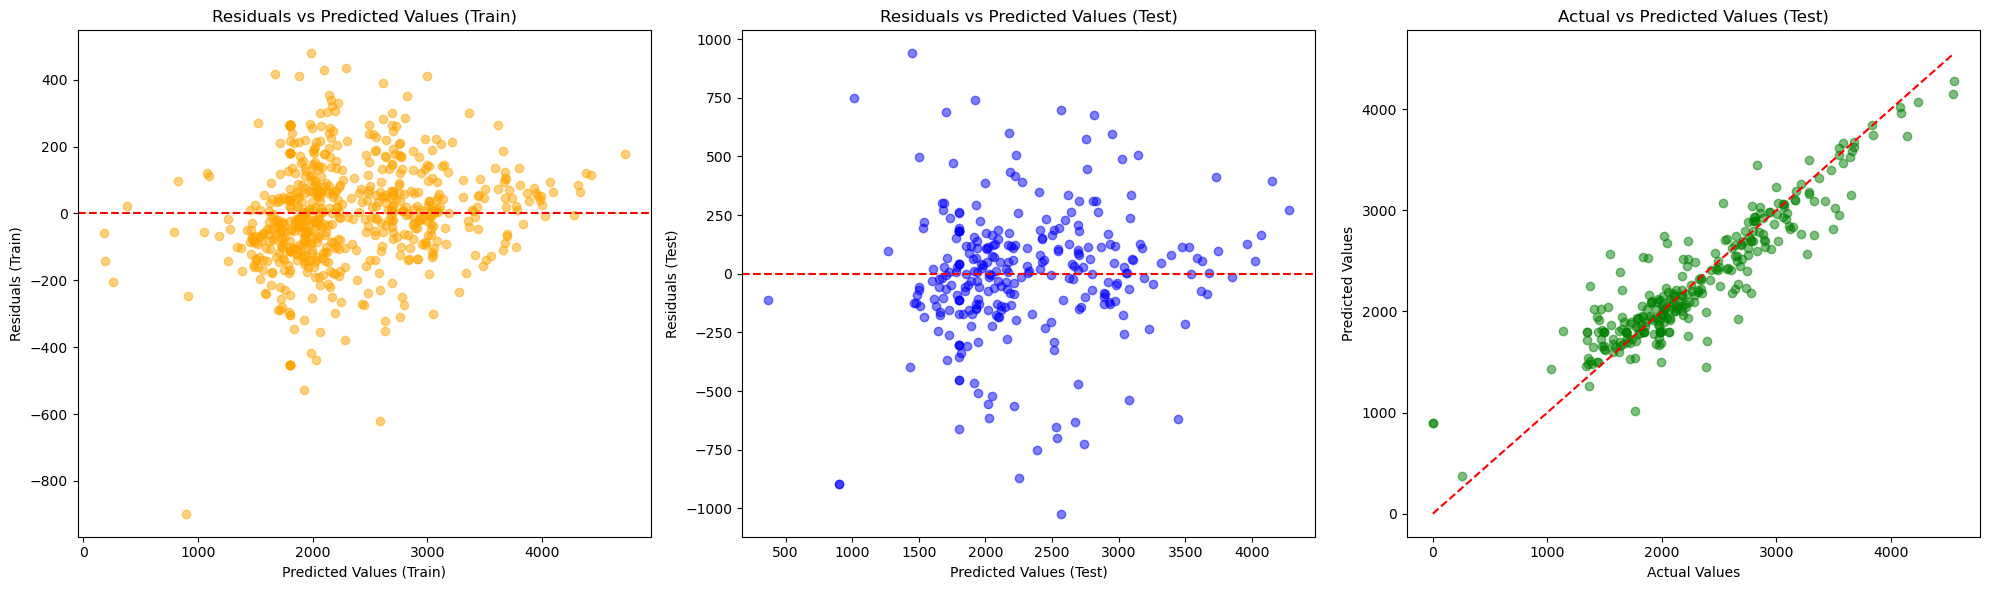

{'Model': 'Gradient Boosting',
 'Training Time (s)': 16.26403570175171,
 'RMSE Train': 135.23018774402,
 'RMSE Test': 278.9766976520039,
 'R2 Train': 0.9640407614798109,
 'R2 Test': 0.8459273089858388,
 'MAE Train': 100.67275244900888,
 'MAE Test': 195.93246894858237,
 'Mean Residual Train': -7.233043861131735e-14,
 'Mean Residual Test': -1.6461104367709096,
 'MAPE Train': 3944000146750488.5,
 'MAPE Test': 2.8678974737217124e+16}

In [174]:
gb_results = evaluate_model(GradientBoostingRegressor(random_state=42), 'Gradient Boosting')
results.append(gb_results)
gb_results

### Support Vector Regressor (SVR)

<Figure size 1400x600 with 0 Axes>

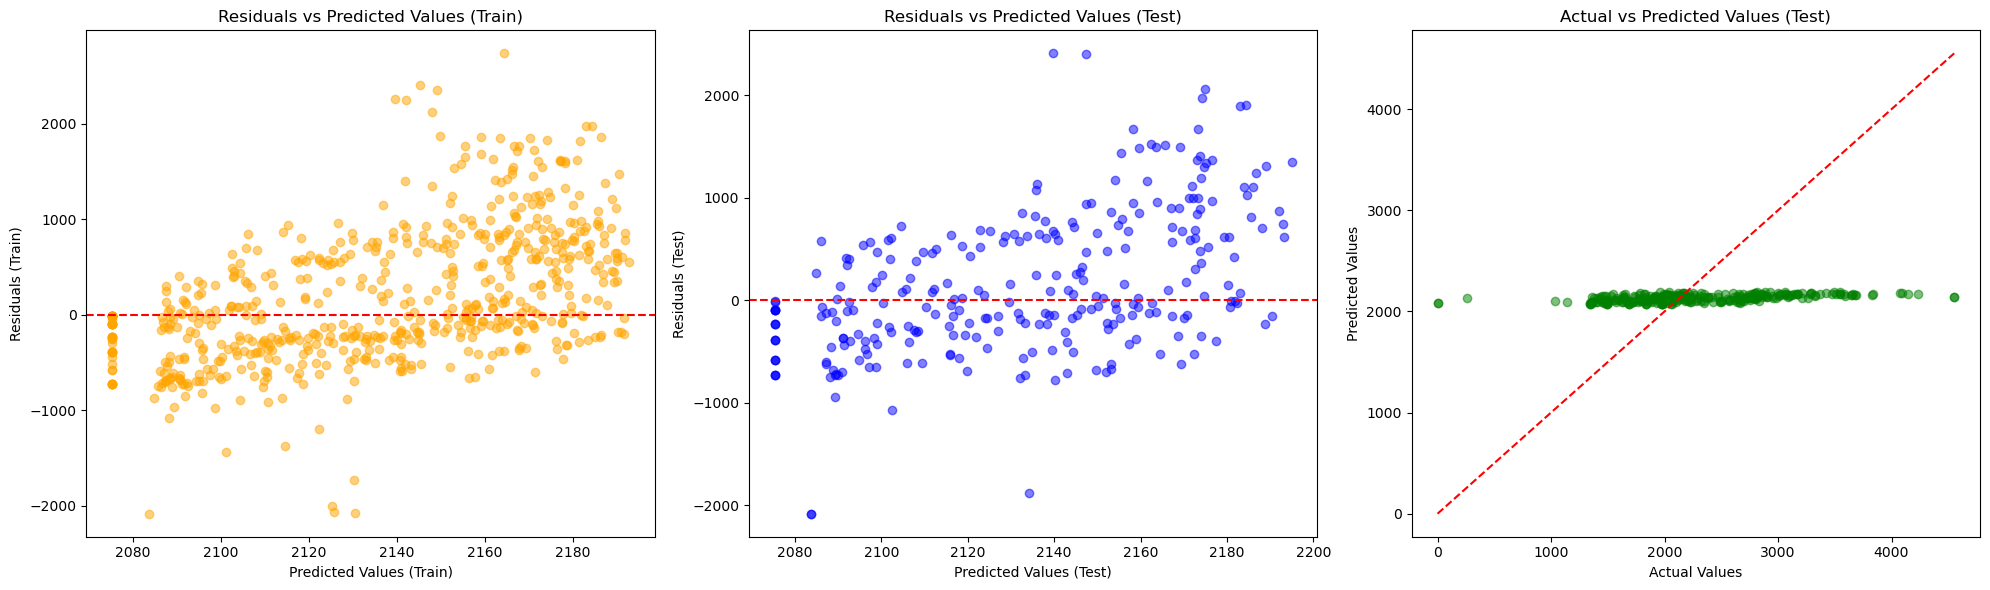

{'Model': 'Support Vector Regressor',
 'Training Time (s)': 9.556141138076782,
 'RMSE Train': 721.1753815660487,
 'RMSE Test': 712.1219921552737,
 'R2 Train': -0.017543773266132174,
 'R2 Test': -0.0039188436220463085,
 'MAE Train': 547.7566423712442,
 'MAE Test': 540.5382561990348,
 'Mean Residual Train': 173.60187920470412,
 'Mean Residual Test': 164.9201532380611,
 'MAPE Train': 1.4553758892909824e+16,
 'MAPE Test': 6.655177397582832e+16}

In [175]:
svr_results = evaluate_model(SVR(), 'Support Vector Regressor')
results.append(svr_results)
svr_results

### Bayesian Ridge

<Figure size 1400x600 with 0 Axes>

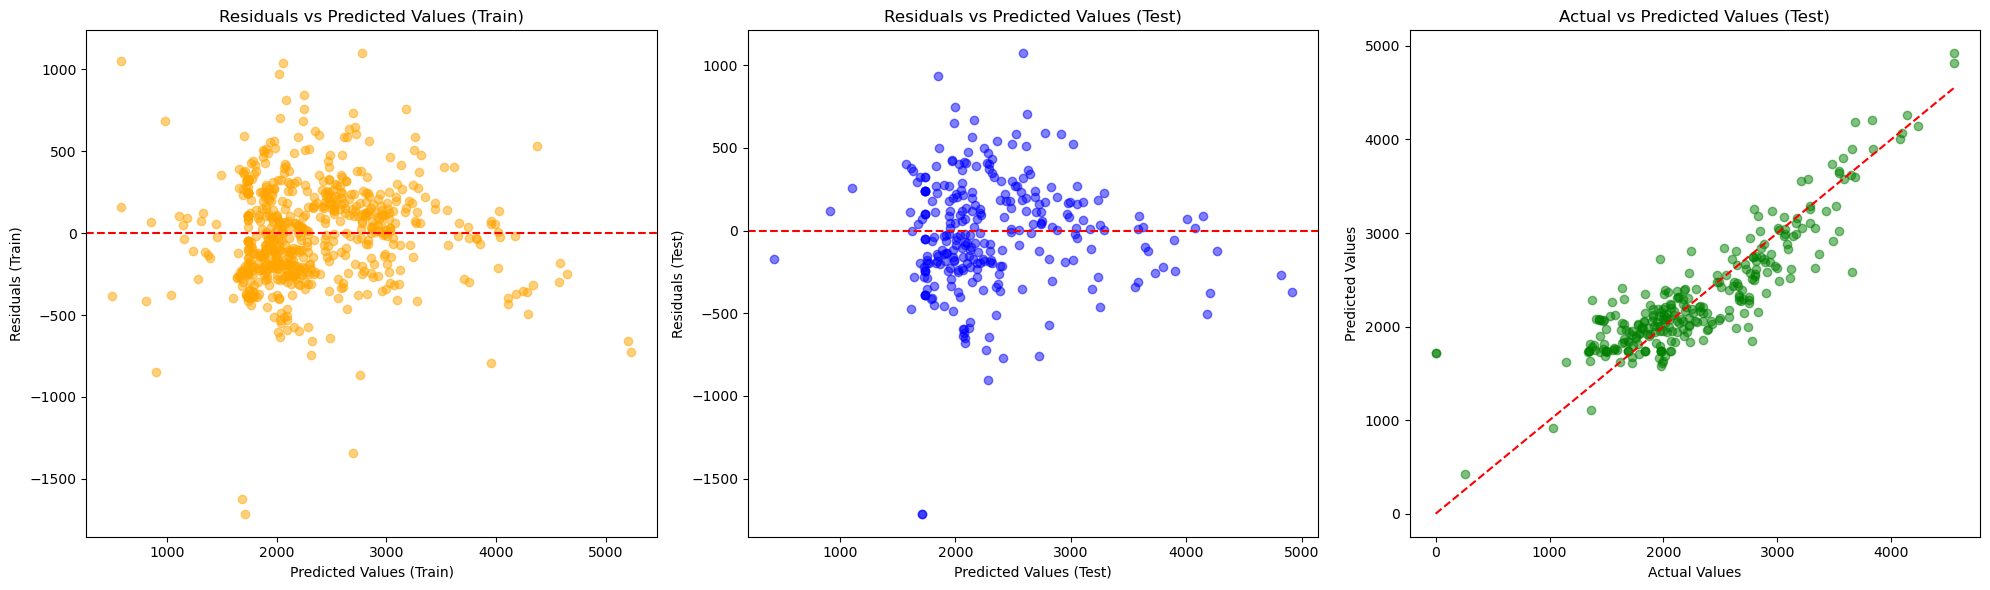

{'Model': 'Bayesian Ridge',
 'Training Time (s)': 6.461061954498291,
 'RMSE Train': 299.88176668773923,
 'RMSE Test': 341.5219034417543,
 'R2 Train': 0.8238548828097154,
 'R2 Test': 0.7690984041833012,
 'MAE Train': 232.20059580929637,
 'MAE Test': 257.4062415248874,
 'Mean Residual Train': 1.4535303452992003e-13,
 'Mean Residual Test': -19.6451794458703,
 'MAPE Train': 1.159716979002617e+16,
 'MAPE Test': 5.471372108763441e+16}

In [176]:
br_results = evaluate_model(BayesianRidge(), 'Bayesian Ridge')
results.append(br_results)
br_results

### CatBoost Regressor

<Figure size 1400x600 with 0 Axes>

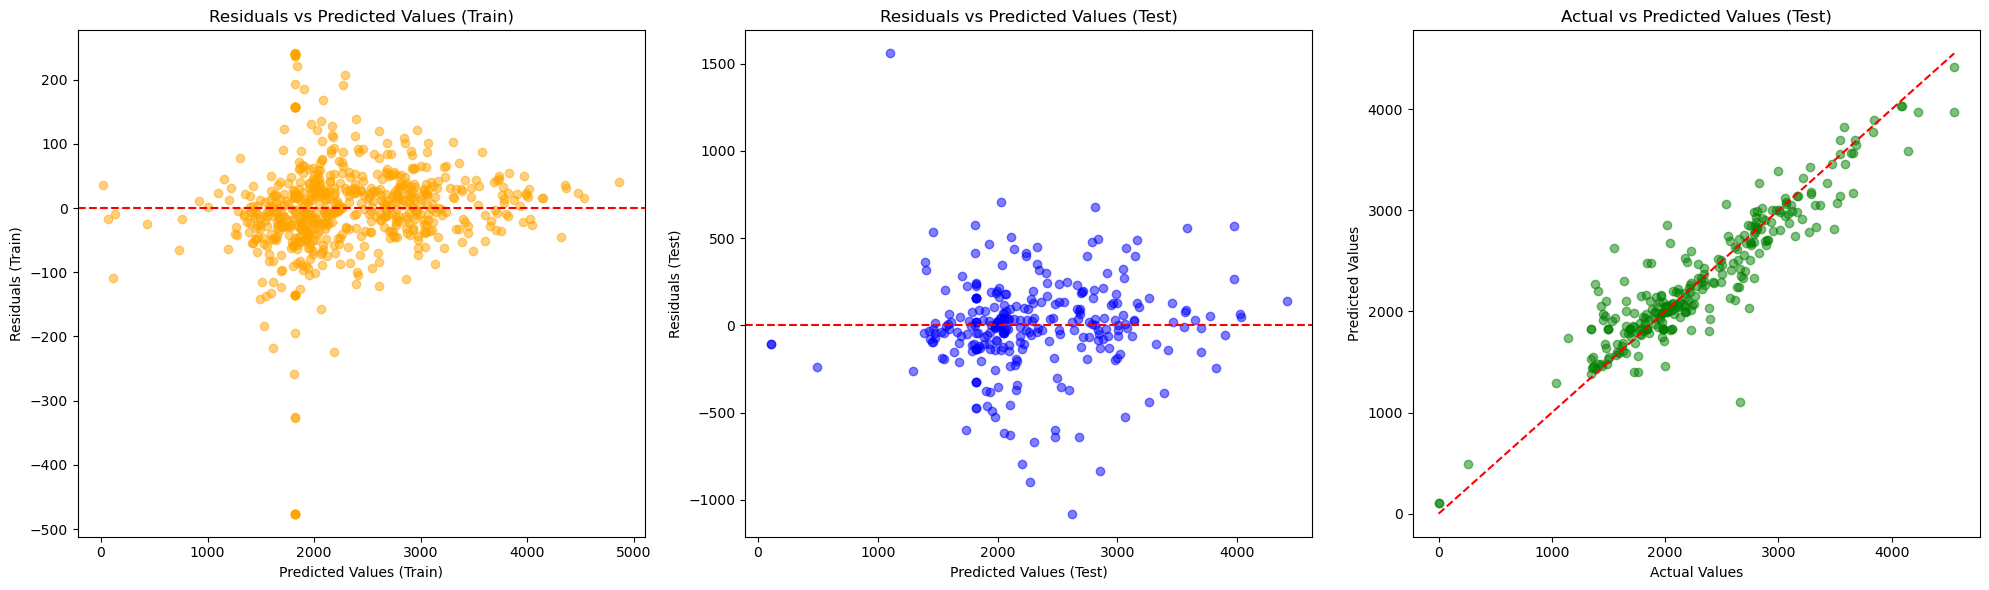

{'Model': 'CatBoost Regressor',
 'Training Time (s)': 141.43408179283142,
 'RMSE Train': 77.12486455819253,
 'RMSE Test': 271.2158961399545,
 'R2 Train': 0.9883260407147602,
 'R2 Test': 0.854380313989054,
 'MAE Train': 44.69921615537269,
 'MAE Test': 181.20438972816822,
 'Mean Residual Train': -0.04070307313250765,
 'Mean Residual Test': -3.066259056504867,
 'MAPE Train': 629021923943723.2,
 'MAPE Test': 3469467916642710.5}

In [177]:
cb_results = evaluate_model(CatBoostRegressor(random_state=42, silent=True), 'CatBoost Regressor')
results.append(cb_results)
cb_results

### LightGBM Regressor

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001369 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 3254
[LightGBM] [Info] Number of data points in the train set: 438, number of used features: 29
[LightGBM] [Info] Start training from score 2331.639269
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain

<Figure size 1400x600 with 0 Axes>

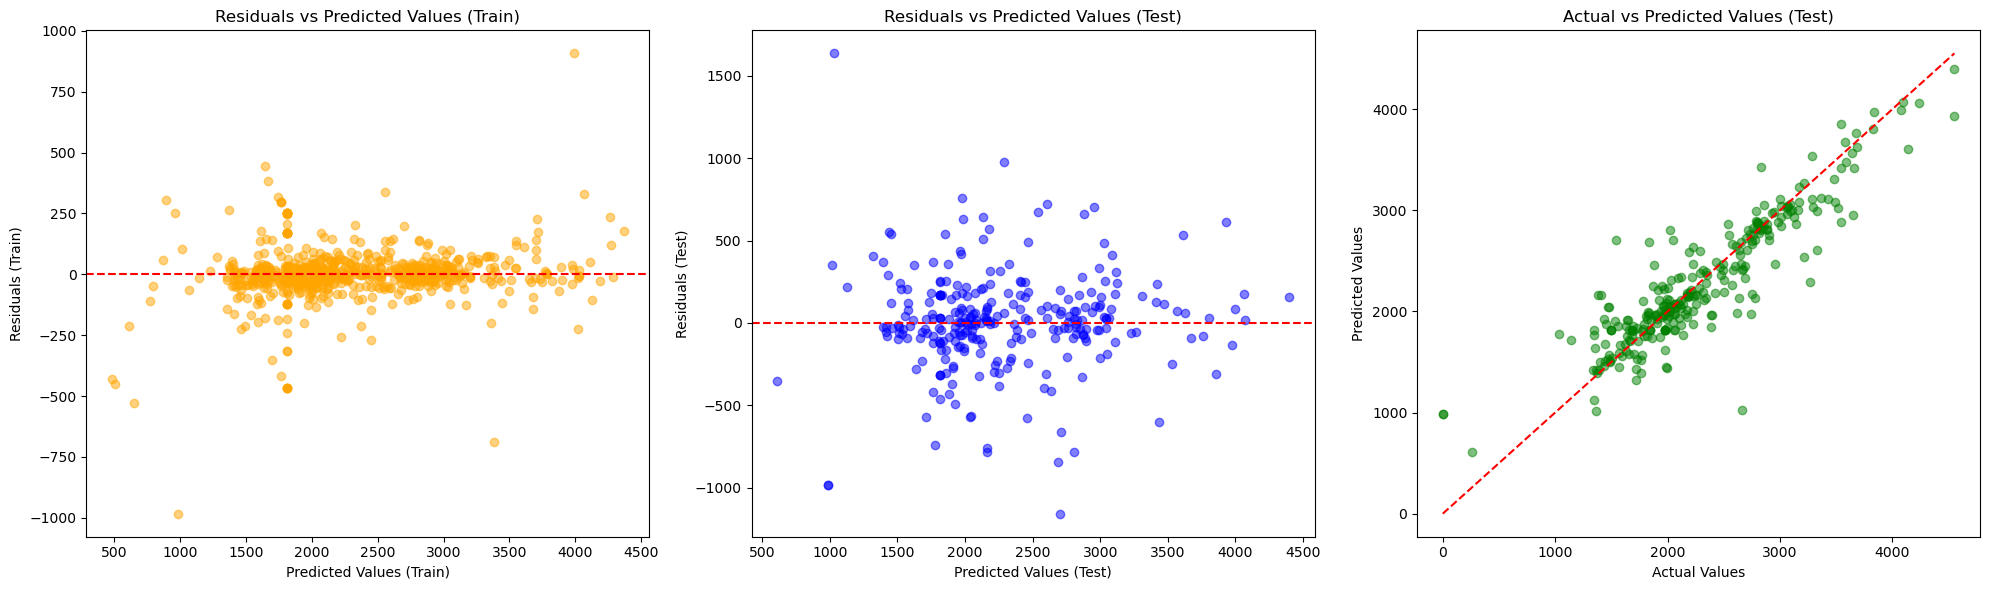

{'Model': 'LightGBM Regressor',
 'Training Time (s)': 8.688231945037842,
 'RMSE Train': 123.62812945427919,
 'RMSE Test': 303.88012392255763,
 'R2 Train': 0.9701240308006384,
 'R2 Test': 0.8171923358165895,
 'MAE Train': 74.1480272136235,
 'MAE Test': 203.06239345556767,
 'Mean Residual Train': -8.480807501825633e-08,
 'Mean Residual Test': 12.513787001070535,
 'MAPE Train': 7074295102144879.0,
 'MAPE Test': 3.1408282842449936e+16}

In [178]:
lgbm_results = evaluate_model(LGBMRegressor(random_state=42), 'LightGBM Regressor')
results.append(lgbm_results)
lgbm_results

### Extra Trees Regressor

<Figure size 1400x600 with 0 Axes>

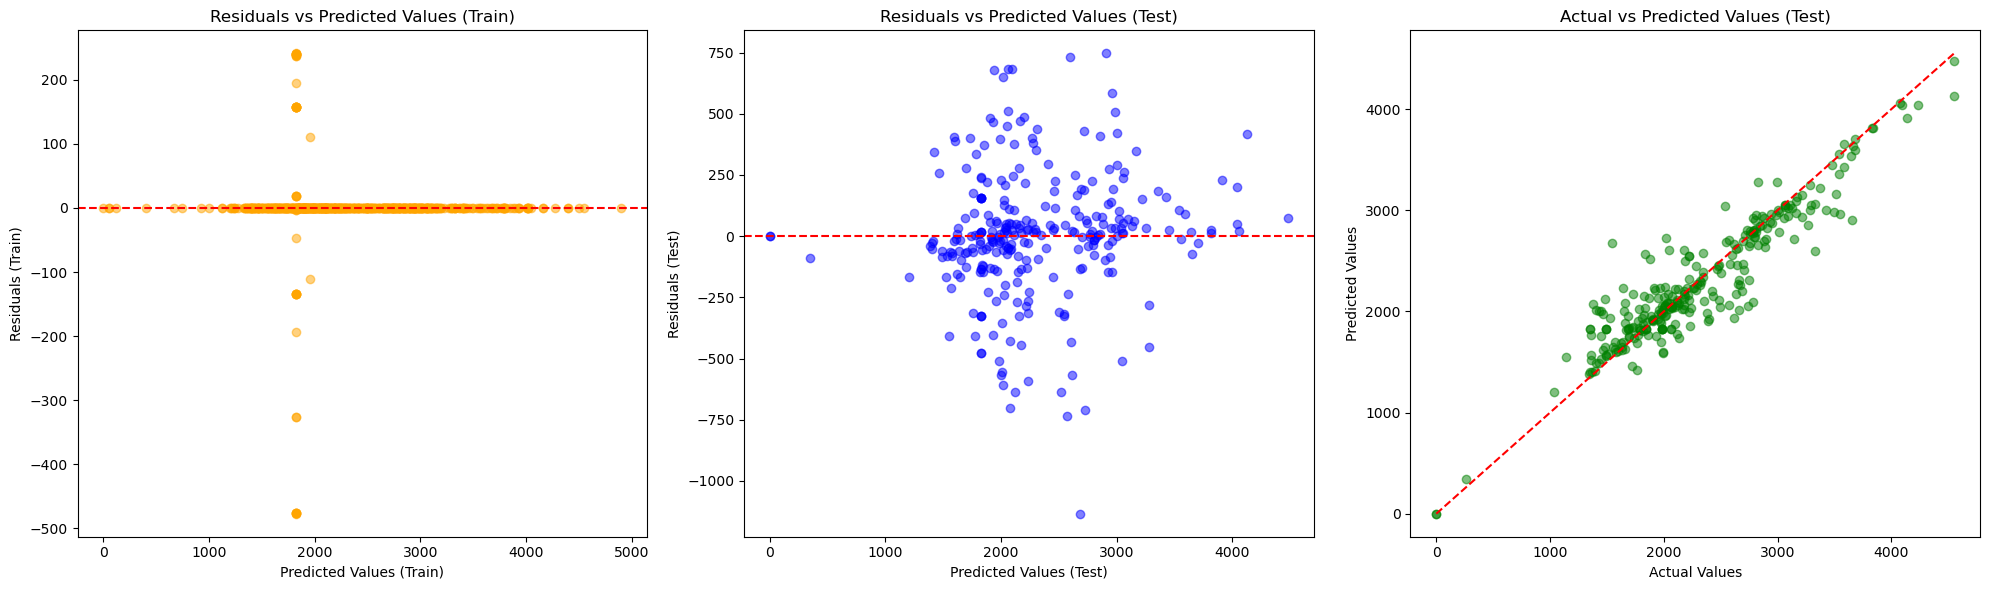

{'Model': 'Extra Trees Regressor',
 'Training Time (s)': 18.14286208152771,
 'RMSE Train': 62.75153327964148,
 'RMSE Test': 261.89570071937436,
 'R2 Train': 0.9923046372362894,
 'R2 Test': 0.8642166409932158,
 'MAE Train': 13.566958295819875,
 'MAE Test': 179.3213273366776,
 'Mean Residual Train': -1.5227460760277336e-14,
 'Mean Residual Test': 5.398167560399003,
 'MAPE Train': 0.008080547056358724,
 'MAPE Test': 0.08700800431226087}

In [179]:
et_results = evaluate_model(ExtraTreesRegressor(random_state=42), 'Extra Trees Regressor')
results.append(et_results)
et_results

## Hasil: Baseline

In [180]:
results_df = pd.DataFrame(results)

results_df['RMSE Difference'] = results_df['RMSE Test'] - results_df['RMSE Train']
results_df['R2 Difference'] = results_df['R2 Test'] - results_df['R2 Train']
results_df['MAE Difference'] = results_df['MAE Test'] - results_df['MAE Train']
results_df['MAPE Difference'] = results_df['MAPE Test'] - results_df['MAPE Train']

# Menentukan urutan kolom yang diinginkan
columns_order = [
    'Model', 'Training Time (s)', 
    'RMSE Train', 'RMSE Test', 'RMSE Difference',
    'R2 Train', 'R2 Test', 'R2 Difference',
    'MAE Train', 'MAE Test', 'MAE Difference',
    'Mean Residual Train', 'Mean Residual Test',
    'MAPE Train', 'MAPE Test', 'MAPE Difference'
]

# Mengatur urutan kolom dan mengurutkan hasil berdasarkan beberapa metrik
results_df = results_df[columns_order].sort_values(
    by=['MAE Difference'],
    ascending=[True]
)

pd.options.display.float_format = '{:.4f}'.format
# Tampilkan DataFrame hasil
results_df

Model  Training Time (s)  RMSE Train  RMSE Test  \
8   Support Vector Regressor             9.5561    721.1754   712.1220   
2                      Ridge             6.9155    303.4618   339.9479   
4                Elastic Net             7.3281    438.9490   467.0739   
3                      Lasso             7.2980    300.9983   343.6819   
9             Bayesian Ridge             6.4611    299.8818   341.5219   
1          Linear Regression             7.0161    298.2328   345.0450   
7          Gradient Boosting            16.2640    135.2302   278.9767   
0              Random Forest            31.5802    121.0677   282.4683   
11        LightGBM Regressor             8.6882    123.6281   303.8801   
10        CatBoost Regressor           141.4341     77.1249   271.2159   
12     Extra Trees Regressor            18.1429     62.7515   261.8957   
6                    XGBoost            15.6187     62.9880   292.2263   
5              Decision Tree             7.8400     62.7515   365.8294   

    RMSE Difference  R2 Train  R2 Test  R2 Difference  MAE Train  MAE Test  \
8           -9.0534   -0.0175  -0.0039         0.0136   547.7566  540.5383   
2           36.4861    0.8197   0.7712        -0.0485   234.1709  254.6369   
4           28.1249    0.6222   0.5681        -0.0541   355.5359  379.8431   
3           42.6837    0.8226   0.7662        -0.0564   233.9272  258.8912   
9           41.6401    0.8239   0.7691        -0.0548   232.2006  257.4062   
1           46.8121    0.8258   0.7643        -0.0615   230.9529  260.4319   
7          143.7465    0.9640   0.8459        -0.1181   100.6728  195.9325   
0          161.4006    0.9713   0.8420        -0.1292    79.5880  192.0220   
11         180.2520    0.9701   0.8172        -0.1529    74.1480  203.0624   
10         194.0910    0.9883   0.8544        -0.1339    44.6992  181.2044   
12         199.1442    0.9923   0.8642        -0.1281    13.5670  179.3213   
6          229.2383    0.9922   0.8309        -0.1613    14.4335  194.3777   
5          303.0779    0.9923   0.7351        -0.2572    13.5670  249.6858   

    MAE Difference  Mean Residual Train  Mean Residual Test  \
8          -7.2184             173.6019            164.9202   
2          20.4660               0.0000            -15.6484   
4          24.3072               0.0000             21.2188   
3          24.9640               0.0000            -19.4115   
9          25.2056               0.0000            -19.6452   
1          29.4790               0.0042            -22.4947   
7          95.2597              -0.0000             -1.6461   
0         112.4340              -2.9705              2.3147   
11        128.9144              -0.0000             12.5138   
10        136.5052              -0.0407             -3.0663   
12        165.7544              -0.0000              5.3982   
6         179.9442              -0.0045             21.7069   
5         236.1189               0.0000             23.4458   

               MAPE Train              MAPE Test        MAPE Difference  
8  14553758892909824.0000 66551773975828320.0000 51998015082918496.0000  
2  11885117487826614.0000 56051105130661144.0000 44165987642834528.0000  
4  13471673757076030.0000 63343823447795680.0000 49872149690719648.0000  
3  11922532611034854.0000 56498340488931808.0000 44575807877896952.0000  
9  11597169790026170.0000 54713721087634408.0000 43116551297608240.0000  
1  11293764496421530.0000 53718589044547904.0000 42424824548126376.0000  
7   3944000146750488.5000 28678974737217124.0000 24734974590466636.0000  
0   4149169525665798.5000 22985925332178564.0000 18836755806512764.0000  
11  7074295102144879.0000 31408282842449936.0000 24333987740305056.0000  
10   629021923943723.2500  3469467916642710.5000  2840445992698987.0000  
12                 0.0081                 0.0870                 0.0789  
6     16201978020937.2637   121404210905320.4844   105202232884383.2188  
5                  0.0081                 0.1166

Data tersebut diurutkan berdasarkan MAE Test terkecil, dengan syarat perbedaan score dengan MAE Train tidak terlalu besar. Sehingga dapat disimpulkan 4 model terbaik pada dataset tanpa treatment adalah model: Ridge, Lasso, Bayesian Ridge, Linear Regression.

In [181]:
df_best = results_df[results_df["Model"].isin(["Ridge", "Lasso", "Bayesian Ridge", "Linear Regression"])]
df_best[['Model','MAE Test']]

Model  MAE Test
2              Ridge  254.6369
3              Lasso  258.8912
9     Bayesian Ridge  257.4062
1  Linear Regression  260.4319

## Feature Importance

### Ridge

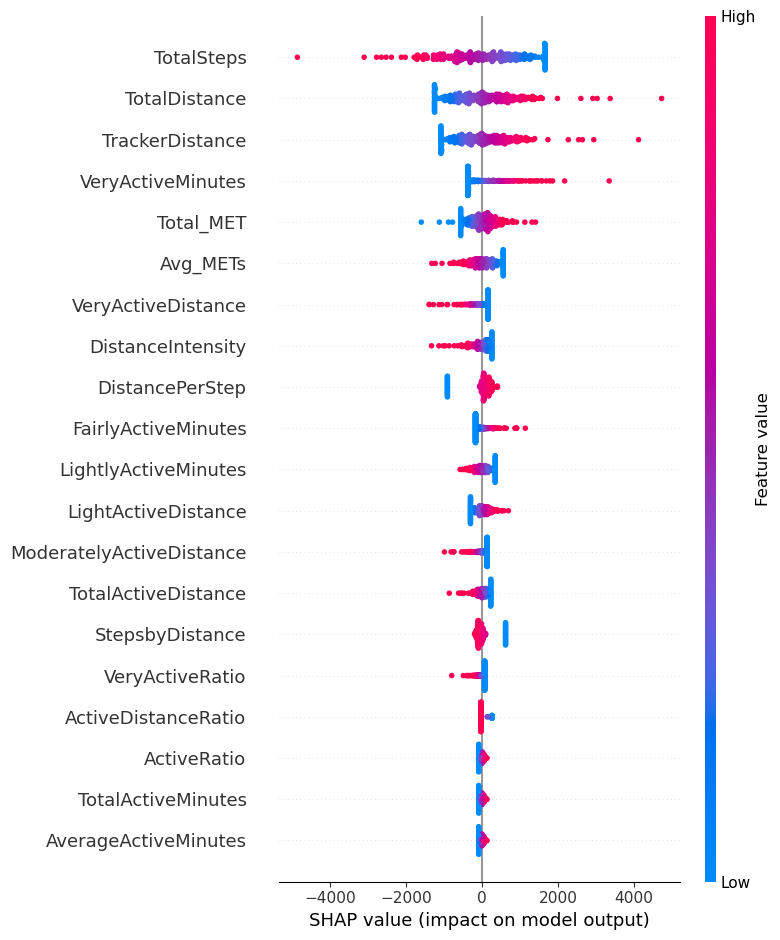

In [182]:
model = Ridge(random_state=42)
model.fit(X_train, y_train)

# Use LinearExplainer for Ridge model
explainer = shap.LinearExplainer(model, X_train)
shap_values = explainer(X_test)

# Plot feature importance
shap.summary_plot(shap_values, X_test)

### Lasso

c:\Users\Lenovo\anacond3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:678: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.018e+06, tolerance: 3.365e+04
  model = cd_fast.enet_coordinate_descent(


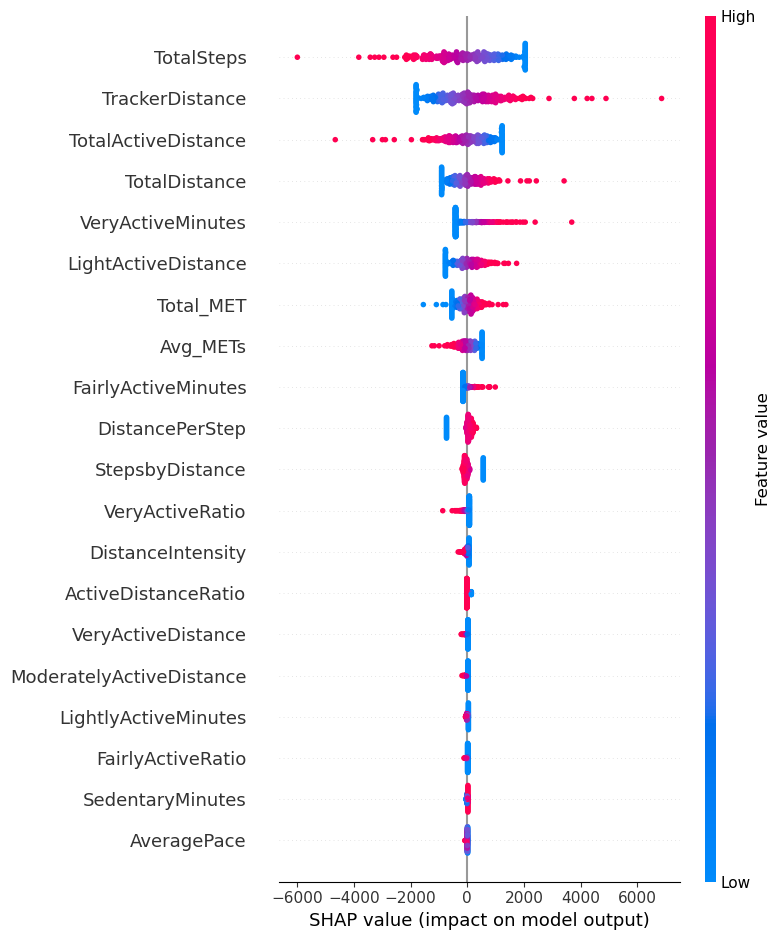

In [183]:
model = Lasso(random_state=42)
model.fit(X_train, y_train)

# Use LinearExplainer for Ridge model
explainer = shap.LinearExplainer(model, X_train)
shap_values = explainer(X_test)

# Plot feature importance
shap.summary_plot(shap_values, X_test)

### Bayesian Ridge

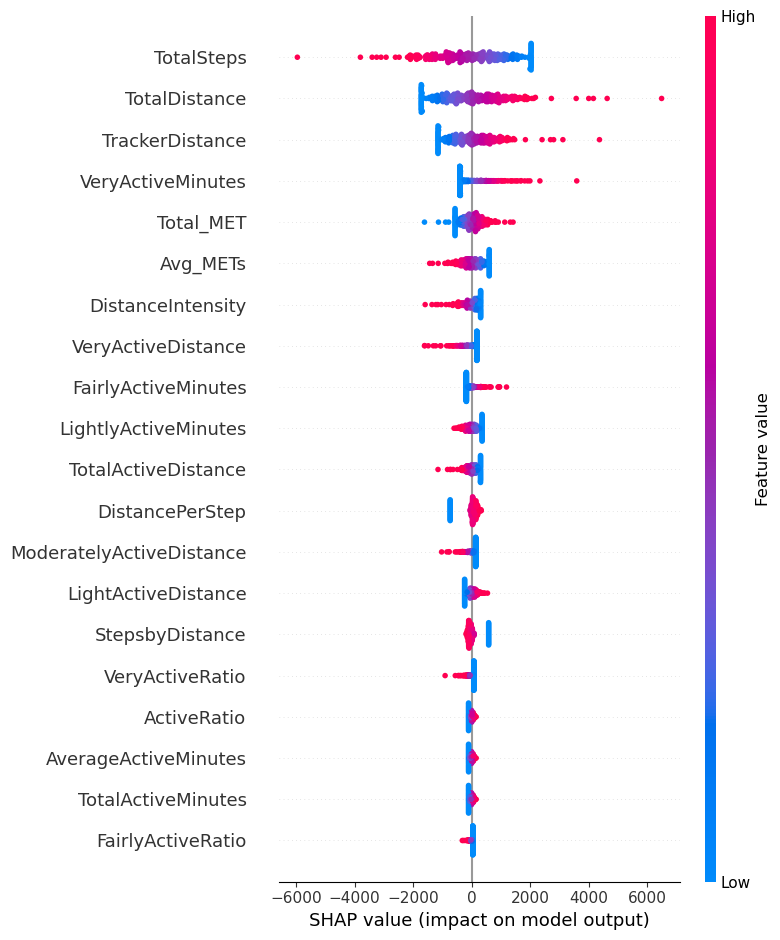

In [184]:
model = BayesianRidge()
model.fit(X_train, y_train)

# Use LinearExplainer for Ridge model
explainer = shap.LinearExplainer(model, X_train)
shap_values = explainer(X_test)

# Plot feature importance
shap.summary_plot(shap_values, X_test)

### Linear Regression

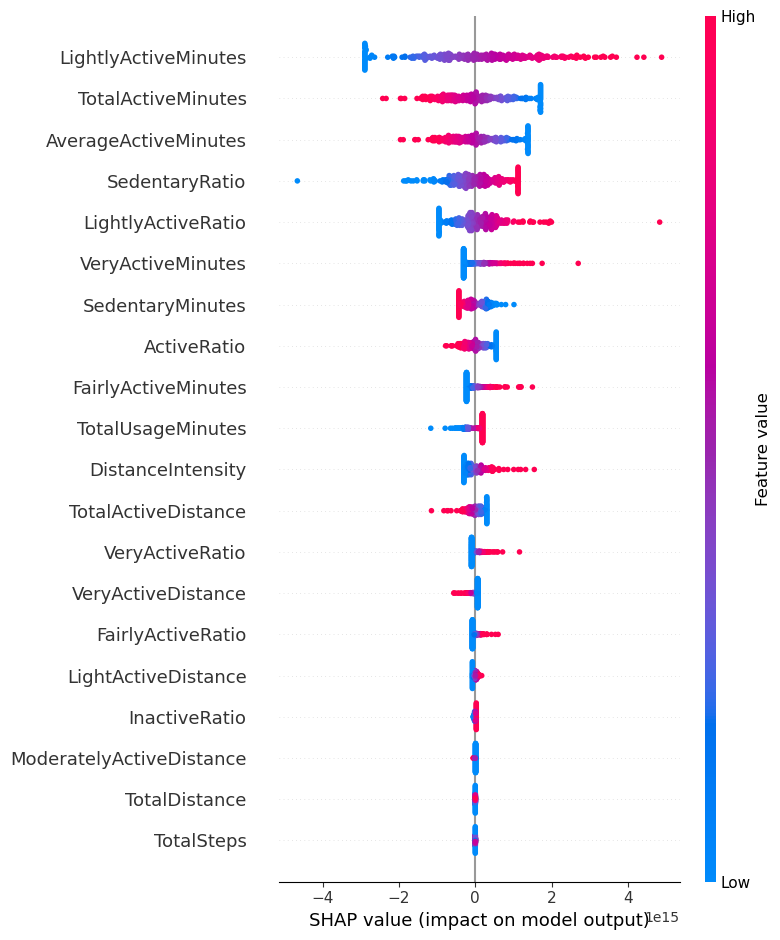

In [185]:
model = LinearRegression()
model.fit(X_train, y_train)

# Use LinearExplainer for Ridge model
explainer = shap.LinearExplainer(model, X_train)
shap_values = explainer(X_test)

# Plot feature importance
shap.summary_plot(shap_values, X_test)

## Model: Tuning

In [186]:
from sklearn.model_selection import GridSearchCV

In [187]:
import numpy as np
import matplotlib.pyplot as plt
import time
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error, mean_absolute_percentage_error
from sklearn.model_selection import KFold

def evaluate_model(model, model_name):
    start_time = time.time()
    
    # Inisialisasi K-Fold
    kf = KFold(n_splits=3, shuffle=True, random_state=42)
    
    rmse_train_list = []
    r2_train_list = []
    mae_train_list = []
    mape_train_list = []
    
    # K-Fold Cross Validation
    for train_index, val_index in kf.split(X_train):
        X_train_fold, X_val_fold = X_train.iloc[train_index], X_train.iloc[val_index]
        y_train_fold, y_val_fold = y_train.iloc[train_index], y_train.iloc[val_index]
        
        # Latih model pada lipatan
        model.fit(X_train_fold, y_train_fold)
        y_train_pred = model.predict(X_train_fold)
        y_val_pred = model.predict(X_val_fold)
        
        # Hitung metrik untuk lipatan
        rmse_train_list.append(np.sqrt(mean_squared_error(y_train_fold, y_train_pred)))
        r2_train_list.append(r2_score(y_train_fold, y_train_pred))
        mae_train_list.append(mean_absolute_error(y_train_fold, y_train_pred))
        mape_train_list.append(mean_absolute_percentage_error(y_train_fold, y_train_pred))

    # Rata-rata metrik untuk data latih
    rmse_train = np.mean(rmse_train_list)
    r2_train = np.mean(r2_train_list)
    mae_train = np.mean(mae_train_list)
    mape_train = np.mean(mape_train_list)

    # Latih model dengan semua data latih untuk evaluasi
    model.fit(X_train, y_train)
    
    # Hitung prediksi untuk data uji
    y_test_pred = model.predict(X_test)
    
    # Hitung metrik untuk data uji
    rmse_test = np.sqrt(mean_squared_error(y_test, y_test_pred))
    r2_test = r2_score(y_test, y_test_pred)
    mae_test = mean_absolute_error(y_test, y_test_pred)
    mape_test = mean_absolute_percentage_error(y_test, y_test_pred)

    # Hitung residual untuk data latih dan data uji
    y_train_pred = model.predict(X_train)  # Prediksi pada seluruh data latih
    residuals_train = y_train - y_train_pred
    residuals_test = y_test - y_test_pred
    mean_residual_train = np.mean(residuals_train)
    mean_residual_test = np.mean(residuals_test)

    # Plot residual
    plt.figure(figsize=(14, 6))

    # Plot residual dan nilai aktual vs prediksi
    plt.figure(figsize=(20, 6))

    # Residuals vs Predicted Values (data latih)
    plt.subplot(1, 3, 1)
    plt.scatter(y_train_pred, residuals_train, color='orange', alpha=0.5)
    plt.axhline(y=0, color='red', linestyle='--')
    plt.title('Residuals vs Predicted Values (Train)')
    plt.xlabel('Predicted Values (Train)')
    plt.ylabel('Residuals (Train)')
    
    # Residuals vs Predicted Values (data uji)
    plt.subplot(1, 3, 2)
    plt.scatter(y_test_pred, residuals_test, color='blue', alpha=0.5)
    plt.axhline(y=0, color='red', linestyle='--')
    plt.title('Residuals vs Predicted Values (Test)')
    plt.xlabel('Predicted Values (Test)')
    plt.ylabel('Residuals (Test)')
    
    # Actual vs Predicted Values (data uji)
    plt.subplot(1, 3, 3)
    plt.scatter(y_test, y_test_pred, color='green', alpha=0.5)
    plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')  # Garis diagonal
    plt.title('Actual vs Predicted Values (Test)')
    plt.xlabel('Actual Values')
    plt.ylabel('Predicted Values')

    plt.tight_layout()
    plt.show()

    end_time = time.time()
    training_time = end_time - start_time

    return {
        'Model': model_name,
        'Training Time (s)': training_time,
        'RMSE Train': rmse_train,
        'RMSE Test': rmse_test,
        'R2 Train': r2_train,
        'R2 Test': r2_test,
        'MAE Train': mae_train,
        'MAE Test': mae_test,
        'Mean Residual Train': mean_residual_train,
        'Mean Residual Test': mean_residual_test,
        'MAPE Train': mape_train,
        'MAPE Test': mape_test
    }

results_tuning = []


### Ridge

<Figure size 1400x600 with 0 Axes>

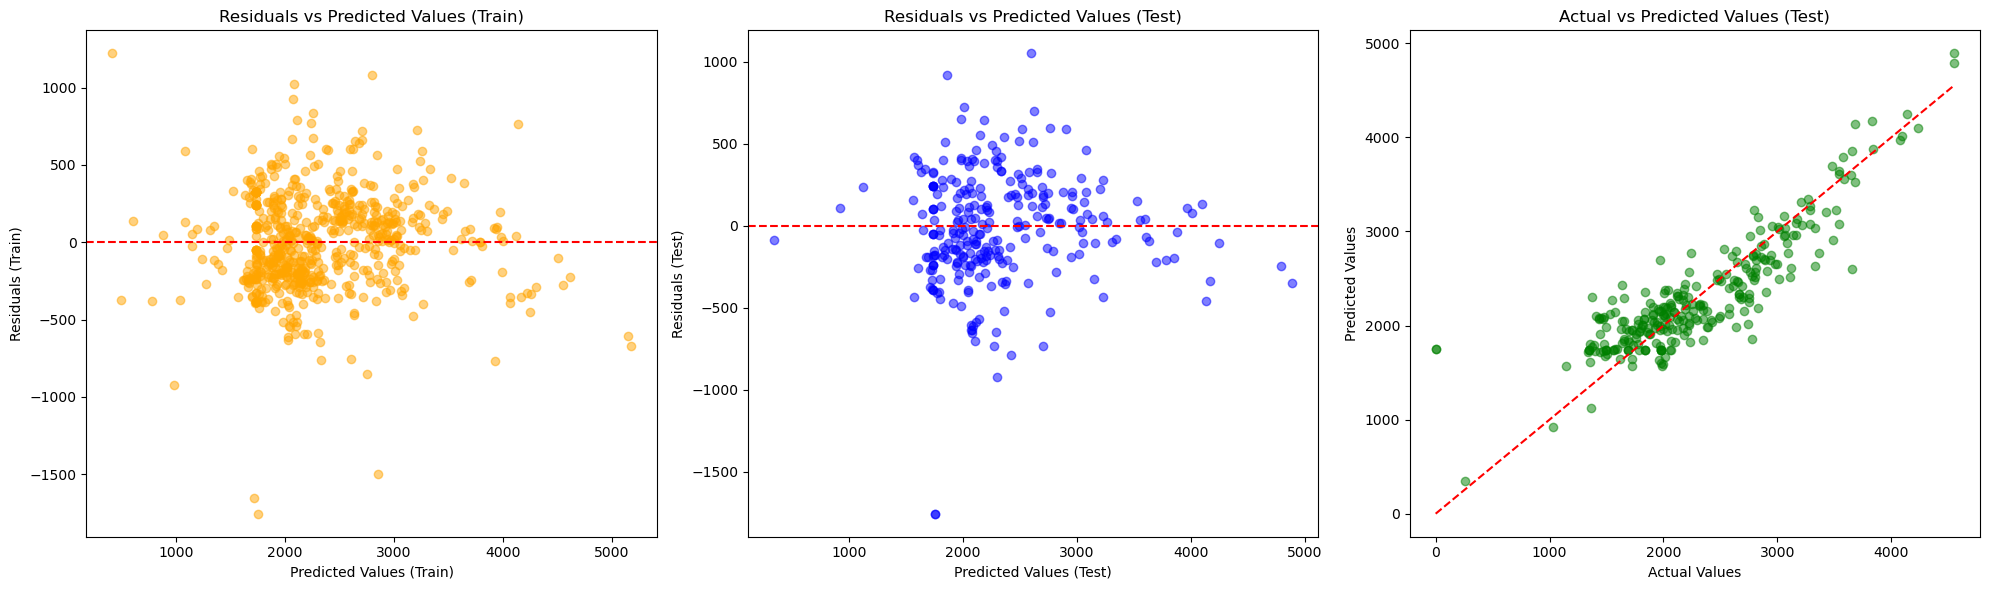

{'Model': 'Ridge',
 'Training Time (s)': 7.678773880004883,
 'RMSE Train': 303.46183787865704,
 'RMSE Test': 339.94788798226784,
 'R2 Train': 0.8197203979745038,
 'R2 Test': 0.7712218706755641,
 'MAE Train': 234.17093403098363,
 'MAE Test': 254.63694471833796,
 'Mean Residual Train': 1.3704714684249603e-13,
 'Mean Residual Test': -15.648389681705178,
 'MAPE Train': 1.1885117487826614e+16,
 'MAPE Test': 5.6051105130661144e+16}

In [188]:
ridge_results = evaluate_model(Ridge(random_state=42), 'Ridge')
results_tuning.append(ridge_results)
ridge_results

### Lasso

c:\Users\Lenovo\anacond3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:678: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.362e+07, tolerance: 2.357e+04
  model = cd_fast.enet_coordinate_descent(
c:\Users\Lenovo\anacond3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:678: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.082e+07, tolerance: 2.154e+04
  model = cd_fast.enet_coordinate_descent(
c:\Users\Lenovo\anacond3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:678: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.549e+07, toleranc

<Figure size 1400x600 with 0 Axes>

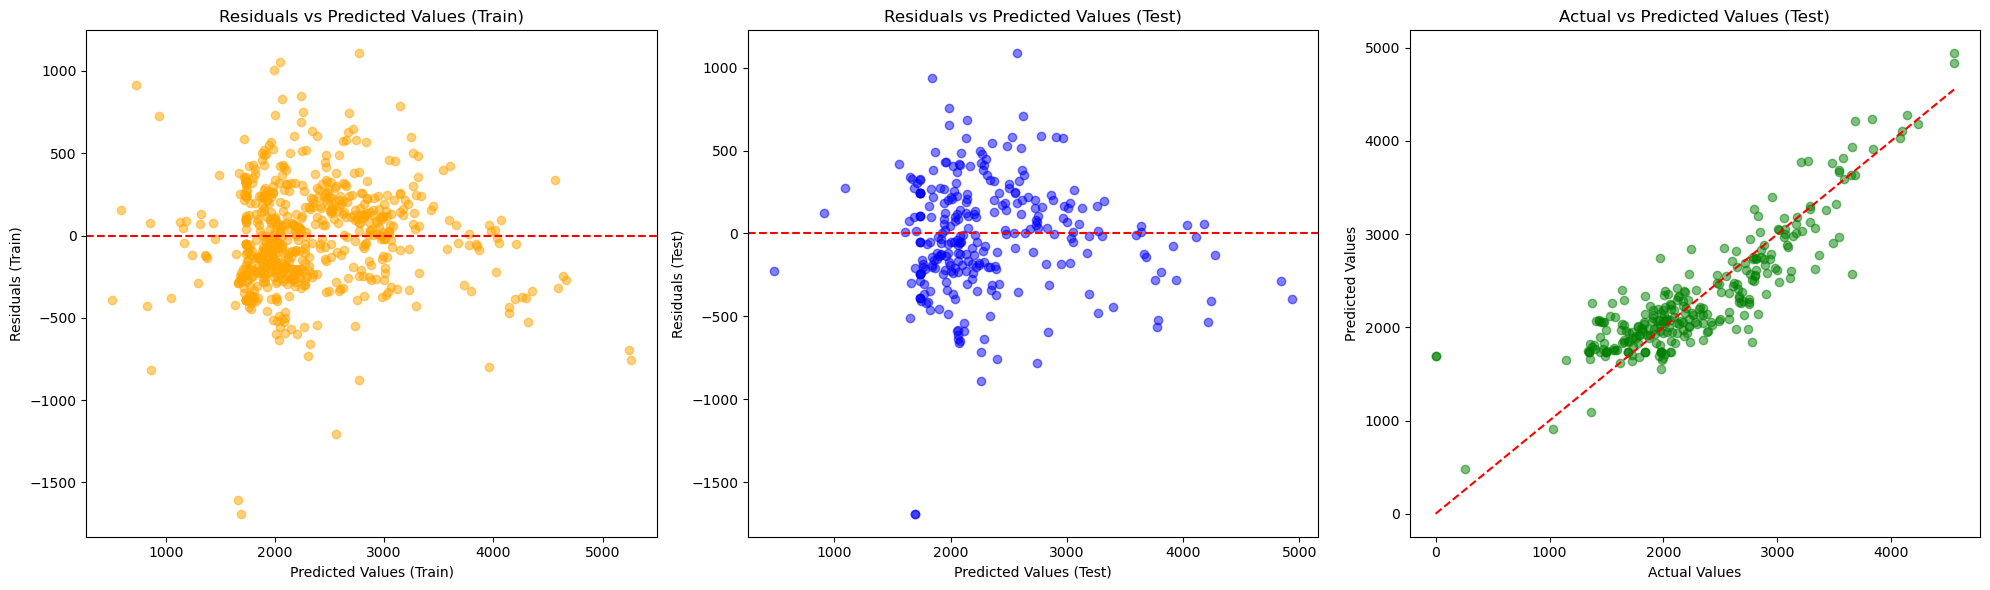

In [189]:
lasso_params = {
    'alpha': [0.1, 1.0, 10.0, None],  
    'fit_intercept': [True, False],   
    'max_iter': [1000, 5000]          
}
lasso_model = GridSearchCV(Lasso(), lasso_params, scoring='neg_mean_absolute_error', cv=3)
lasso_model.fit(X_train, y_train)  # Fit model
results_tuning.append(evaluate_model(lasso_model.best_estimator_, 'Lasso'))

### Bayesian Ridge

<Figure size 1400x600 with 0 Axes>

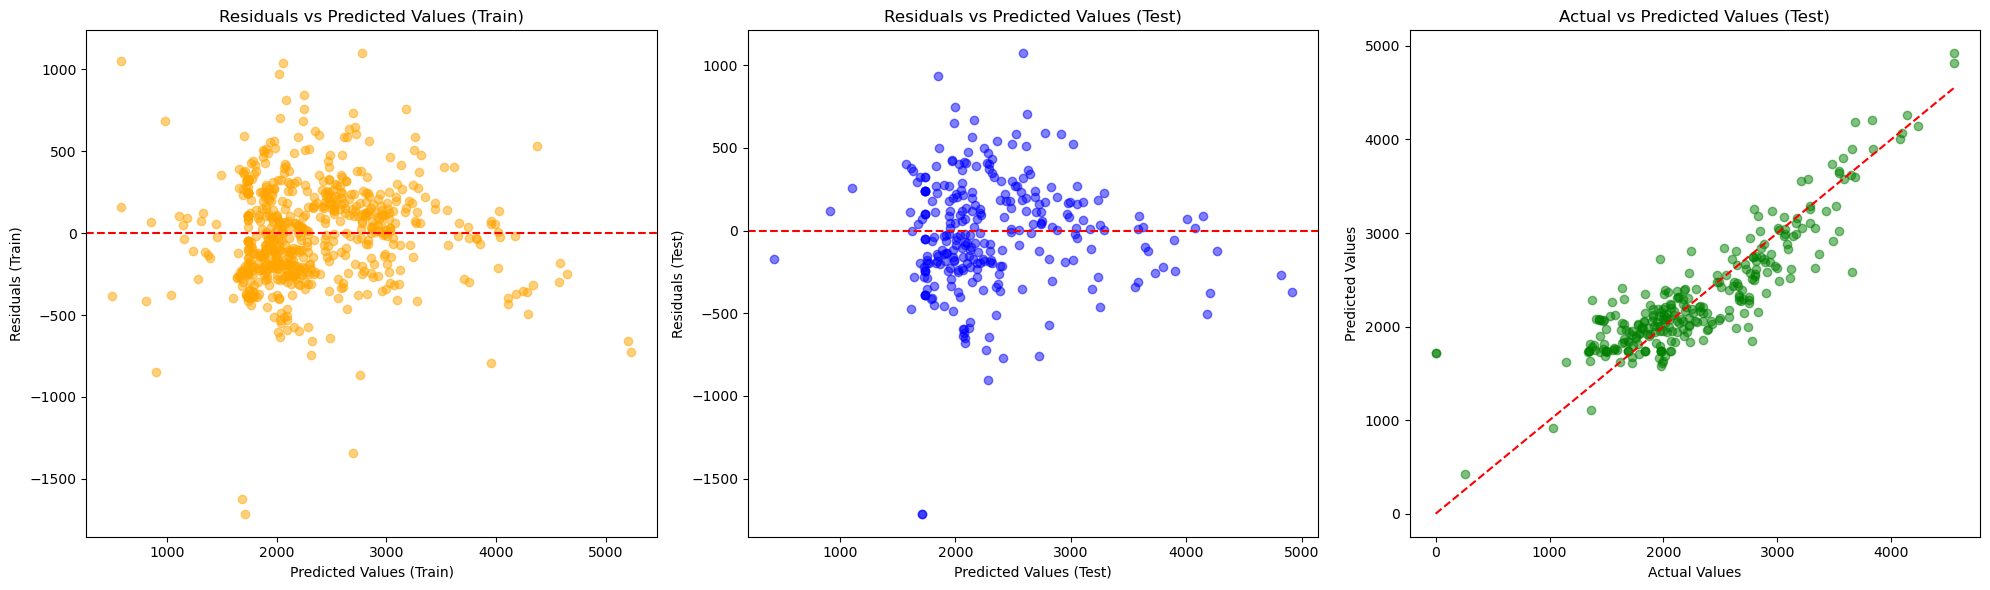

In [190]:
# Bayesian Ridge tanpa tuning
results_tuning.append(evaluate_model(BayesianRidge(), 'Bayesian Ridge'))

### Linear Regression

<Figure size 1400x600 with 0 Axes>

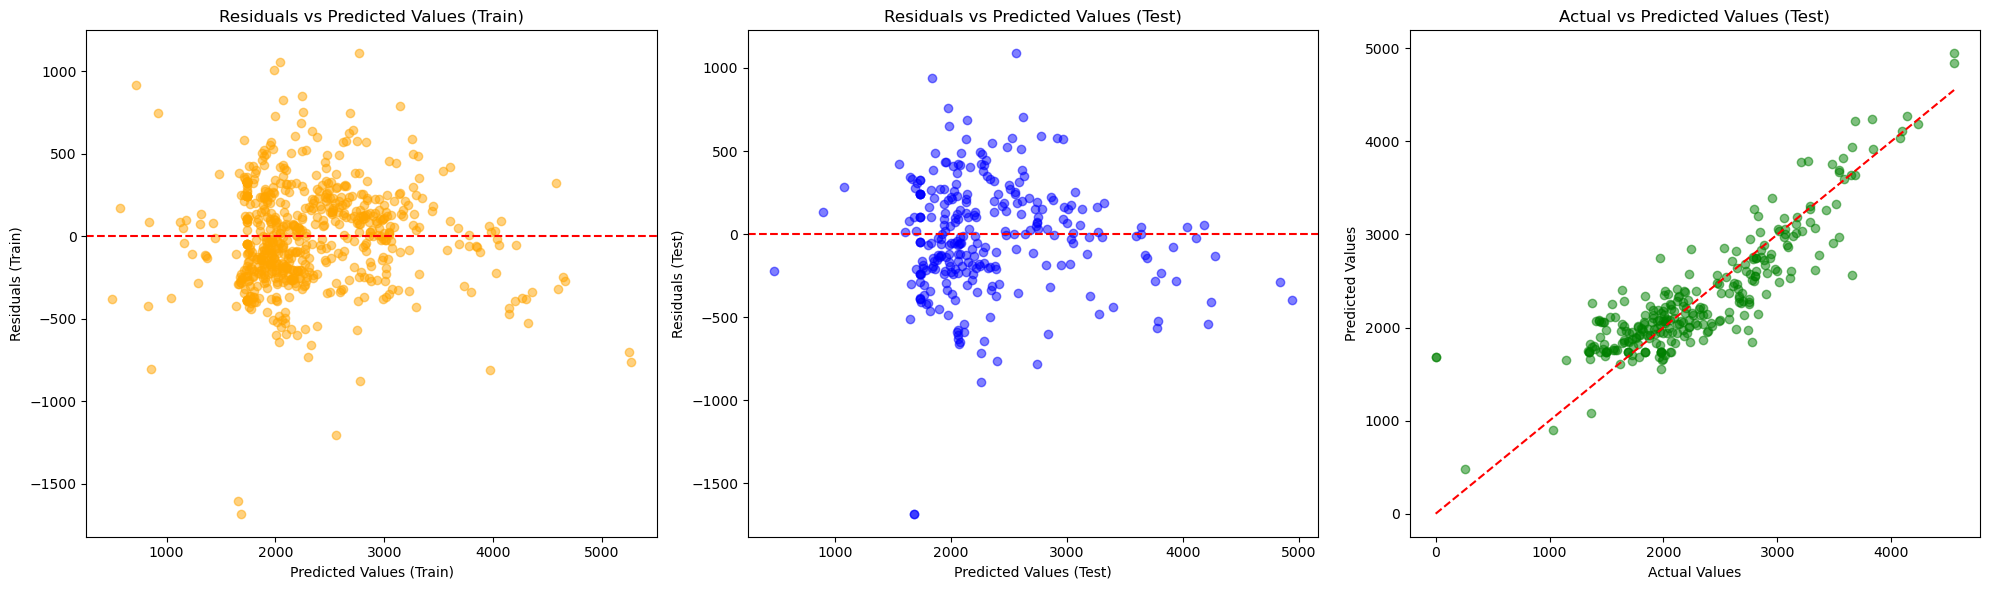

In [191]:
# No tuning needed
results_tuning.append(evaluate_model(LinearRegression(), 'Linear Regression'))

## Hasil: Tuning

In [192]:
results_df = pd.DataFrame(results_tuning)

results_df['RMSE Difference'] = results_df['RMSE Test'] - results_df['RMSE Train']
results_df['R2 Difference'] = results_df['R2 Test'] - results_df['R2 Train']
results_df['MAE Difference'] = results_df['MAE Test'] - results_df['MAE Train']
results_df['MAPE Difference'] = results_df['MAPE Test'] - results_df['MAPE Train']

results_df = results_df[columns_order].sort_values(by=['RMSE Test','RMSE Train','RMSE Difference'],ascending=[True,True,True])

results_df

Model  Training Time (s)  RMSE Train  RMSE Test  \
0              Ridge             7.6788    303.4618   339.9479   
2     Bayesian Ridge             6.1772    299.8818   341.5219   
3  Linear Regression             6.5931    298.2328   345.0450   
1              Lasso             7.8260    298.2488   345.2601   

   RMSE Difference  R2 Train  R2 Test  R2 Difference  MAE Train  MAE Test  \
0          36.4861    0.8197   0.7712        -0.0485   234.1709  254.6369   
2          41.6401    0.8239   0.7691        -0.0548   232.2006  257.4062   
3          46.8121    0.8258   0.7643        -0.0615   230.9529  260.4319   
1          47.0113    0.8258   0.7640        -0.0618   231.0521  260.4145   

   MAE Difference  Mean Residual Train  Mean Residual Test  \
0         20.4660               0.0000            -15.6484   
2         25.2056               0.0000            -19.6452   
3         29.4790               0.0042            -22.4947   
1         29.3623               0.0000            -22.5053   

              MAPE Train              MAPE Test        MAPE Difference  
0 11885117487826614.0000 56051105130661144.0000 44165987642834528.0000  
2 11597169790026170.0000 54713721087634408.0000 43116551297608240.0000  
3 11293764496421530.0000 53718589044547904.0000 42424824548126376.0000  
1 11348106638758338.0000 54000653100911576.0000 42652546462153240.0000

# Dataset dengan 2 feature saja

In [193]:
import numpy as np
import matplotlib.pyplot as plt
import time
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error, mean_absolute_percentage_error
from sklearn.model_selection import KFold

def evaluate_model(model, model_name):
    start_time = time.time()
    
    # Inisialisasi K-Fold
    kf = KFold(n_splits=3, shuffle=True, random_state=42)
    
    rmse_train_list = []
    r2_train_list = []
    mae_train_list = []
    mape_train_list = []
    
    # K-Fold Cross Validation
    for train_index, val_index in kf.split(X_train):
        X_train_fold, X_val_fold = X_train.iloc[train_index], X_train.iloc[val_index]
        y_train_fold, y_val_fold = y_train.iloc[train_index], y_train.iloc[val_index]
        
        # Latih model pada lipatan
        model.fit(X_train_fold, y_train_fold)
        y_train_pred = model.predict(X_train_fold)
        y_val_pred = model.predict(X_val_fold)
        
        # Hitung metrik untuk lipatan
        rmse_train_list.append(np.sqrt(mean_squared_error(y_train_fold, y_train_pred)))
        r2_train_list.append(r2_score(y_train_fold, y_train_pred))
        mae_train_list.append(mean_absolute_error(y_train_fold, y_train_pred))
        mape_train_list.append(mean_absolute_percentage_error(y_train_fold, y_train_pred))

    # Rata-rata metrik untuk data latih
    rmse_train = np.mean(rmse_train_list)
    r2_train = np.mean(r2_train_list)
    mae_train = np.mean(mae_train_list)
    mape_train = np.mean(mape_train_list)

    # Latih model dengan semua data latih untuk evaluasi
    model.fit(X_train, y_train)
    
    # Hitung prediksi untuk data uji
    y_test_pred = model.predict(X_test)
    
    # Hitung metrik untuk data uji
    rmse_test = np.sqrt(mean_squared_error(y_test, y_test_pred))
    r2_test = r2_score(y_test, y_test_pred)
    mae_test = mean_absolute_error(y_test, y_test_pred)
    mape_test = mean_absolute_percentage_error(y_test, y_test_pred)

    # Hitung residual untuk data latih dan data uji
    y_train_pred = model.predict(X_train)  # Prediksi pada seluruh data latih
    residuals_train = y_train - y_train_pred
    residuals_test = y_test - y_test_pred
    mean_residual_train = np.mean(residuals_train)
    mean_residual_test = np.mean(residuals_test)

    # Plot residual
    plt.figure(figsize=(14, 6))

    # Plot residual dan nilai aktual vs prediksi
    plt.figure(figsize=(20, 6))

    # Residuals vs Predicted Values (data latih)
    plt.subplot(1, 3, 1)
    plt.scatter(y_train_pred, residuals_train, color='orange', alpha=0.5)
    plt.axhline(y=0, color='red', linestyle='--')
    plt.title('Residuals vs Predicted Values (Train)')
    plt.xlabel('Predicted Values (Train)')
    plt.ylabel('Residuals (Train)')
    
    # Residuals vs Predicted Values (data uji)
    plt.subplot(1, 3, 2)
    plt.scatter(y_test_pred, residuals_test, color='blue', alpha=0.5)
    plt.axhline(y=0, color='red', linestyle='--')
    plt.title('Residuals vs Predicted Values (Test)')
    plt.xlabel('Predicted Values (Test)')
    plt.ylabel('Residuals (Test)')
    
    # Actual vs Predicted Values (data uji)
    plt.subplot(1, 3, 3)
    plt.scatter(y_test, y_test_pred, color='green', alpha=0.5)
    plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')  # Garis diagonal
    plt.title('Actual vs Predicted Values (Test)')
    plt.xlabel('Actual Values')
    plt.ylabel('Predicted Values')

    plt.tight_layout()
    plt.show()

    end_time = time.time()
    training_time = end_time - start_time

    return {
        'Model': model_name,
        'Training Time (s)': training_time,
        'RMSE Train': rmse_train,
        'RMSE Test': rmse_test,
        'R2 Train': r2_train,
        'R2 Test': r2_test,
        'MAE Train': mae_train,
        'MAE Test': mae_test,
        'Mean Residual Train': mean_residual_train,
        'Mean Residual Test': mean_residual_test,
        'MAPE Train': mape_train,
        'MAPE Test': mape_test
    }

results_df2 = []


In [194]:
X_train = df_tr[['DistancePerStep','Total_MET']]
X_test = df_ts[['DistancePerStep','Total_MET']]

y_train = df_tr['Calories']
y_test = df_ts['Calories']

In [195]:
X_train

DistancePerStep  Total_MET
0             0.5898     0.5810
1             0.1761     0.1637
2             0.1126    -1.3523
3             0.7909     0.1989
4             0.4827     1.1792
..               ...        ...
652          -3.1449    -1.3977
653           0.1243    -0.7509
654           0.6410     0.1171
655           0.5852     0.2796
656           0.0626    -0.2976

[657 rows x 2 columns]

## Model: Baseline

### Random Forest

<Figure size 1400x600 with 0 Axes>

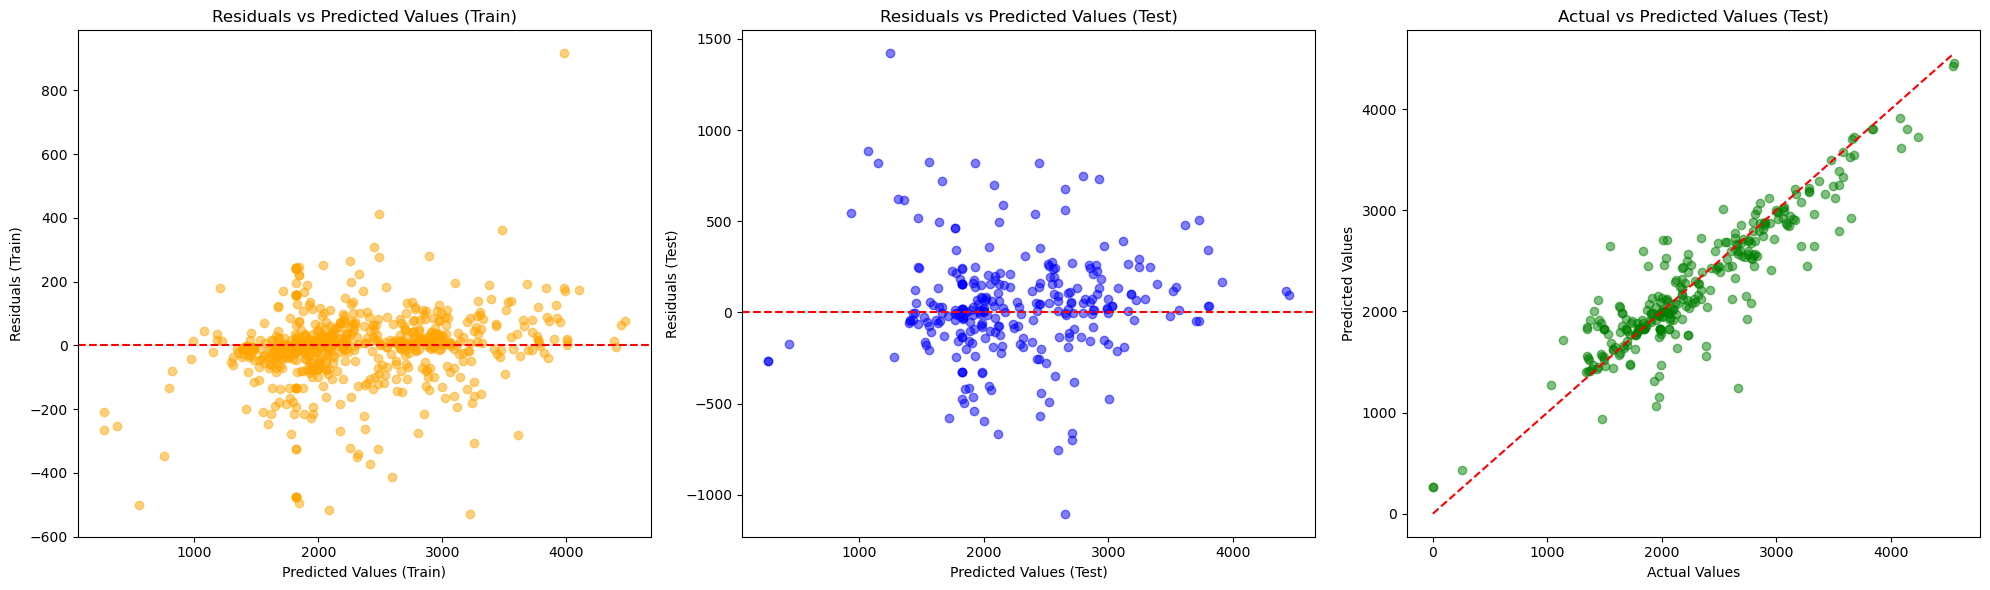

{'Model': 'Random Forest',
 'Training Time (s)': 12.707937717437744,
 'RMSE Train': 128.69880243550506,
 'RMSE Test': 291.9169257456662,
 'R2 Train': 0.9675231152098213,
 'R2 Test': 0.8313026100790539,
 'MAE Train': 82.59591854935064,
 'MAE Test': 197.81702374222914,
 'Mean Residual Train': -5.050554622845528,
 'Mean Residual Test': 36.354494936385215,
 'MAPE Train': 2198392400295978.0,
 'MAPE Test': 8522685854100327.0}

In [196]:
rf_results = evaluate_model(RandomForestRegressor(random_state=42), 'Random Forest')
results_df2.append(rf_results)
rf_results

### Linear Regression

<Figure size 1400x600 with 0 Axes>

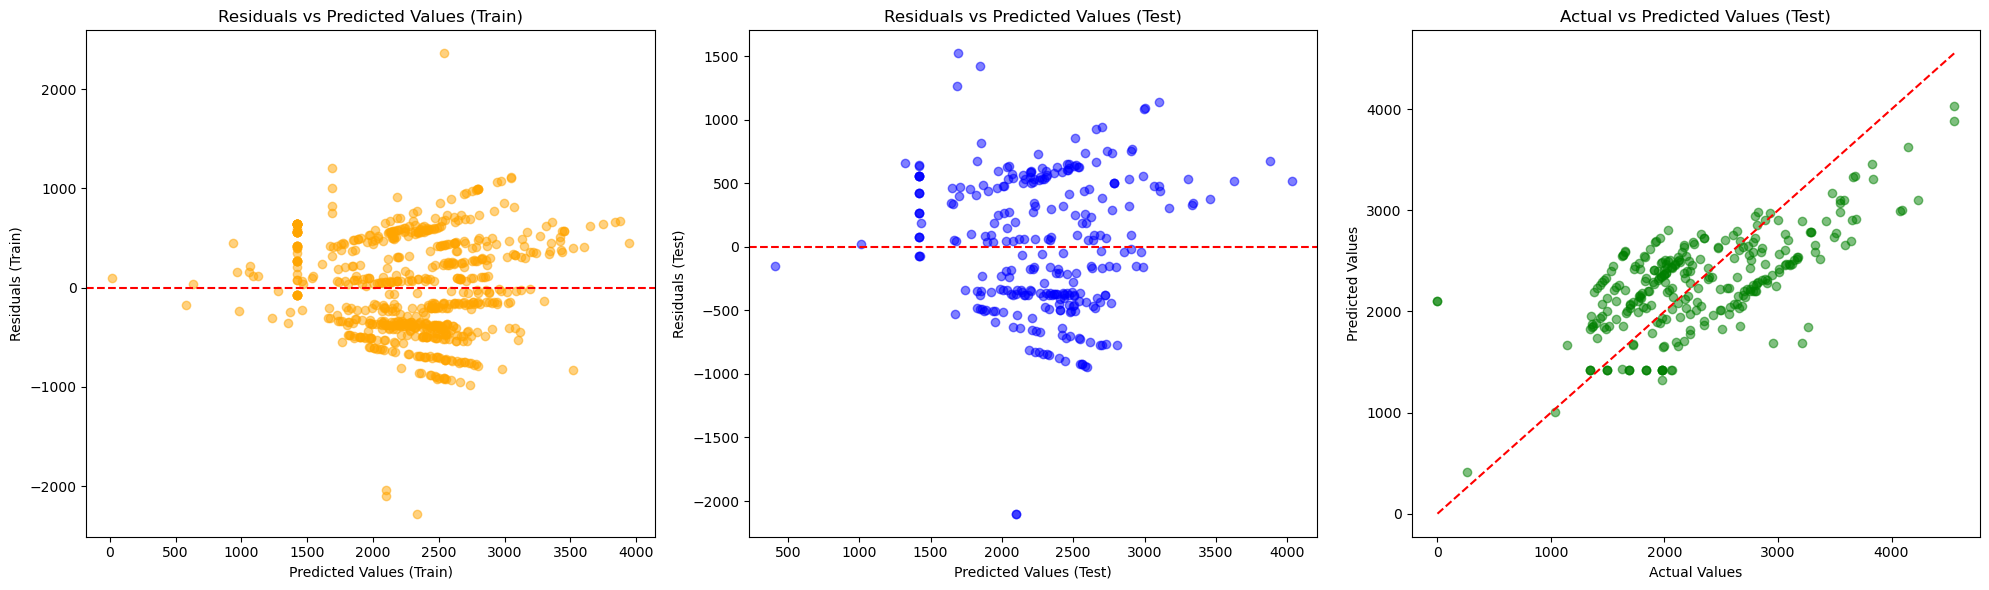

{'Model': 'Linear Regression',
 'Training Time (s)': 9.137574195861816,
 'RMSE Train': 498.3790155207821,
 'RMSE Test': 537.6257489045356,
 'R2 Train': 0.5128197037960647,
 'R2 Test': 0.4277972629102791,
 'MAE Train': 416.8842367854192,
 'MAE Test': 452.2749161916145,
 'Mean Residual Train': 1.4396871991534936e-13,
 'Mean Residual Test': 12.526367627646142,
 'MAPE Train': 1.4521652722262608e+16,
 'MAPE Test': 6.706247975830674e+16}

In [197]:
lr_results = evaluate_model(LinearRegression(), 'Linear Regression')
results_df2.append(lr_results)
lr_results

### Ridge

<Figure size 1400x600 with 0 Axes>

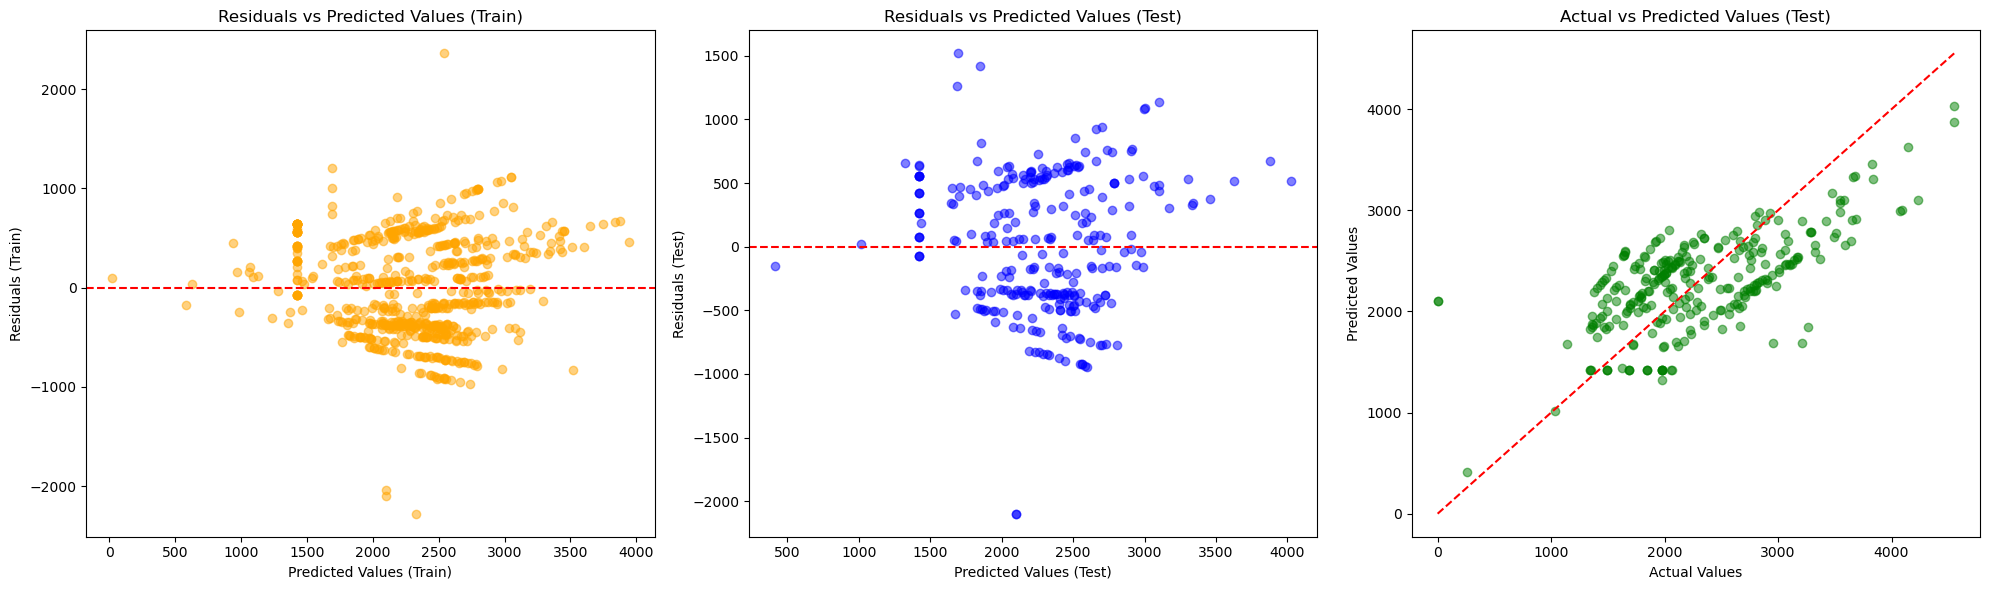

{'Model': 'Ridge',
 'Training Time (s)': 9.073875904083252,
 'RMSE Train': 498.3803542398958,
 'RMSE Test': 537.567533693421,
 'R2 Train': 0.5128170908090403,
 'R2 Test': 0.4279211747568442,
 'MAE Train': 416.86718635409926,
 'MAE Test': 452.2226789362773,
 'Mean Residual Train': 1.3566283222792536e-13,
 'Mean Residual Test': 12.471351271228619,
 'MAPE Train': 1.45115878609424e+16,
 'MAPE Test': 6.703091608536477e+16}

In [198]:
ridge_results = evaluate_model(Ridge(random_state=42), 'Ridge')
results_df2.append(ridge_results)
ridge_results

### Lasso

<Figure size 1400x600 with 0 Axes>

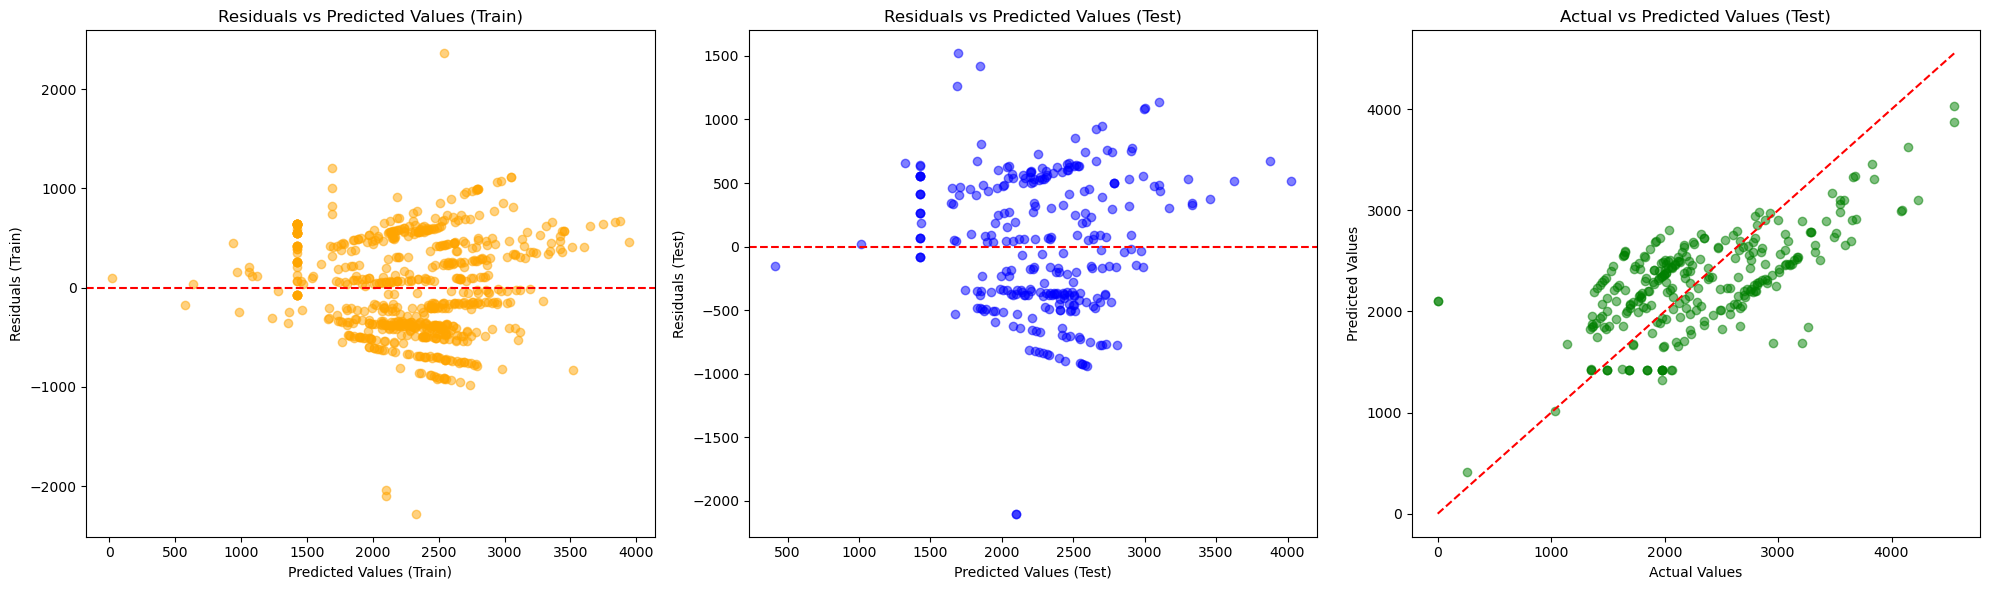

{'Model': 'Lasso',
 'Training Time (s)': 9.279759407043457,
 'RMSE Train': 498.38037036092845,
 'RMSE Test': 537.6927019115491,
 'R2 Train': 0.5128170480816482,
 'R2 Test': 0.4276547359593248,
 'MAE Train': 416.82638574893514,
 'MAE Test': 452.25436583536884,
 'Mean Residual Train': 1.467373491444907e-13,
 'Mean Residual Test': 12.507693382396502,
 'MAPE Train': 1.4536254897288518e+16,
 'MAPE Test': 6.712907336564935e+16}

In [199]:
lasso_results = evaluate_model(Lasso(random_state=42), 'Lasso')
results_df2.append(lasso_results)
lasso_results

### Elastic Net

<Figure size 1400x600 with 0 Axes>

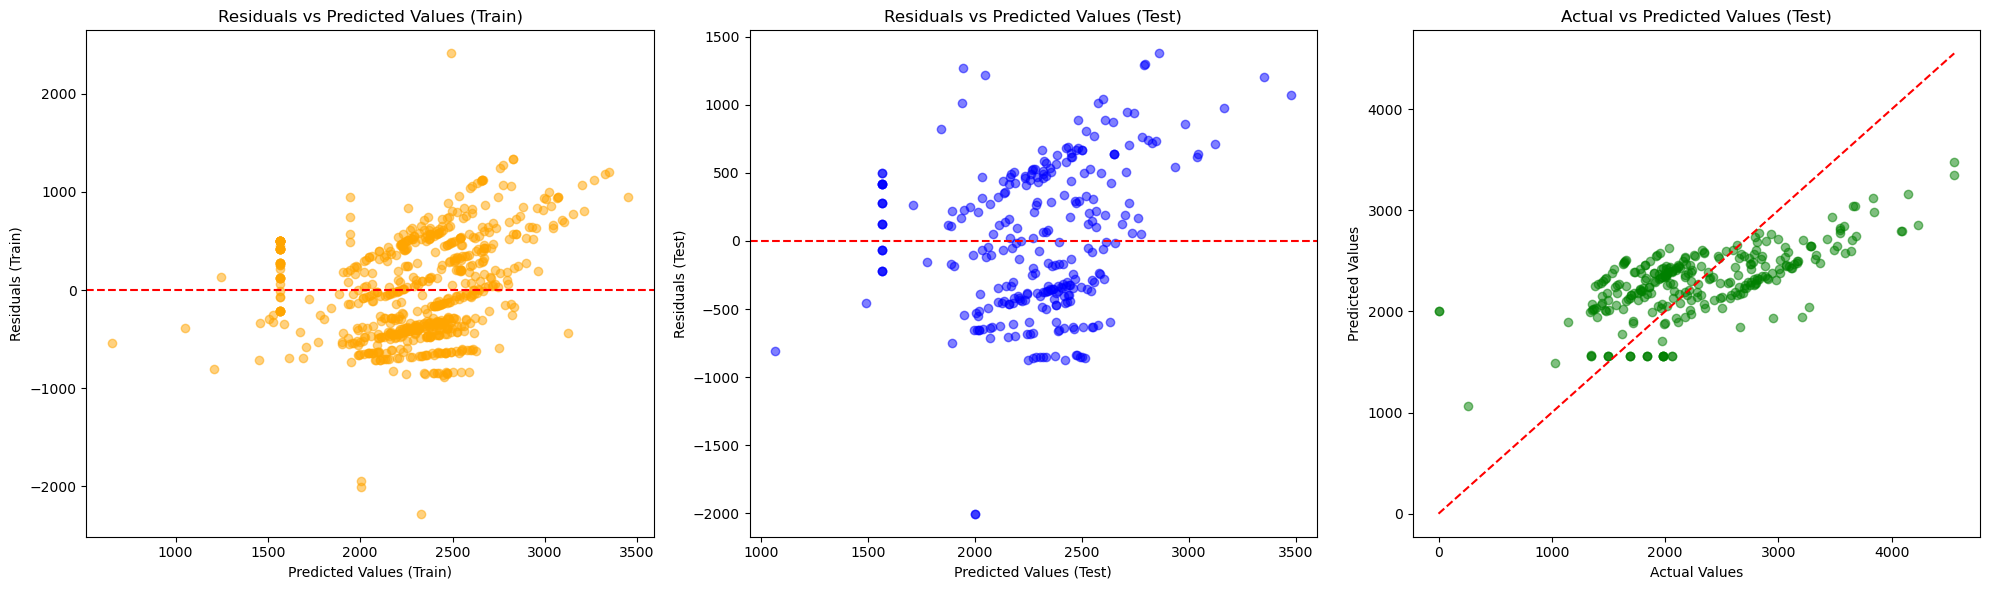

{'Model': 'Elastic Net',
 'Training Time (s)': 7.7075605392456055,
 'RMSE Train': 522.1813723833385,
 'RMSE Test': 549.1159879145985,
 'R2 Train': 0.4653861623146196,
 'R2 Test': 0.40307744774670806,
 'MAE Train': 434.7890938892772,
 'MAE Test': 459.99033055744917,
 'Mean Residual Train': 1.6058049529019737e-13,
 'Mean Residual Test': 2.6739568829150664,
 'MAPE Train': 1.3820396917680066e+16,
 'MAPE Test': 6.394096990368173e+16}

In [200]:
elastic_net_results = evaluate_model(ElasticNet(random_state=42), 'Elastic Net')
results_df2.append(elastic_net_results)
elastic_net_results

### Decision Tree

<Figure size 1400x600 with 0 Axes>

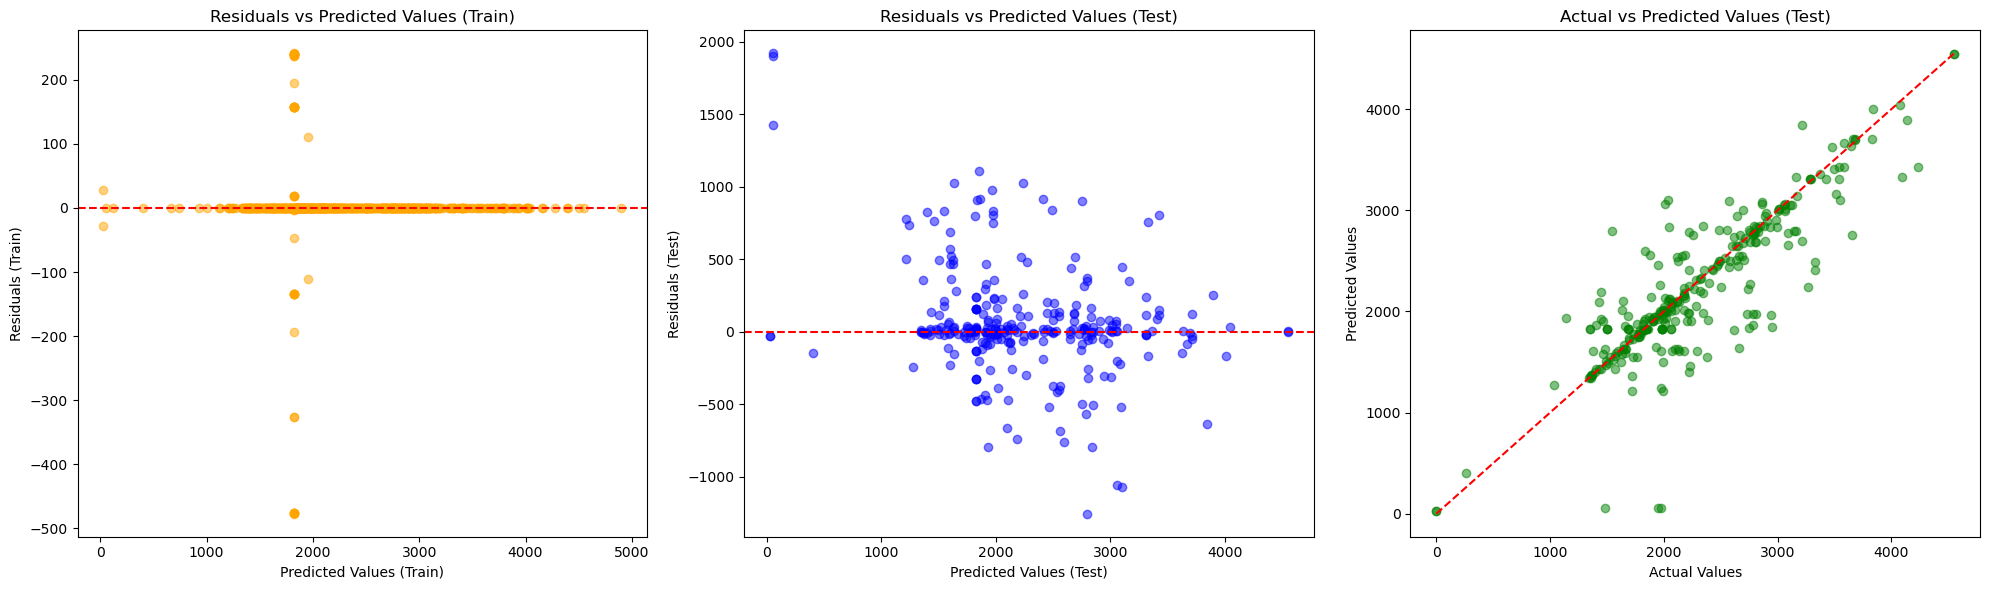

{'Model': 'Decision Tree',
 'Training Time (s)': 7.596765518188477,
 'RMSE Train': 62.761390759849064,
 'RMSE Test': 390.49253478509553,
 'R2 Train': 0.9923022701330185,
 'R2 Test': 0.6981332484627811,
 'MAE Train': 13.610337291253686,
 'MAE Test': 230.87940379403796,
 'Mean Residual Train': 5.191179804640001e-15,
 'Mean Residual Test': 63.0719886986104,
 'MAPE Train': 97680813835661.44,
 'MAPE Test': 910302052340844.9}

In [201]:
dt_results = evaluate_model(DecisionTreeRegressor(random_state=42), 'Decision Tree')
results_df2.append(dt_results)
dt_results

### XGBoost

<Figure size 1400x600 with 0 Axes>

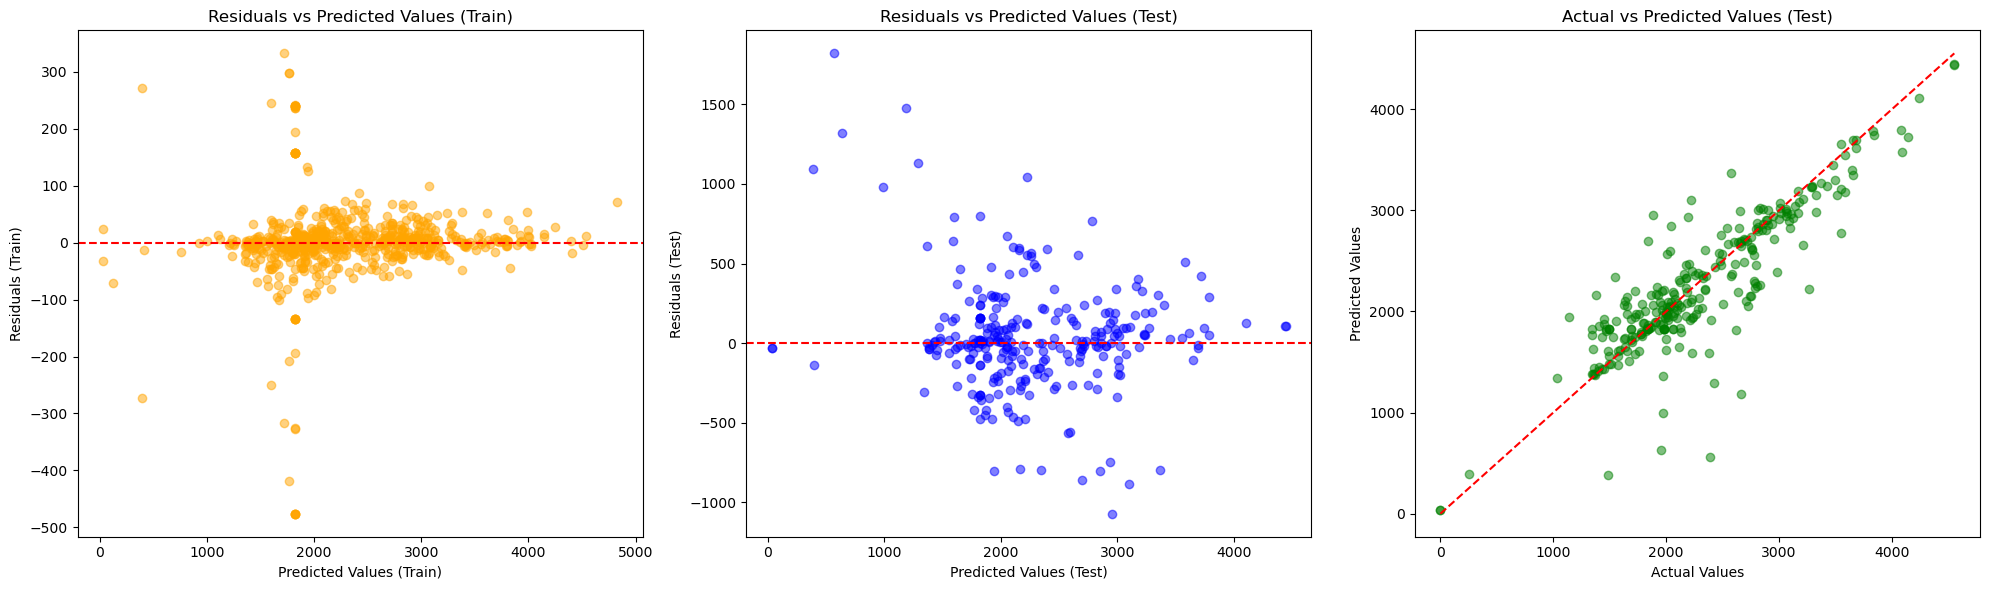

{'Model': 'XGBoost',
 'Training Time (s)': 8.065407037734985,
 'RMSE Train': 66.91386954474278,
 'RMSE Test': 349.6960638955206,
 'R2 Train': 0.9912501074946968,
 'R2 Test': 0.7579130951685933,
 'MAE Train': 25.909415681612543,
 'MAE Test': 225.48500188191733,
 'Mean Residual Train': 0.009793703958868437,
 'Mean Residual Test': 33.149176550249685,
 'MAPE Train': 79483441077137.36,
 'MAPE Test': 1035610677895458.5}

In [202]:
xgb_results = evaluate_model(XGBRegressor(random_state=42), 'XGBoost')
results_df2.append(xgb_results)
xgb_results

### Gradien Boosting

<Figure size 1400x600 with 0 Axes>

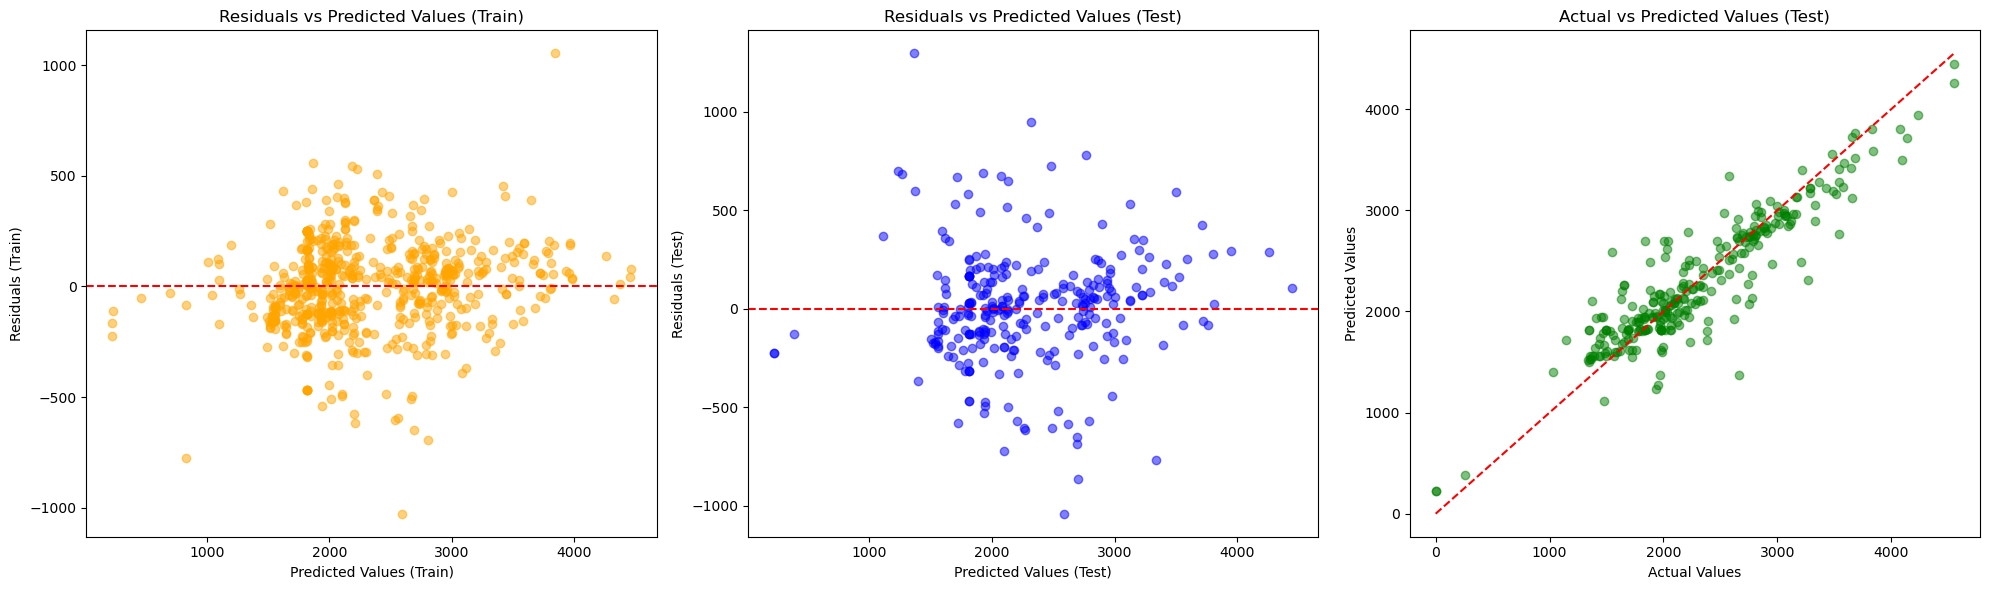

{'Model': 'Gradient Boosting',
 'Training Time (s)': 8.250534296035767,
 'RMSE Train': 183.82442846833388,
 'RMSE Test': 291.97201478911654,
 'R2 Train': 0.9337388550025495,
 'R2 Test': 0.8312389326837228,
 'MAE Train': 137.90652135238966,
 'MAE Test': 206.66715422298134,
 'Mean Residual Train': -5.8833371119253345e-15,
 'Mean Residual Test': 8.96278729200879,
 'MAPE Train': 997832987669267.6,
 'MAPE Test': 7129409365473846.0}

In [203]:
gb_results = evaluate_model(GradientBoostingRegressor(random_state=42), 'Gradient Boosting')
results_df2.append(gb_results)
gb_results

### Support Vector Regressor

<Figure size 1400x600 with 0 Axes>

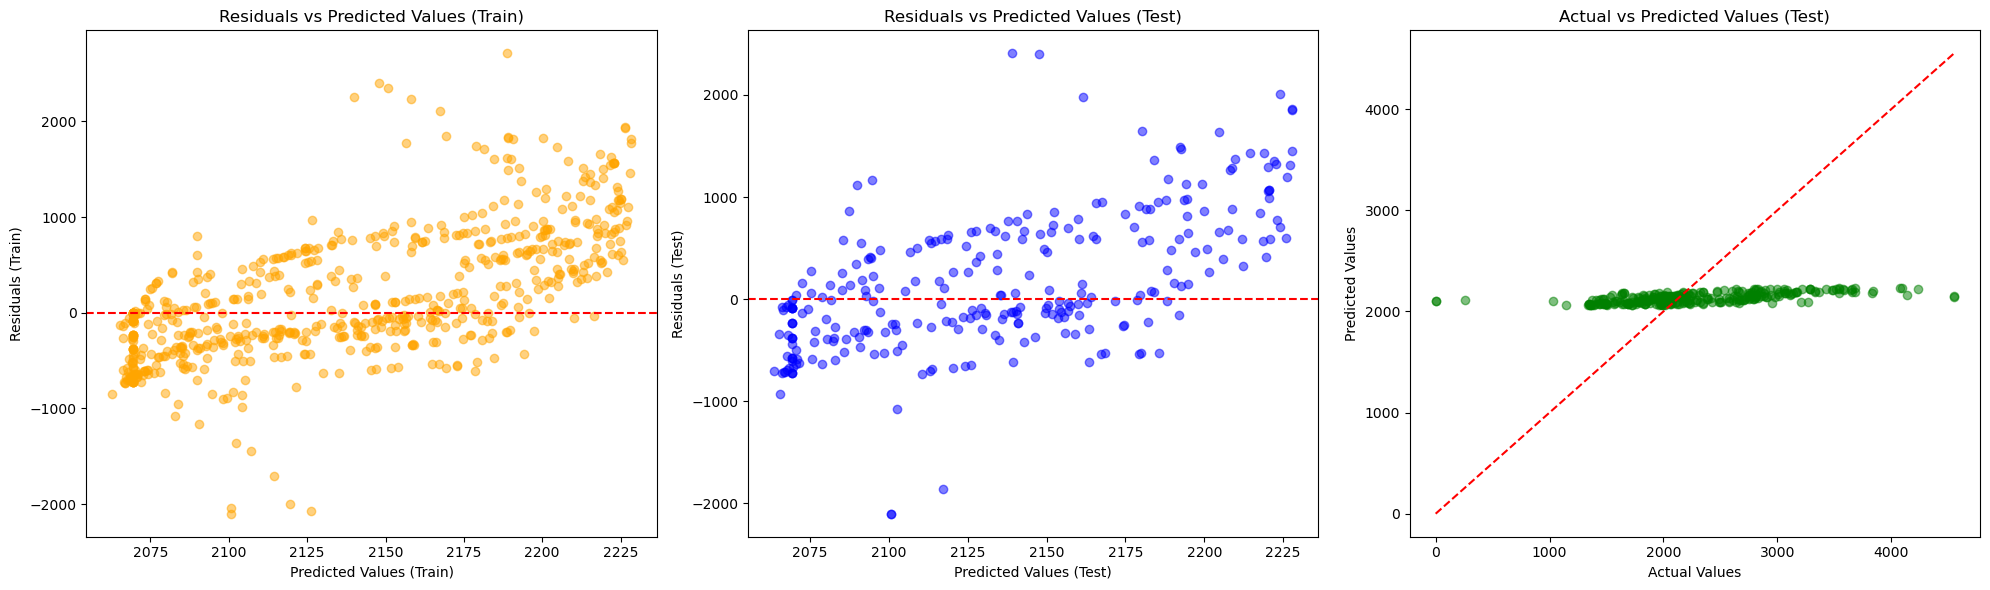

{'Model': 'Support Vector Regressor',
 'Training Time (s)': 7.388879776000977,
 'RMSE Train': 710.0343976198506,
 'RMSE Test': 699.2154967697849,
 'R2 Train': 0.013591238808149756,
 'R2 Test': 0.03214143001904901,
 'MAE Train': 538.402911338496,
 'MAE Test': 529.4216039154064,
 'Mean Residual Train': 170.96143370099023,
 'Mean Residual Test': 163.4624557230306,
 'MAPE Train': 1.4675995916330898e+16,
 'MAPE Test': 6.71018657411017e+16}

In [204]:
svr_results = evaluate_model(SVR(), 'Support Vector Regressor')
results_df2.append(svr_results)
svr_results

### Bayesian Ridge

<Figure size 1400x600 with 0 Axes>

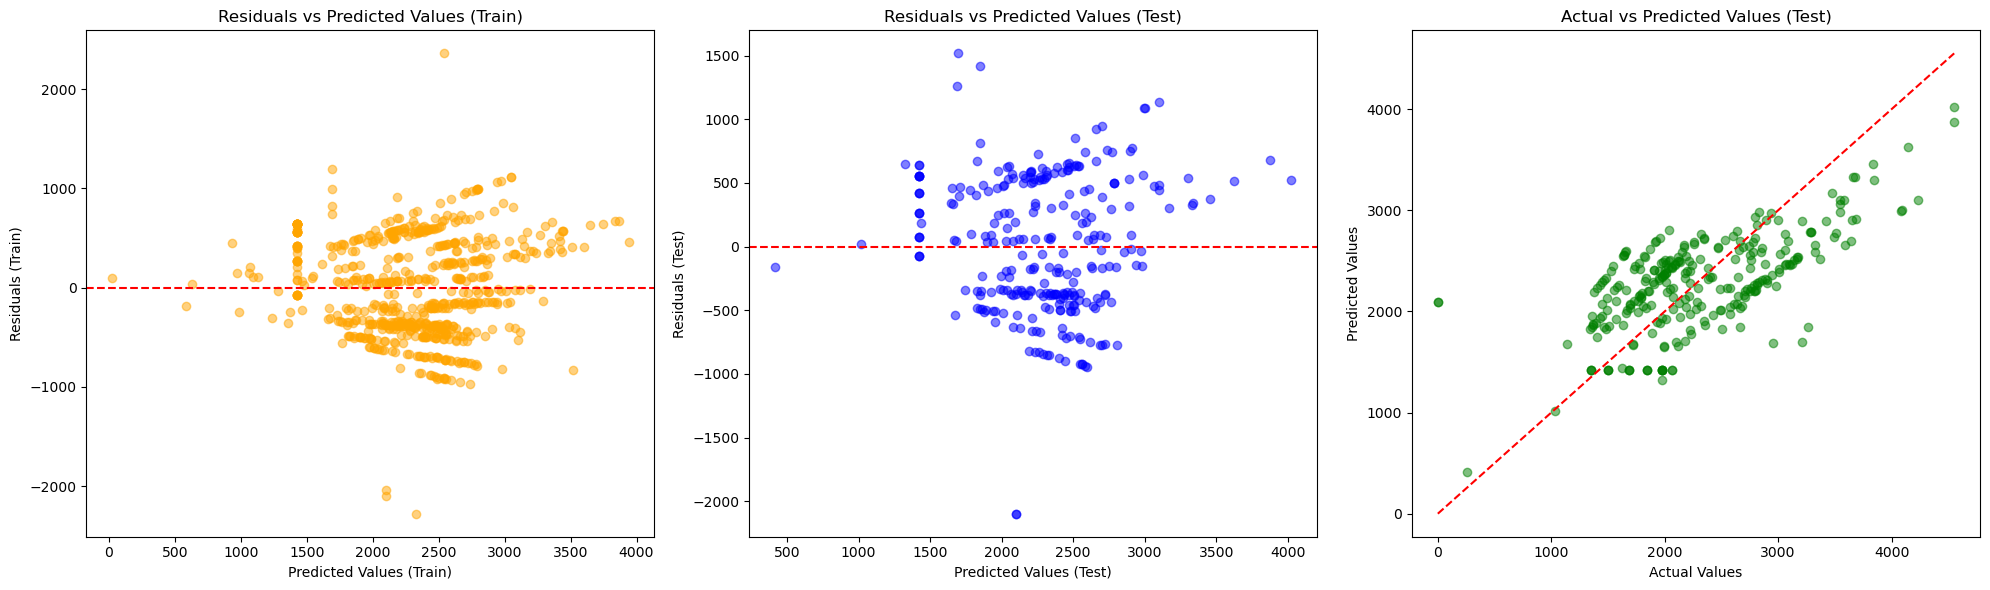

{'Model': 'Bayesian Ridge',
 'Training Time (s)': 7.062566518783569,
 'RMSE Train': 498.38539644232475,
 'RMSE Test': 537.500882401789,
 'R2 Train': 0.5128071114511159,
 'R2 Test': 0.428063026436613,
 'MAE Train': 416.84148146116155,
 'MAE Test': 452.16161826649443,
 'Mean Residual Train': 1.5227460760277336e-13,
 'Mean Residual Test': 12.40704801632433,
 'MAPE Train': 1.4501071866128314e+16,
 'MAPE Test': 6.699417889924251e+16}

In [205]:
br_results = evaluate_model(BayesianRidge(), 'Bayesian Ridge')
results_df2.append(br_results)
br_results

### CatBoost regressor

<Figure size 1400x600 with 0 Axes>

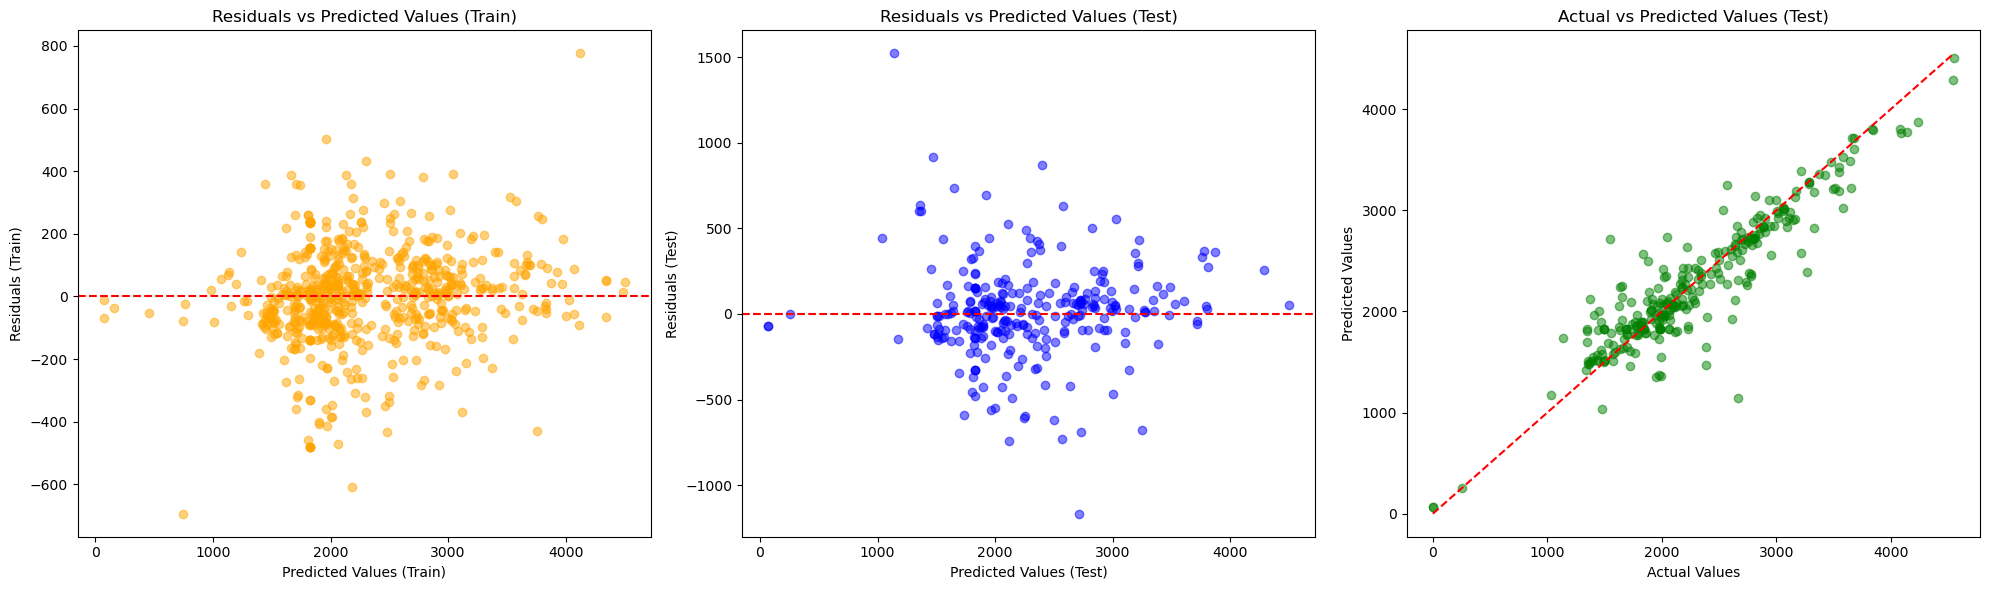

{'Model': 'CatBoost Regressor',
 'Training Time (s)': 37.0963819026947,
 'RMSE Train': 142.0001960459649,
 'RMSE Test': 277.1824454471271,
 'R2 Train': 0.9604878302167684,
 'R2 Test': 0.8479027878146769,
 'MAE Train': 104.63608592665078,
 'MAE Test': 185.45914751387477,
 'Mean Residual Train': -0.24061095808745434,
 'Mean Residual Test': 14.549355104959142,
 'MAPE Train': 825568986310141.6,
 'MAPE Test': 2228633403925729.2}

In [206]:
cb_results = evaluate_model(CatBoostRegressor(random_state=42, silent=True), 'CatBoost Regressor')
results_df2.append(cb_results)
cb_results

### LightGBM Regressor

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000219 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 282
[LightGBM] [Info] Number of data points in the train set: 438, number of used features: 2
[LightGBM] [Info] Start training from score 2331.639269
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, 

<Figure size 1400x600 with 0 Axes>

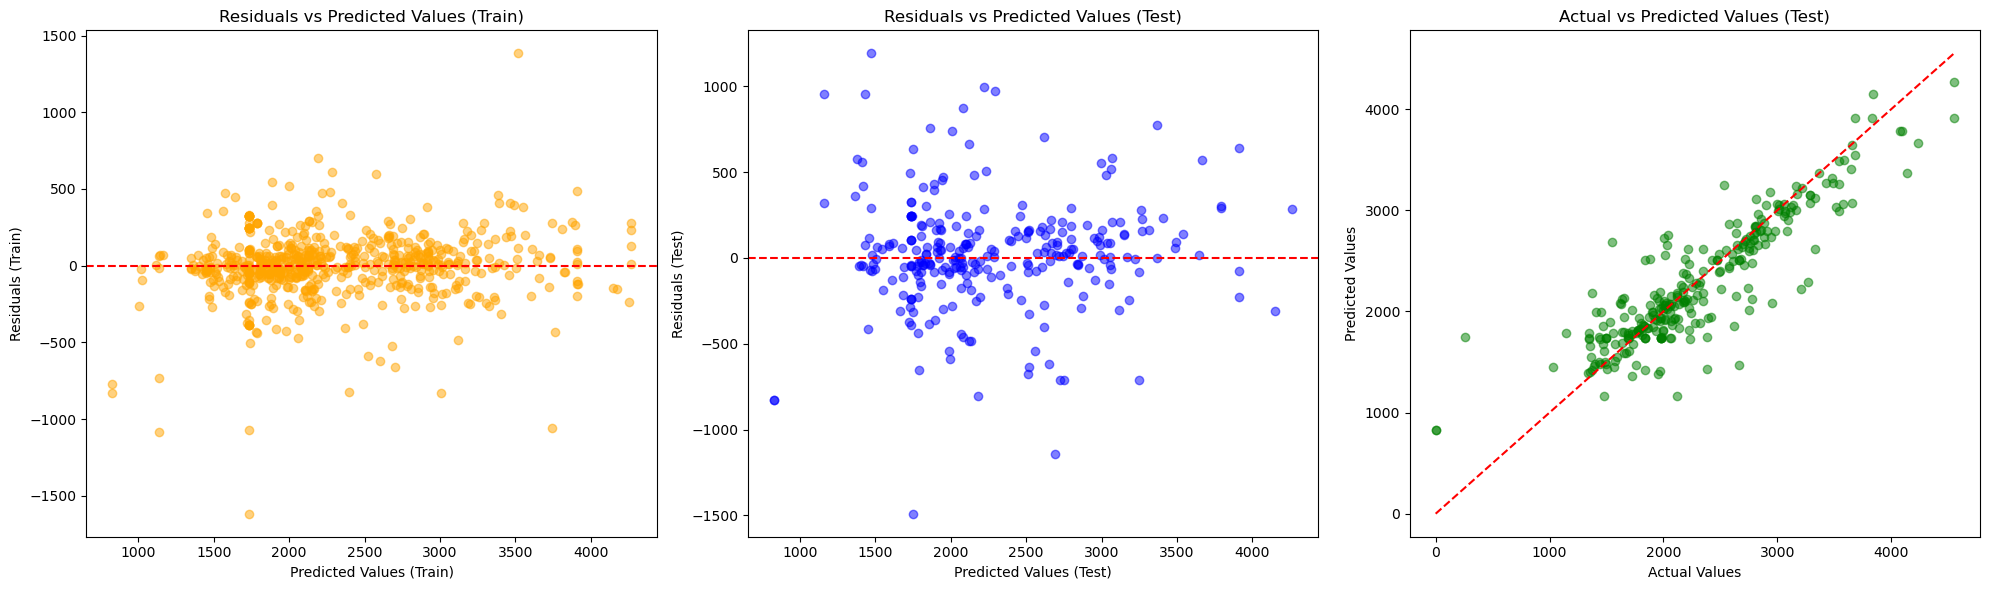

{'Model': 'LightGBM Regressor',
 'Training Time (s)': 7.95672082901001,
 'RMSE Train': 236.93324725576076,
 'RMSE Test': 327.3618698300312,
 'R2 Train': 0.8903462634746911,
 'R2 Test': 0.7878485545295582,
 'MAE Train': 157.43685349831142,
 'MAE Test': 220.54634791214025,
 'Mean Residual Train': 4.096099871125347e-08,
 'Mean Residual Test': 27.609368904249916,
 'MAPE Train': 7233153479767925.0,
 'MAPE Test': 2.6412429328439584e+16}

In [207]:
lgbm_results = evaluate_model(LGBMRegressor(random_state=42), 'LightGBM Regressor')
results_df2.append(lgbm_results)
lgbm_results

### Extra Trees Regressor

<Figure size 1400x600 with 0 Axes>

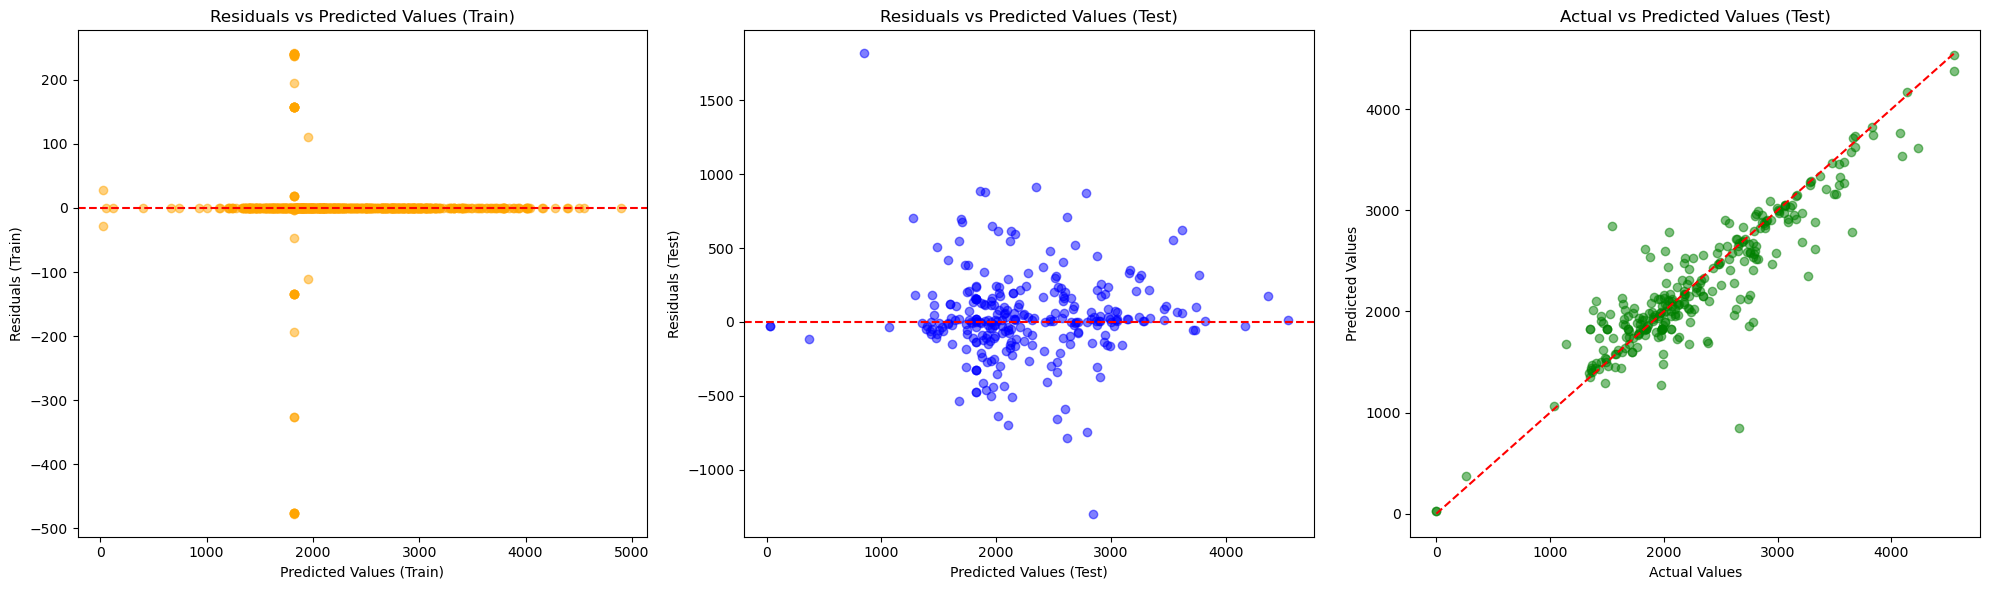

{'Model': 'Extra Trees Regressor',
 'Training Time (s)': 11.23168683052063,
 'RMSE Train': 62.76150470696805,
 'RMSE Test': 296.8913646641603,
 'R2 Train': 0.9923022427637959,
 'R2 Test': 0.8255042146598377,
 'MAE Train': 13.617491020325204,
 'MAE Test': 189.3351277172346,
 'Mean Residual Train': -1.5227460760277336e-14,
 'Mean Residual Test': 33.96515943031769,
 'MAPE Train': 97680813835661.44,
 'MAPE Test': 910302052340844.9}

In [208]:
et_results = evaluate_model(ExtraTreesRegressor(random_state=42), 'Extra Trees Regressor')
results_df2.append(et_results)
et_results

## Hasil: Baseline

In [209]:
results_df = pd.DataFrame(results_df2)

results_df['RMSE Difference'] = results_df['RMSE Test'] - results_df['RMSE Train']
results_df['R2 Difference'] = results_df['R2 Test'] - results_df['R2 Train']
results_df['MAE Difference'] = results_df['MAE Test'] - results_df['MAE Train']
results_df['MAPE Difference'] = results_df['MAPE Test'] - results_df['MAPE Train']

# Menentukan urutan kolom yang diinginkan
columns_order = [
    'Model', 'Training Time (s)', 
    'RMSE Train', 'RMSE Test', 'RMSE Difference',
    'R2 Train', 'R2 Test', 'R2 Difference',
    'MAE Train', 'MAE Test', 'MAE Difference',
    'Mean Residual Train', 'Mean Residual Test',
    'MAPE Train', 'MAPE Test', 'MAPE Difference'
]

# Mengatur urutan kolom dan mengurutkan hasil berdasarkan beberapa metrik
results_df = results_df[columns_order].sort_values(
    by=['MAE Difference'],
    ascending=[True]
)

pd.options.display.float_format = '{:.4f}'.format
# Tampilkan DataFrame hasil
results_df

Model  Training Time (s)  RMSE Train  RMSE Test  \
8   Support Vector Regressor             7.3889    710.0344   699.2155   
4                Elastic Net             7.7076    522.1814   549.1160   
9             Bayesian Ridge             7.0626    498.3854   537.5009   
2                      Ridge             9.0739    498.3804   537.5675   
1          Linear Regression             9.1376    498.3790   537.6257   
3                      Lasso             9.2798    498.3804   537.6927   
11        LightGBM Regressor             7.9567    236.9332   327.3619   
7          Gradient Boosting             8.2505    183.8244   291.9720   
10        CatBoost Regressor            37.0964    142.0002   277.1824   
0              Random Forest            12.7079    128.6988   291.9169   
12     Extra Trees Regressor            11.2317     62.7615   296.8914   
6                    XGBoost             8.0654     66.9139   349.6961   
5              Decision Tree             7.5968     62.7614   390.4925   

    RMSE Difference  R2 Train  R2 Test  R2 Difference  MAE Train  MAE Test  \
8          -10.8189    0.0136   0.0321         0.0186   538.4029  529.4216   
4           26.9346    0.4654   0.4031        -0.0623   434.7891  459.9903   
9           39.1155    0.5128   0.4281        -0.0847   416.8415  452.1616   
2           39.1872    0.5128   0.4279        -0.0849   416.8672  452.2227   
1           39.2467    0.5128   0.4278        -0.0850   416.8842  452.2749   
3           39.3123    0.5128   0.4277        -0.0852   416.8264  452.2544   
11          90.4286    0.8903   0.7878        -0.1025   157.4369  220.5463   
7          108.1476    0.9337   0.8312        -0.1025   137.9065  206.6672   
10         135.1822    0.9605   0.8479        -0.1126   104.6361  185.4591   
0          163.2181    0.9675   0.8313        -0.1362    82.5959  197.8170   
12         234.1299    0.9923   0.8255        -0.1668    13.6175  189.3351   
6          282.7822    0.9913   0.7579        -0.2333    25.9094  225.4850   
5          327.7311    0.9923   0.6981        -0.2942    13.6103  230.8794   

    MAE Difference  Mean Residual Train  Mean Residual Test  \
8          -8.9813             170.9614            163.4625   
4          25.2012               0.0000              2.6740   
9          35.3201               0.0000             12.4070   
2          35.3555               0.0000             12.4714   
1          35.3907               0.0000             12.5264   
3          35.4280               0.0000             12.5077   
11         63.1095               0.0000             27.6094   
7          68.7606              -0.0000              8.9628   
10         80.8231              -0.2406             14.5494   
0         115.2211              -5.0506             36.3545   
12        175.7176              -0.0000             33.9652   
6         199.5756               0.0098             33.1492   
5         217.2691               0.0000             63.0720   

               MAPE Train              MAPE Test        MAPE Difference  
8  14675995916330898.0000 67101865741101696.0000 52425869824770800.0000  
4  13820396917680066.0000 63940969903681728.0000 50120572986001664.0000  
9  14501071866128314.0000 66994178899242512.0000 52493107033114200.0000  
2  14511587860942400.0000 67030916085364768.0000 52519328224422368.0000  
1  14521652722262608.0000 67062479758306736.0000 52540827036044128.0000  
3  14536254897288518.0000 67129073365649352.0000 52592818468360832.0000  
11  7233153479767925.0000 26412429328439584.0000 19179275848671660.0000  
7    997832987669267.6250  7129409365473846.0000  6131576377804578.0000  
10   825568986310141.6250  2228633403925729.2500  1403064417615587.5000  
0   2198392400295978.0000  8522685854100327.0000  6324293453804349.0000  
12    97680813835661.4375   910302052340844.8750   812621238505183.5000  
6     79483441077137.3594  1035610677895458.5000   956127236818321.1250  
5     97680813835661.4375   910302052340844.8750

Data tersebut diurutkan berdasarkan MAE Test terkecil, dengan syarat perbedaan score dengan MAE Train tidak terlalu besar. Sehingga dapat disimpulkan 2 model terbaik pada dataset dengan menggunakan 2 feature saja adalah model: CatBoost Regressor dan Gradien Boosting

In [210]:
df_best = results_df[results_df["Model"].isin(["CatBoost Regressor", "Gradient Boosting"])]
df_best[['Model','MAE Test']]

Model  MAE Test
7    Gradient Boosting  206.6672
10  CatBoost Regressor  185.4591

## Feature Importance

### Gradien Boosting

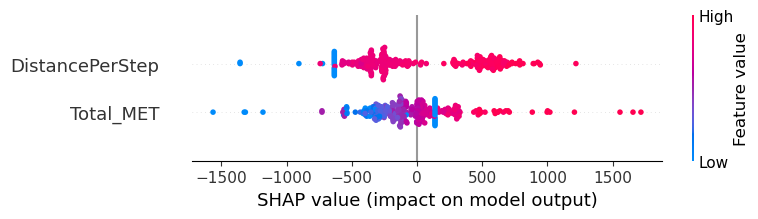

In [211]:
model = GradientBoostingRegressor(random_state=42)
model.fit(X_train, y_train)

# Use TreeExplainer for tree-based models
explainer = shap.TreeExplainer(model)
shap_values = explainer.shap_values(X_test)

# Plot feature importance
shap.summary_plot(shap_values, X_test)

### CatBoost Regressor

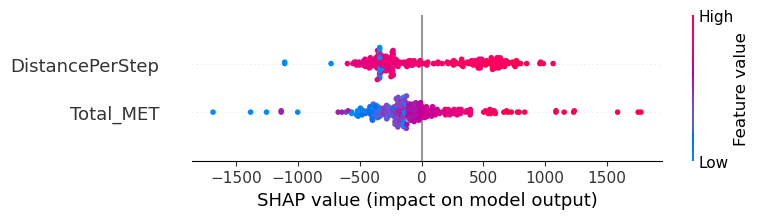

In [212]:
model = CatBoostRegressor(random_state=42, silent=True)
model.fit(X_train, y_train)

# Use TreeExplainer for tree-based models
explainer = shap.TreeExplainer(model)
shap_values = explainer.shap_values(X_test)

# Plot feature importance
shap.summary_plot(shap_values, X_test)

## Model: Tuning

In [213]:
import numpy as np
import matplotlib.pyplot as plt
import time
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error, mean_absolute_percentage_error
from sklearn.model_selection import KFold

def evaluate_model(model, model_name):
    start_time = time.time()
    
    # Inisialisasi K-Fold
    kf = KFold(n_splits=3, shuffle=True, random_state=42)
    
    rmse_train_list = []
    r2_train_list = []
    mae_train_list = []
    mape_train_list = []
    
    # K-Fold Cross Validation
    for train_index, val_index in kf.split(X_train):
        X_train_fold, X_val_fold = X_train.iloc[train_index], X_train.iloc[val_index]
        y_train_fold, y_val_fold = y_train.iloc[train_index], y_train.iloc[val_index]
        
        # Latih model pada lipatan
        model.fit(X_train_fold, y_train_fold)
        y_train_pred = model.predict(X_train_fold)
        y_val_pred = model.predict(X_val_fold)
        
        # Hitung metrik untuk lipatan
        rmse_train_list.append(np.sqrt(mean_squared_error(y_train_fold, y_train_pred)))
        r2_train_list.append(r2_score(y_train_fold, y_train_pred))
        mae_train_list.append(mean_absolute_error(y_train_fold, y_train_pred))
        mape_train_list.append(mean_absolute_percentage_error(y_train_fold, y_train_pred))

    # Rata-rata metrik untuk data latih
    rmse_train = np.mean(rmse_train_list)
    r2_train = np.mean(r2_train_list)
    mae_train = np.mean(mae_train_list)
    mape_train = np.mean(mape_train_list)

    # Latih model dengan semua data latih untuk evaluasi
    model.fit(X_train, y_train)
    
    # Hitung prediksi untuk data uji
    y_test_pred = model.predict(X_test)
    
    # Hitung metrik untuk data uji
    rmse_test = np.sqrt(mean_squared_error(y_test, y_test_pred))
    r2_test = r2_score(y_test, y_test_pred)
    mae_test = mean_absolute_error(y_test, y_test_pred)
    mape_test = mean_absolute_percentage_error(y_test, y_test_pred)

    # Hitung residual untuk data latih dan data uji
    y_train_pred = model.predict(X_train)  # Prediksi pada seluruh data latih
    residuals_train = y_train - y_train_pred
    residuals_test = y_test - y_test_pred
    mean_residual_train = np.mean(residuals_train)
    mean_residual_test = np.mean(residuals_test)

    # Plot residual
    plt.figure(figsize=(14, 6))

    # Plot residual dan nilai aktual vs prediksi
    plt.figure(figsize=(20, 6))

    # Residuals vs Predicted Values (data latih)
    plt.subplot(1, 3, 1)
    plt.scatter(y_train_pred, residuals_train, color='orange', alpha=0.5)
    plt.axhline(y=0, color='red', linestyle='--')
    plt.title('Residuals vs Predicted Values (Train)')
    plt.xlabel('Predicted Values (Train)')
    plt.ylabel('Residuals (Train)')
    
    # Residuals vs Predicted Values (data uji)
    plt.subplot(1, 3, 2)
    plt.scatter(y_test_pred, residuals_test, color='blue', alpha=0.5)
    plt.axhline(y=0, color='red', linestyle='--')
    plt.title('Residuals vs Predicted Values (Test)')
    plt.xlabel('Predicted Values (Test)')
    plt.ylabel('Residuals (Test)')
    
    # Actual vs Predicted Values (data uji)
    plt.subplot(1, 3, 3)
    plt.scatter(y_test, y_test_pred, color='green', alpha=0.5)
    plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')  # Garis diagonal
    plt.title('Actual vs Predicted Values (Test)')
    plt.xlabel('Actual Values')
    plt.ylabel('Predicted Values')

    plt.tight_layout()
    plt.show()

    end_time = time.time()
    training_time = end_time - start_time

    return {
        'Model': model_name,
        'Training Time (s)': training_time,
        'RMSE Train': rmse_train,
        'RMSE Test': rmse_test,
        'R2 Train': r2_train,
        'R2 Test': r2_test,
        'MAE Train': mae_train,
        'MAE Test': mae_test,
        'Mean Residual Train': mean_residual_train,
        'Mean Residual Test': mean_residual_test,
        'MAPE Train': mape_train,
        'MAPE Test': mape_test
    }

results_tuning2 = []


### CatBoost Regressor

<Figure size 1400x600 with 0 Axes>

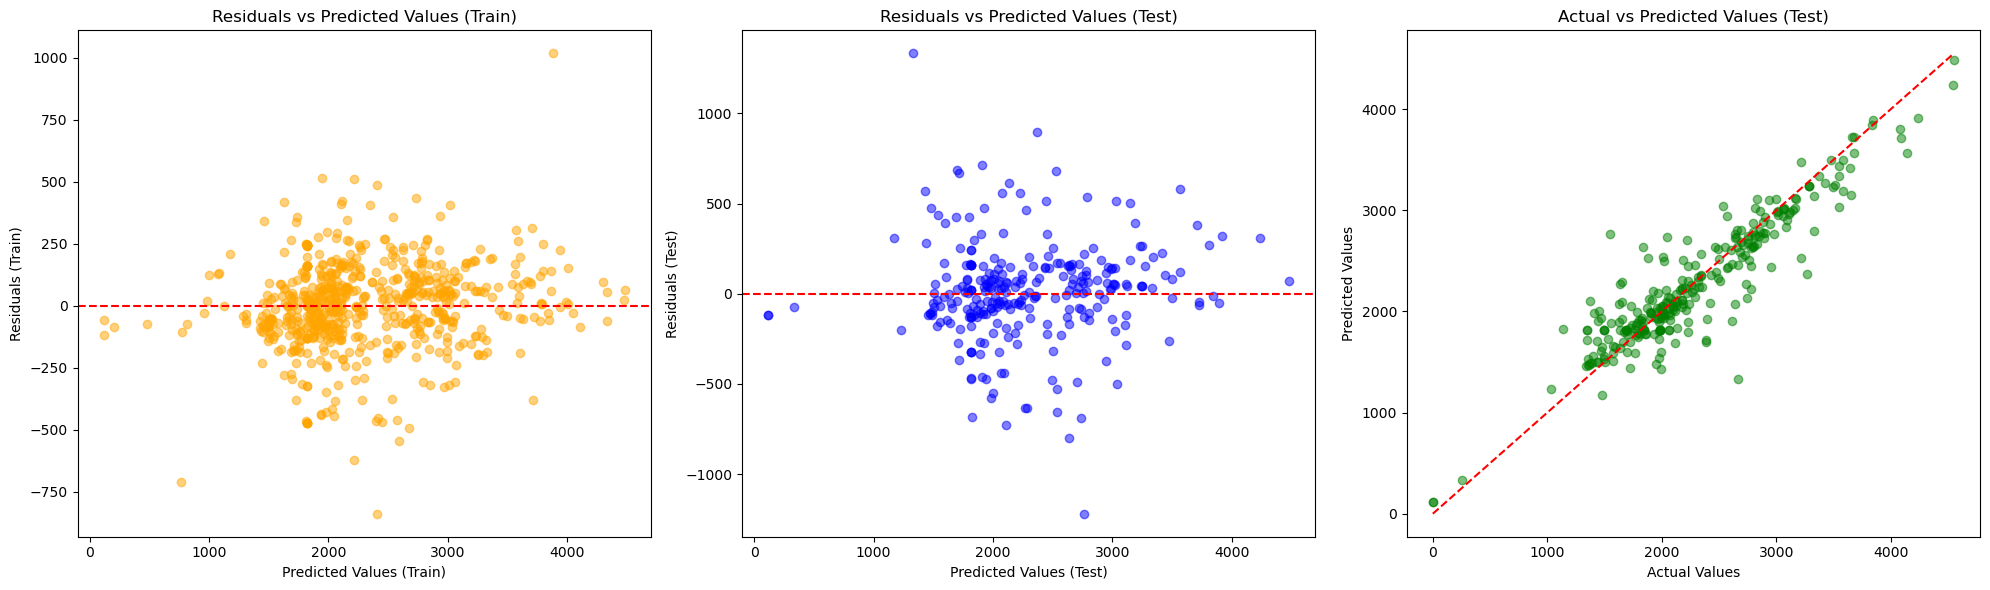

In [214]:
cat_params = {
    'depth': [None, 6, 8], 
    'iterations': [100, 200],
    'learning_rate': [0.01, 0.1],
    'l2_leaf_reg': [3, 5] 
}
cat_model = GridSearchCV(CatBoostRegressor(silent=True), cat_params, scoring='neg_mean_absolute_error', cv=3)
cat_model.fit(X_train, y_train)  # Fit model
results_tuning2.append(evaluate_model(cat_model.best_estimator_, 'CatBoost'))

### Gradien Boosting

<Figure size 1400x600 with 0 Axes>

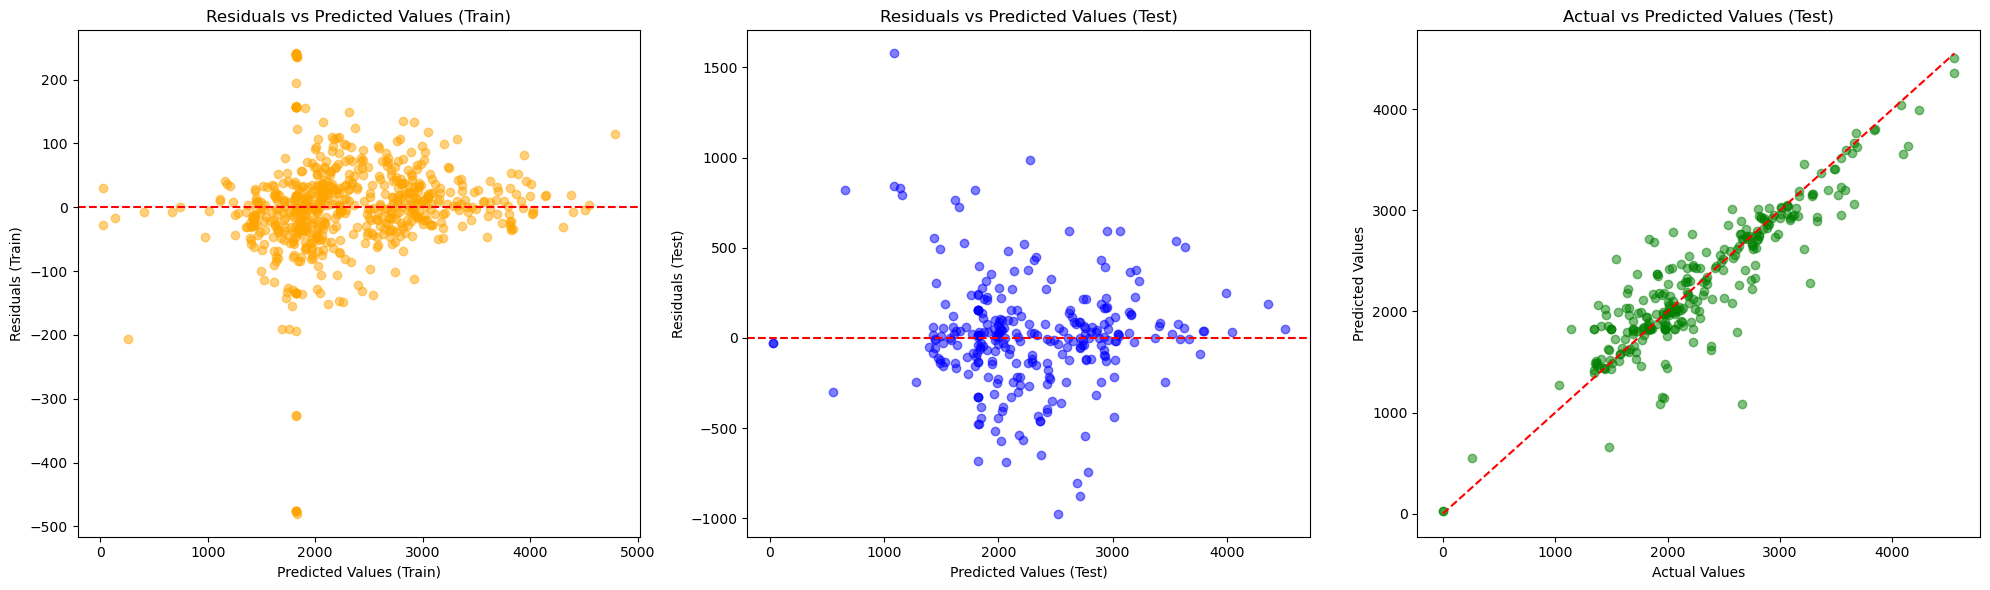

In [215]:
gb_params = {
    'n_estimators': [100, 200], 
    'learning_rate': [0.01, 0.1],
    'max_depth': [3, 5]
}
gb_model = GridSearchCV(GradientBoostingRegressor(), gb_params, scoring='neg_mean_absolute_error', cv=3)
gb_model.fit(X_train, y_train)  # Fit model
results_tuning2.append(evaluate_model(gb_model.best_estimator_, 'Gradient Boosting'))

## Hasil: Tuning

In [216]:
results_df = pd.DataFrame(results_tuning2)

results_df['RMSE Difference'] = results_df['RMSE Test'] - results_df['RMSE Train']
results_df['R2 Difference'] = results_df['R2 Test'] - results_df['R2 Train']
results_df['MAE Difference'] = results_df['MAE Test'] - results_df['MAE Train']
results_df['MAPE Difference'] = results_df['MAPE Test'] - results_df['MAPE Train']

results_df = results_df[columns_order].sort_values(by=['RMSE Test','RMSE Train','RMSE Difference'],ascending=[True,True,True])

results_df

Model  Training Time (s)  RMSE Train  RMSE Test  \
0           CatBoost            18.2992    163.9013   278.4642   
1  Gradient Boosting            11.8912     70.1928   300.0261   

   RMSE Difference  R2 Train  R2 Test  R2 Difference  MAE Train  MAE Test  \
0         114.5630    0.9475   0.8465        -0.1010   120.8953  192.0772   
1         229.8333    0.9904   0.8218        -0.1686    36.4813  199.8531   

   MAE Difference  Mean Residual Train  Mean Residual Test  \
0         71.1818              -0.0145             11.4130   
1        163.3719              -0.0000              9.8097   

             MAPE Train             MAPE Test       MAPE Difference  
0 1511347711075573.7500 3726044578393400.5000 2214696867317826.7500  
1  172759806854169.5625  872883257905206.5000  700123451051037.0000

Hasil tuning pada percobaan ini tidak menunjukkan hasil yang lebih baik daripada percobaan pada baseline.

# Dataset Feature Selection (Corr)

In [217]:
tr = 'C:/Users/Lenovo/Downloads/FitbitTrainData.csv'
ts = 'C:/Users/Lenovo/Downloads/FitbitTestData.csv'
import pandas as pd
df_tr = pd.read_csv(tr)
df_ts = pd.read_csv(ts)

In [218]:
correlation_matrix = df_tr.corr()

# Menginisialisasi daftar untuk fitur yang akan dihapus
to_drop = set()  # Menggunakan set untuk menghindari duplikasi

# Menentukan threshold korelasi
threshold = 0.95  # Threshold yang ingin diterapkan
print(f"Threshold korelasi: {threshold}")

# Kolom yang akan diperiksa, kecuali 'Calories'
checking = [x for x in correlation_matrix.columns if x != 'Calories']

# Iterasi untuk menemukan fitur dengan korelasi tinggi
for feature in checking:
    # Mencari fitur yang berkorelasi tinggi dengan fitur saat ini
    high_corr_features = correlation_matrix.index[abs(correlation_matrix[feature]) >= threshold].tolist()
    high_corr_features.remove(feature)  # Menghindari pencocokan dengan dirinya sendiri

    # Jika ada fitur berkorelasi tinggi
    if high_corr_features:
        print(f"\nFitur: {feature} berkorelasi tinggi dengan fitur: {high_corr_features}")
        
        # Menyimpan fitur yang akan dihapus
        to_drop.add(feature)  # Awalnya tambahkan fitur yang sedang dipertimbangkan untuk dihapus
        target_corr = correlation_matrix[feature]['Calories']
        print(f"Korelasi {feature} dengan Calories: {target_corr}")

        # Tentukan fitur mana yang akan dipertahankan
        for correlated_feature in high_corr_features:
            correlated_target_corr = correlation_matrix[correlated_feature]['Calories']
            print(f"Korelasi {correlated_feature} dengan Calories: {correlated_target_corr}")

            if abs(correlated_target_corr) > abs(target_corr):
                # Jika fitur berkorelasi tinggi memiliki korelasi target lebih besar, pertahankan itu
                print(f"Mempertahankan {correlated_feature} karena memiliki korelasi target lebih tinggi.")
                to_drop.discard(feature)  # Hapus dari daftar penghapusan
            else:
                # Hapus fitur yang memiliki korelasi target lebih rendah
                print(f"Menghapus {correlated_feature} karena memiliki korelasi target lebih rendah.")
                to_drop.add(correlated_feature)

# Print fitur yang akan dihapus
print("\nFitur yang akan dihapus:", to_drop)


Threshold korelasi: 0.95

Fitur: TrackerDistance berkorelasi tinggi dengan fitur: ['TotalDistance', 'TotalActiveDistance', 'TotalSteps']
Korelasi TrackerDistance dengan Calories: 0.6525996289095429
Korelasi TotalDistance dengan Calories: 0.6521908266219412
Menghapus TotalDistance karena memiliki korelasi target lebih rendah.
Korelasi TotalActiveDistance dengan Calories: 0.6352891943171637
Menghapus TotalActiveDistance karena memiliki korelasi target lebih rendah.
Korelasi TotalSteps dengan Calories: 0.6018335628227416
Menghapus TotalSteps karena memiliki korelasi target lebih rendah.

Fitur: TotalDistance berkorelasi tinggi dengan fitur: ['TrackerDistance', 'TotalActiveDistance', 'TotalSteps']
Korelasi TotalDistance dengan Calories: 0.6521908266219412
Korelasi TrackerDistance dengan Calories: 0.6525996289095429
Mempertahankan TrackerDistance karena memiliki korelasi target lebih tinggi.
Korelasi TotalActiveDistance dengan Calories: 0.6352891943171637
Menghapus TotalActiveDistance karen

In [219]:
train = df_tr.drop(columns=list(to_drop))
test = df_ts.drop(columns=list(to_drop))

In [220]:
X_train = train.drop(columns=['Calories'])
y_train = train['Calories']
X_test = test.drop(columns=['Calories'])
y_test = test['Calories']

## Model: Baseline

In [221]:
import numpy as np
import matplotlib.pyplot as plt
import time
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error, mean_absolute_percentage_error
from sklearn.model_selection import KFold

def evaluate_model(model, model_name):
    start_time = time.time()
    
    # Inisialisasi K-Fold
    kf = KFold(n_splits=3, shuffle=True, random_state=42)
    
    rmse_train_list = []
    r2_train_list = []
    mae_train_list = []
    mape_train_list = []
    
    # K-Fold Cross Validation
    for train_index, val_index in kf.split(X_train):
        X_train_fold, X_val_fold = X_train.iloc[train_index], X_train.iloc[val_index]
        y_train_fold, y_val_fold = y_train.iloc[train_index], y_train.iloc[val_index]
        
        # Latih model pada lipatan
        model.fit(X_train_fold, y_train_fold)
        y_train_pred = model.predict(X_train_fold)
        y_val_pred = model.predict(X_val_fold)
        
        # Hitung metrik untuk lipatan
        rmse_train_list.append(np.sqrt(mean_squared_error(y_train_fold, y_train_pred)))
        r2_train_list.append(r2_score(y_train_fold, y_train_pred))
        mae_train_list.append(mean_absolute_error(y_train_fold, y_train_pred))
        mape_train_list.append(mean_absolute_percentage_error(y_train_fold, y_train_pred))

    # Rata-rata metrik untuk data latih
    rmse_train = np.mean(rmse_train_list)
    r2_train = np.mean(r2_train_list)
    mae_train = np.mean(mae_train_list)
    mape_train = np.mean(mape_train_list)

    # Latih model dengan semua data latih untuk evaluasi
    model.fit(X_train, y_train)
    
    # Hitung prediksi untuk data uji
    y_test_pred = model.predict(X_test)
    
    # Hitung metrik untuk data uji
    rmse_test = np.sqrt(mean_squared_error(y_test, y_test_pred))
    r2_test = r2_score(y_test, y_test_pred)
    mae_test = mean_absolute_error(y_test, y_test_pred)
    mape_test = mean_absolute_percentage_error(y_test, y_test_pred)

    # Hitung residual untuk data latih dan data uji
    y_train_pred = model.predict(X_train)  # Prediksi pada seluruh data latih
    residuals_train = y_train - y_train_pred
    residuals_test = y_test - y_test_pred
    mean_residual_train = np.mean(residuals_train)
    mean_residual_test = np.mean(residuals_test)

    # Plot residual
    plt.figure(figsize=(14, 6))

    # Plot residual dan nilai aktual vs prediksi
    plt.figure(figsize=(20, 6))

    # Residuals vs Predicted Values (data latih)
    plt.subplot(1, 3, 1)
    plt.scatter(y_train_pred, residuals_train, color='orange', alpha=0.5)
    plt.axhline(y=0, color='red', linestyle='--')
    plt.title('Residuals vs Predicted Values (Train)')
    plt.xlabel('Predicted Values (Train)')
    plt.ylabel('Residuals (Train)')
    
    # Residuals vs Predicted Values (data uji)
    plt.subplot(1, 3, 2)
    plt.scatter(y_test_pred, residuals_test, color='blue', alpha=0.5)
    plt.axhline(y=0, color='red', linestyle='--')
    plt.title('Residuals vs Predicted Values (Test)')
    plt.xlabel('Predicted Values (Test)')
    plt.ylabel('Residuals (Test)')
    
    # Actual vs Predicted Values (data uji)
    plt.subplot(1, 3, 3)
    plt.scatter(y_test, y_test_pred, color='green', alpha=0.5)
    plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')  # Garis diagonal
    plt.title('Actual vs Predicted Values (Test)')
    plt.xlabel('Actual Values')
    plt.ylabel('Predicted Values')

    plt.tight_layout()
    plt.show()

    end_time = time.time()
    training_time = end_time - start_time

    return {
        'Model': model_name,
        'Training Time (s)': training_time,
        'RMSE Train': rmse_train,
        'RMSE Test': rmse_test,
        'R2 Train': r2_train,
        'R2 Test': r2_test,
        'MAE Train': mae_train,
        'MAE Test': mae_test,
        'Mean Residual Train': mean_residual_train,
        'Mean Residual Test': mean_residual_test,
        'MAPE Train': mape_train,
        'MAPE Test': mape_test
    }

results_df3 = []


### Random Forest

<Figure size 1400x600 with 0 Axes>

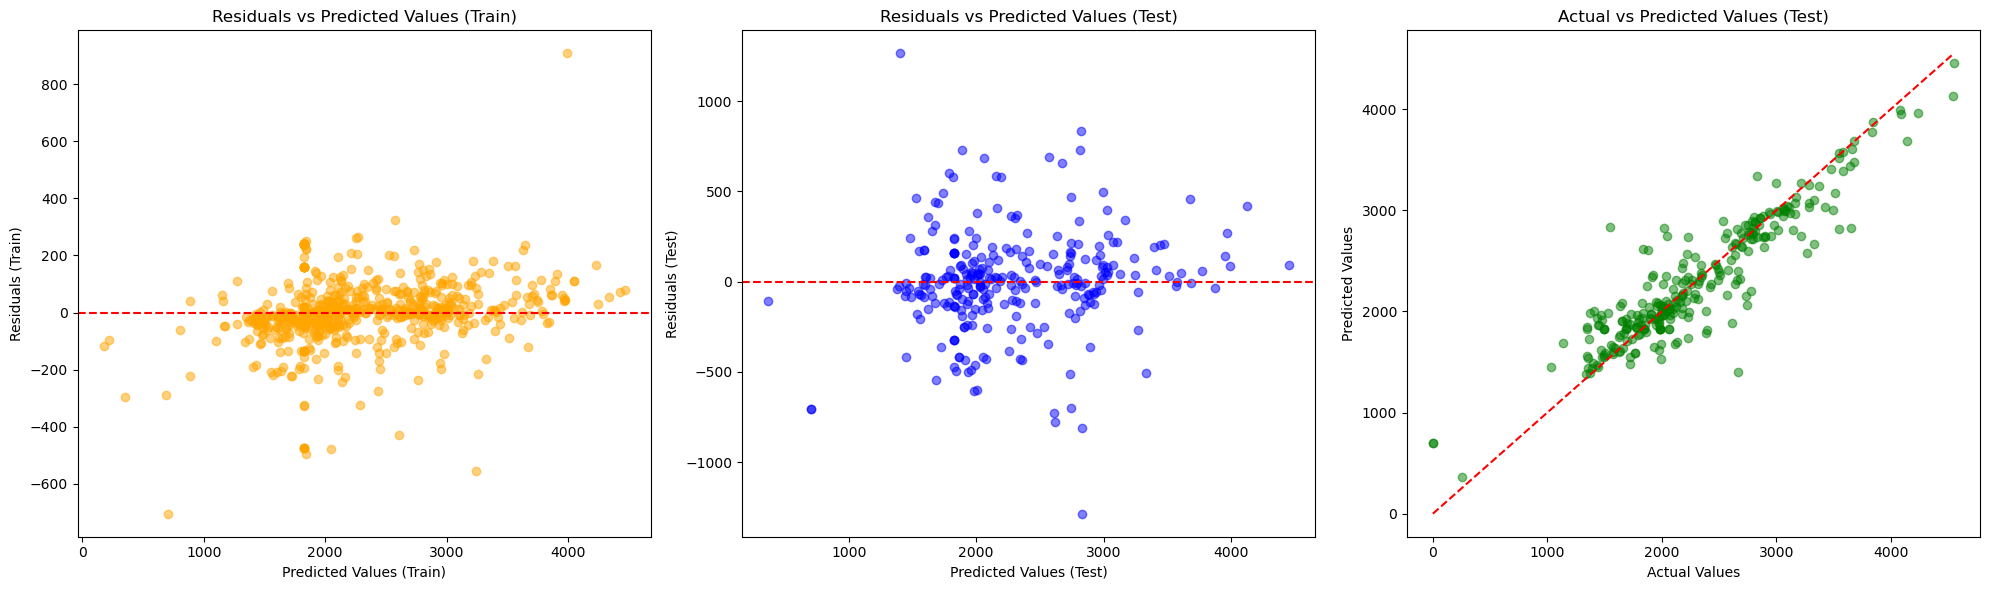

{'Model': 'Random Forest',
 'Training Time (s)': 22.43029808998108,
 'RMSE Train': 120.35258565695885,
 'RMSE Test': 282.9361705133206,
 'R2 Train': 0.9716352453474735,
 'R2 Test': 0.8415228136109776,
 'MAE Train': 78.92452650997278,
 'MAE Test': 191.68972609439913,
 'Mean Residual Train': -3.170700884039271,
 'Mean Residual Test': 1.1532244230847404,
 'MAPE Train': 4320919368512925.5,
 'MAPE Test': 2.248829354356557e+16}

In [222]:
rf_results = evaluate_model(RandomForestRegressor(random_state=42), 'Random Forest')
results_df3.append(rf_results)
rf_results

### Linear Regression

<Figure size 1400x600 with 0 Axes>

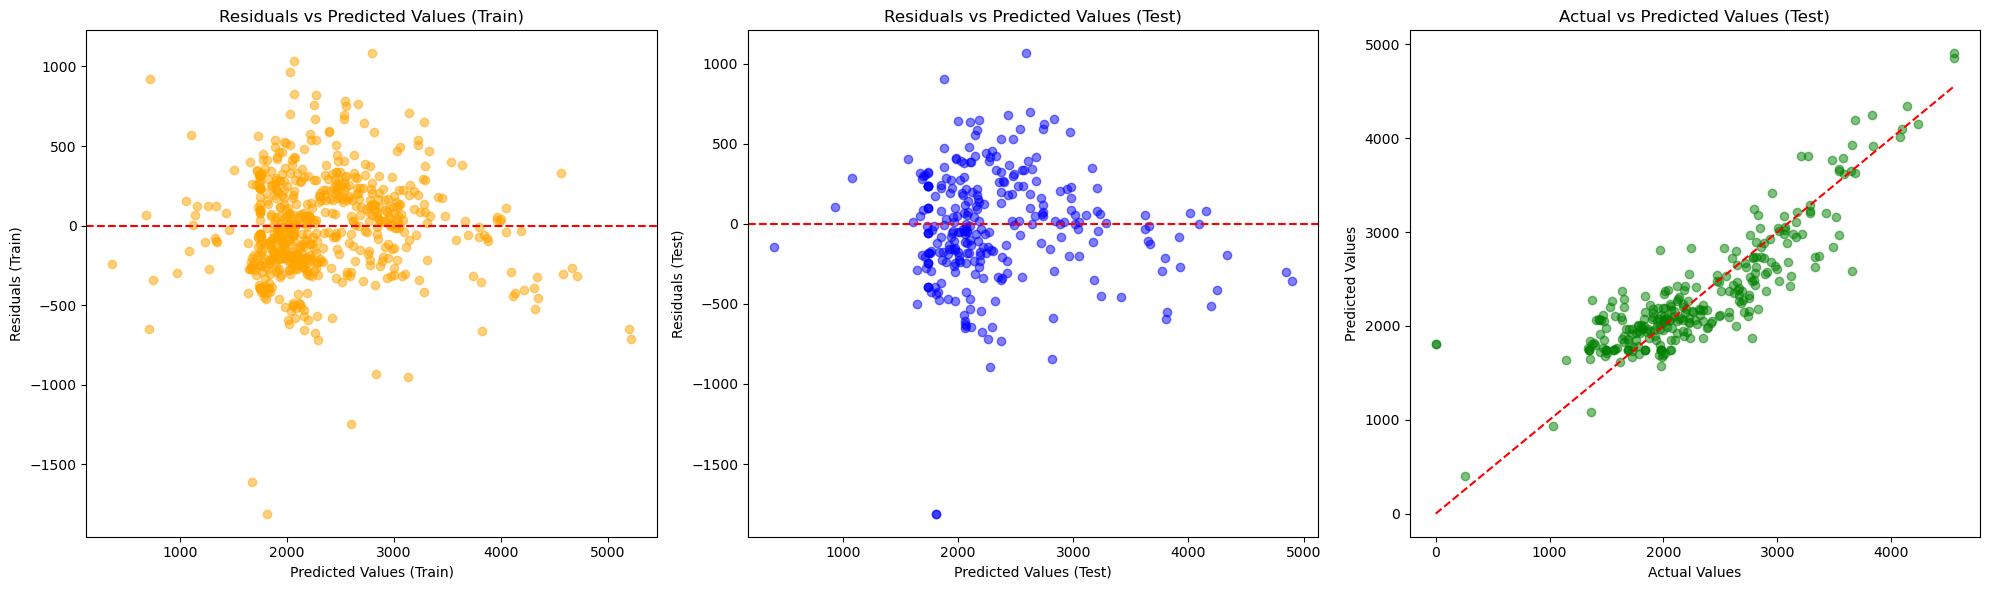

{'Model': 'Linear Regression',
 'Training Time (s)': 7.037172794342041,
 'RMSE Train': 303.5083919160655,
 'RMSE Test': 354.7762328992191,
 'R2 Train': 0.8196639870827201,
 'R2 Test': 0.7508282251093941,
 'MAE Train': 232.68522850542445,
 'MAE Test': 264.4763963270253,
 'Mean Residual Train': -4.7066696895402676e-14,
 'Mean Residual Test': -20.97648376337506,
 'MAPE Train': 1.2015279576740702e+16,
 'MAPE Test': 5.7823178723368824e+16}

In [223]:
lr_results = evaluate_model(LinearRegression(), 'Linear Regression')
results_df3.append(lr_results)
lr_results

### Ridge

<Figure size 1400x600 with 0 Axes>

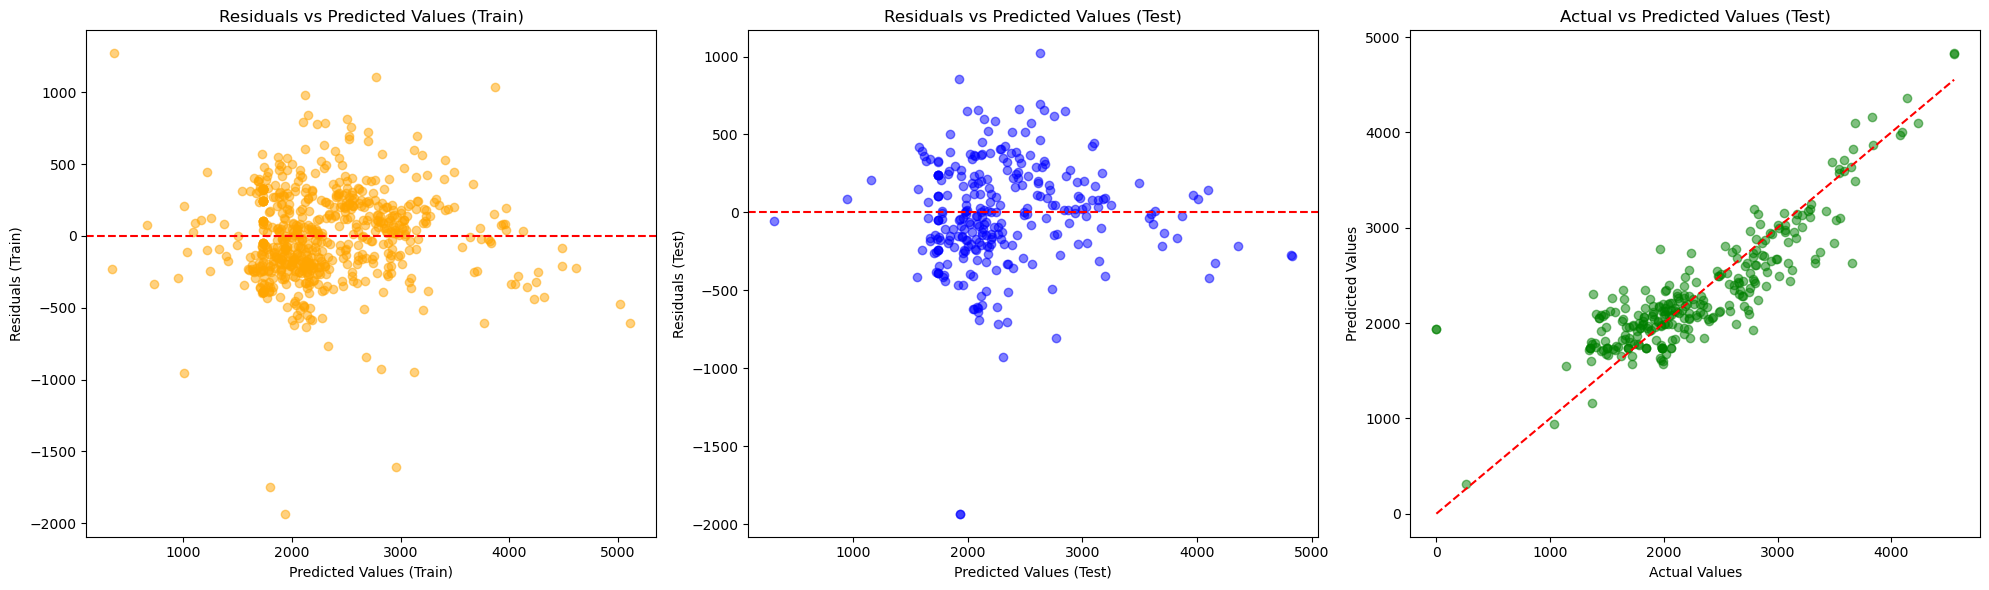

{'Model': 'Ridge',
 'Training Time (s)': 6.802810430526733,
 'RMSE Train': 312.6992508231676,
 'RMSE Test': 347.7770371180091,
 'R2 Train': 0.8086501979102346,
 'R2 Test': 0.7605628049426791,
 'MAE Train': 237.80530804938,
 'MAE Test': 254.86629664495212,
 'Mean Residual Train': 7.198435995767468e-14,
 'Mean Residual Test': -12.060997890913507,
 'MAPE Train': 1.3110022194097974e+16,
 'MAPE Test': 6.174501804296112e+16}

In [224]:
ridge_results = evaluate_model(Ridge(random_state=42), 'Ridge')
results_df3.append(ridge_results)
ridge_results

### Lasso

c:\Users\Lenovo\anacond3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:678: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.173e+06, tolerance: 2.288e+04
  model = cd_fast.enet_coordinate_descent(
c:\Users\Lenovo\anacond3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:678: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.014e+06, tolerance: 2.033e+04
  model = cd_fast.enet_coordinate_descent(
c:\Users\Lenovo\anacond3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:678: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.347e+06, toleranc

<Figure size 1400x600 with 0 Axes>

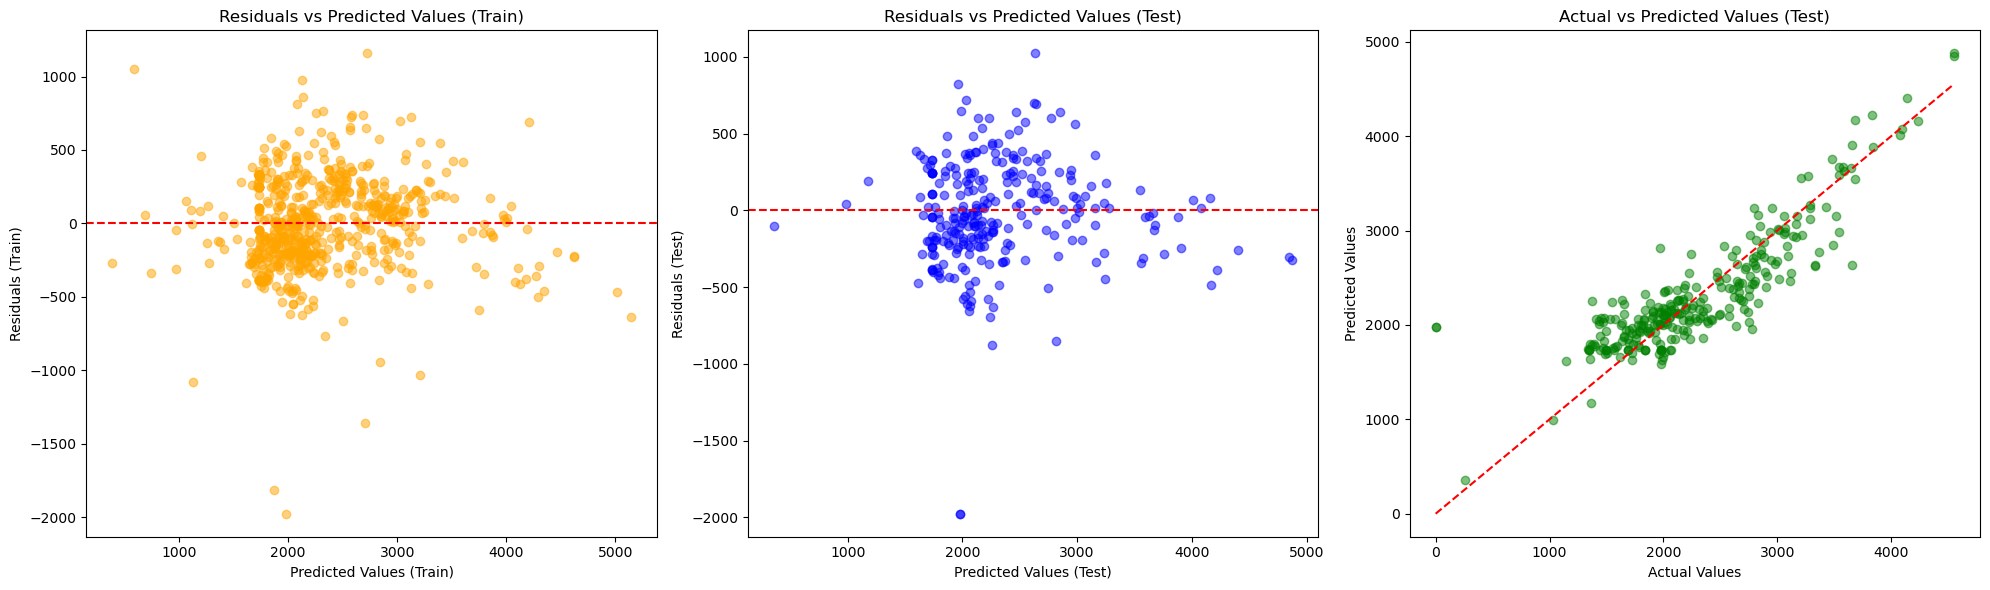

{'Model': 'Lasso',
 'Training Time (s)': 6.5410192012786865,
 'RMSE Train': 306.5120458407678,
 'RMSE Test': 349.3120331548027,
 'R2 Train': 0.8160480455725692,
 'R2 Test': 0.7584445153046852,
 'MAE Train': 235.32131198247248,
 'MAE Test': 257.89437007987584,
 'Mean Residual Train': 1.8965110219618137e-13,
 'Mean Residual Test': -17.554626125153355,
 'MAPE Train': 1.3036561742897088e+16,
 'MAPE Test': 6.3111285680449656e+16}

In [225]:
lasso_results = evaluate_model(Lasso(random_state=42), 'Lasso')
results_df3.append(lasso_results)
lasso_results

### Elastic Net

<Figure size 1400x600 with 0 Axes>

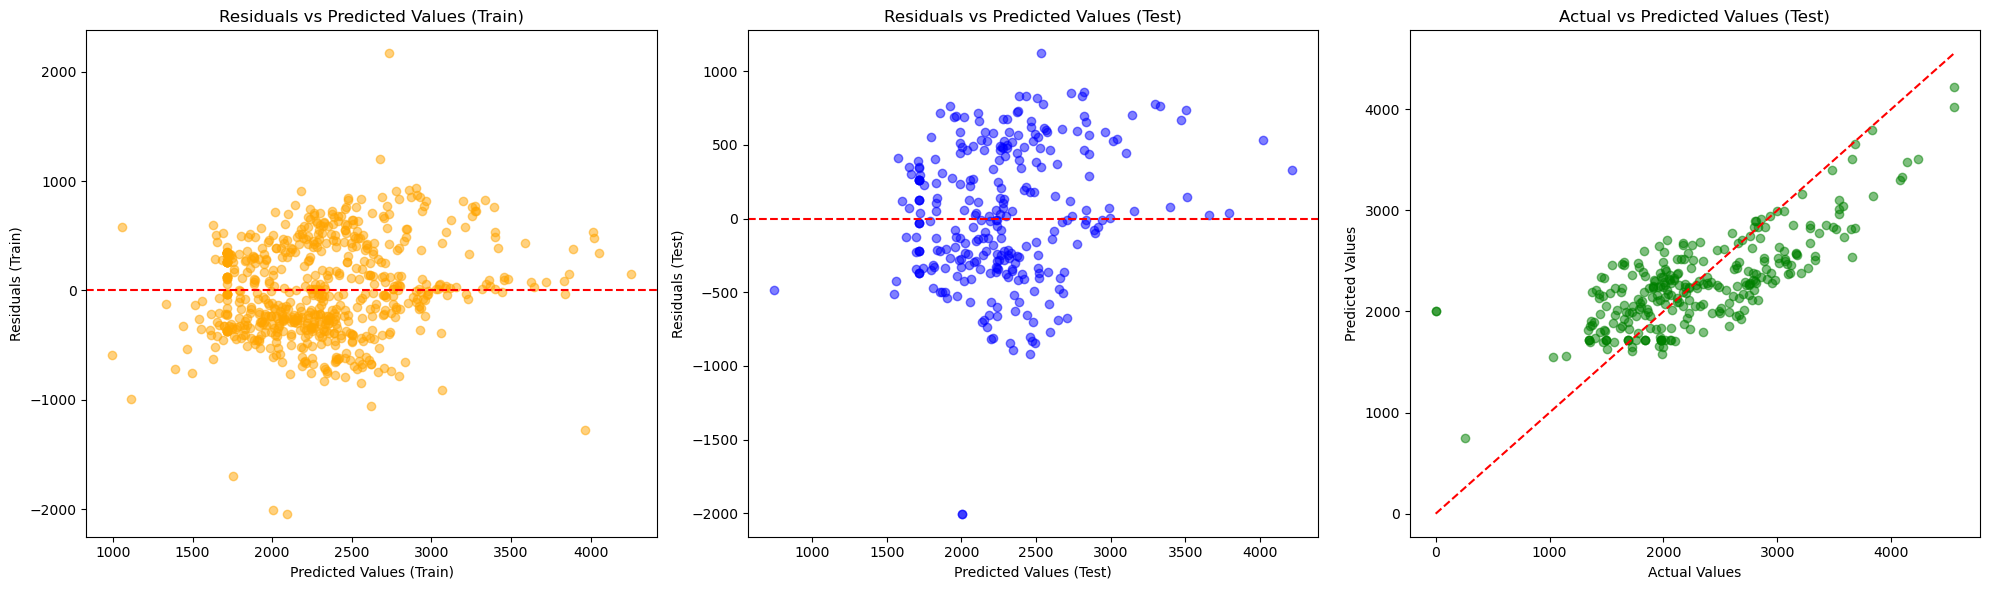

{'Model': 'Elastic Net',
 'Training Time (s)': 6.182002305984497,
 'RMSE Train': 441.27428453201446,
 'RMSE Test': 467.9691767390504,
 'R2 Train': 0.6181510087337693,
 'R2 Test': 0.5664648574123443,
 'MAE Train': 356.0789405102285,
 'MAE Test': 379.6896147248797,
 'Mean Residual Train': 1.4396871991534936e-13,
 'Mean Residual Test': 21.29914985307144,
 'MAPE Train': 1.3648921146107792e+16,
 'MAPE Test': 6.396153273109484e+16}

In [226]:
elastic_net_results = evaluate_model(ElasticNet(random_state=42), 'Elastic Net')
results_df3.append(elastic_net_results)
elastic_net_results

### Decision Tree

<Figure size 1400x600 with 0 Axes>

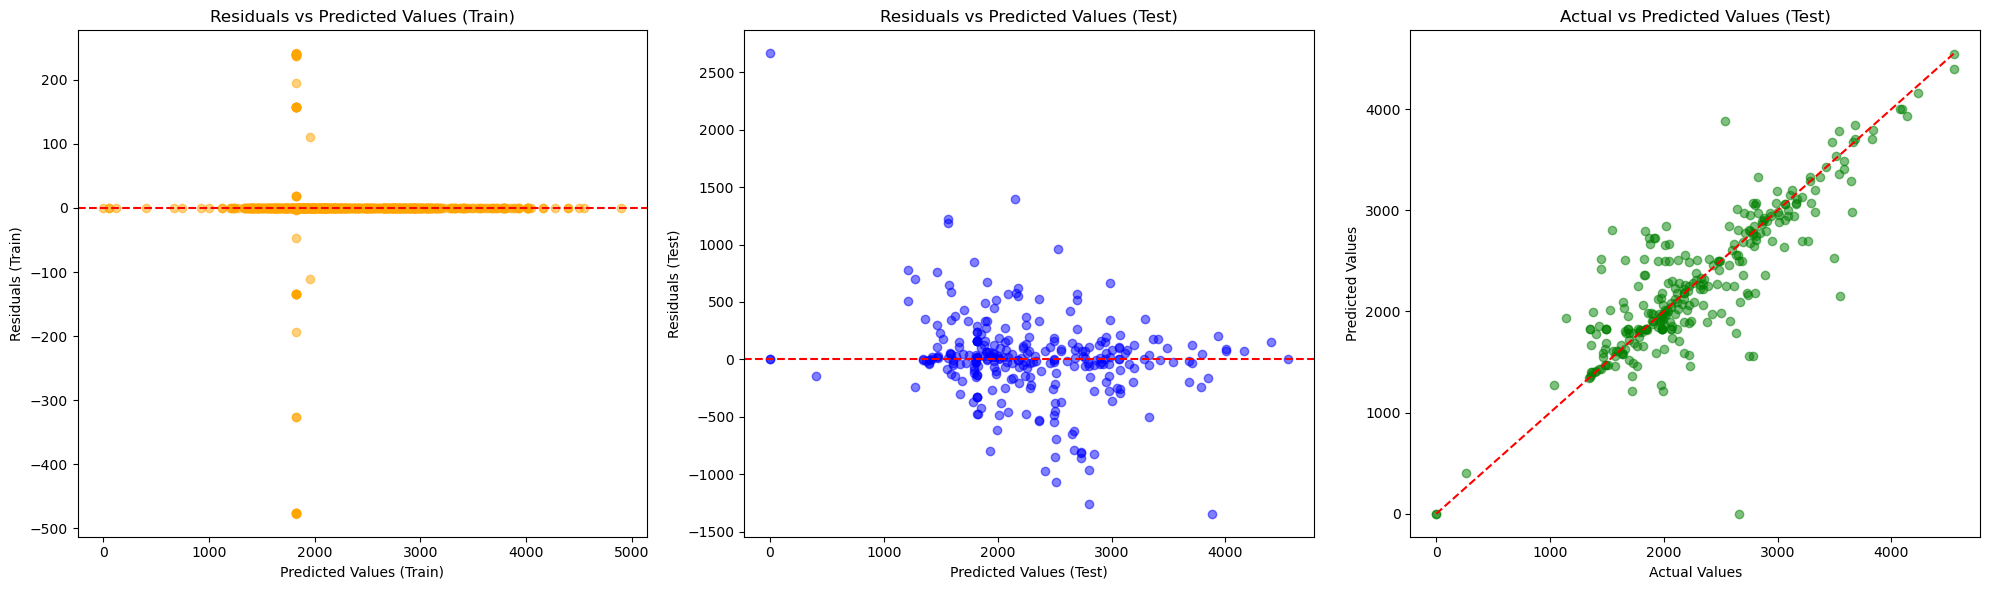

{'Model': 'Decision Tree',
 'Training Time (s)': 6.863250732421875,
 'RMSE Train': 62.75153327964148,
 'RMSE Test': 384.3819261850408,
 'R2 Train': 0.9923046372362894,
 'R2 Test': 0.7075068313496324,
 'MAE Train': 13.566958295819894,
 'MAE Test': 233.625554978954,
 'Mean Residual Train': 5.191179804640001e-15,
 'Mean Residual Test': 9.541544138845651,
 'MAPE Train': 0.008080547056358725,
 'MAPE Test': 0.11203734621384548}

In [227]:
dt_results = evaluate_model(DecisionTreeRegressor(random_state=42), 'Decision Tree')
results_df3.append(dt_results)
dt_results

### XGBoost

<Figure size 1400x600 with 0 Axes>

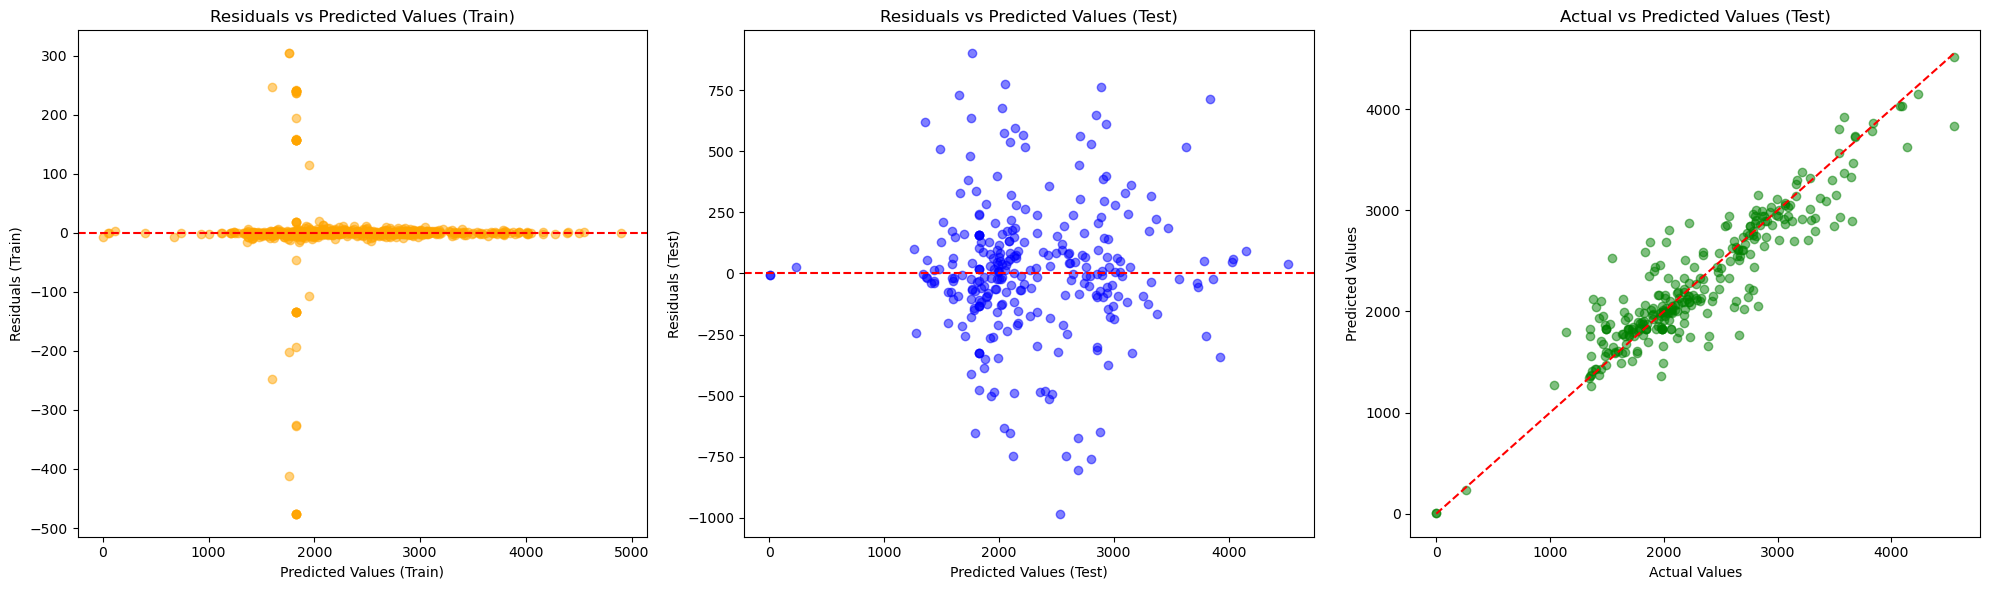

{'Model': 'XGBoost',
 'Training Time (s)': 11.685847520828247,
 'RMSE Train': 62.99863208022959,
 'RMSE Test': 279.2535989210037,
 'R2 Train': 0.992244869374943,
 'R2 Test': 0.8456213042421659,
 'MAE Train': 14.720401779520275,
 'MAE Test': 193.18727435456947,
 'Mean Residual Train': -0.003307334545721928,
 'Mean Residual Test': 11.136313374160874,
 'MAPE Train': 23161567215167.13,
 'MAPE Test': 200946670158869.88}

In [228]:
xgb_results = evaluate_model(XGBRegressor(random_state=42), 'XGBoost')
results_df3.append(xgb_results)
xgb_results

### Gradien Boosting

<Figure size 1400x600 with 0 Axes>

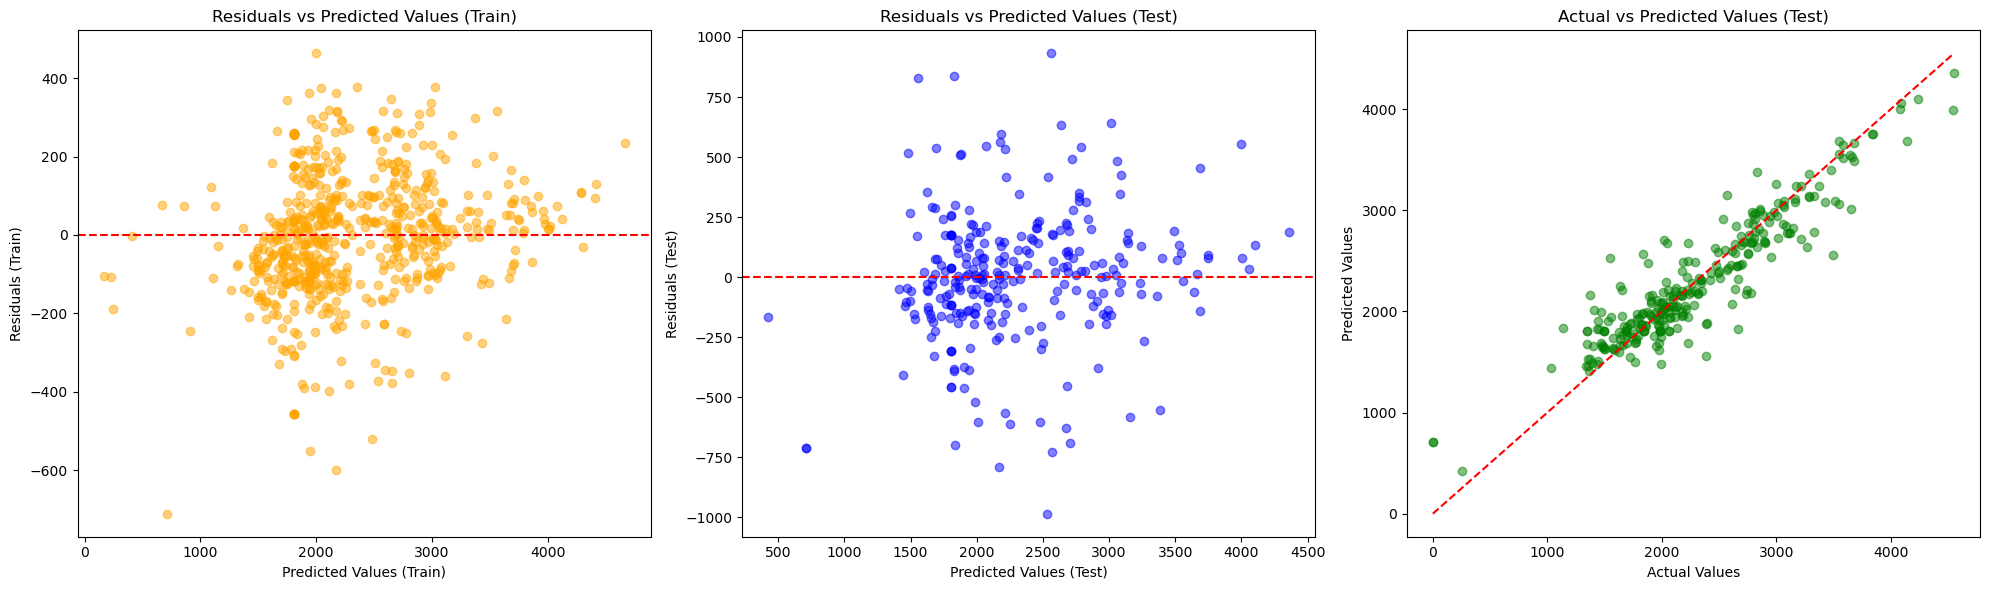

{'Model': 'Gradient Boosting',
 'Training Time (s)': 13.20249342918396,
 'RMSE Train': 140.07401063943817,
 'RMSE Test': 274.40960920803815,
 'R2 Train': 0.9612686509677816,
 'R2 Test': 0.8509306216163227,
 'MAE Train': 104.17778335469575,
 'MAE Test': 195.9206058300117,
 'Mean Residual Train': -5.900641044607469e-14,
 'Mean Residual Test': 3.8328592953306706,
 'MAPE Train': 3855037284195368.0,
 'MAPE Test': 2.2727027282376796e+16}

In [229]:
gb_results = evaluate_model(GradientBoostingRegressor(random_state=42), 'Gradient Boosting')
results_df3.append(gb_results)
gb_results

### Support Vector Regressor

<Figure size 1400x600 with 0 Axes>

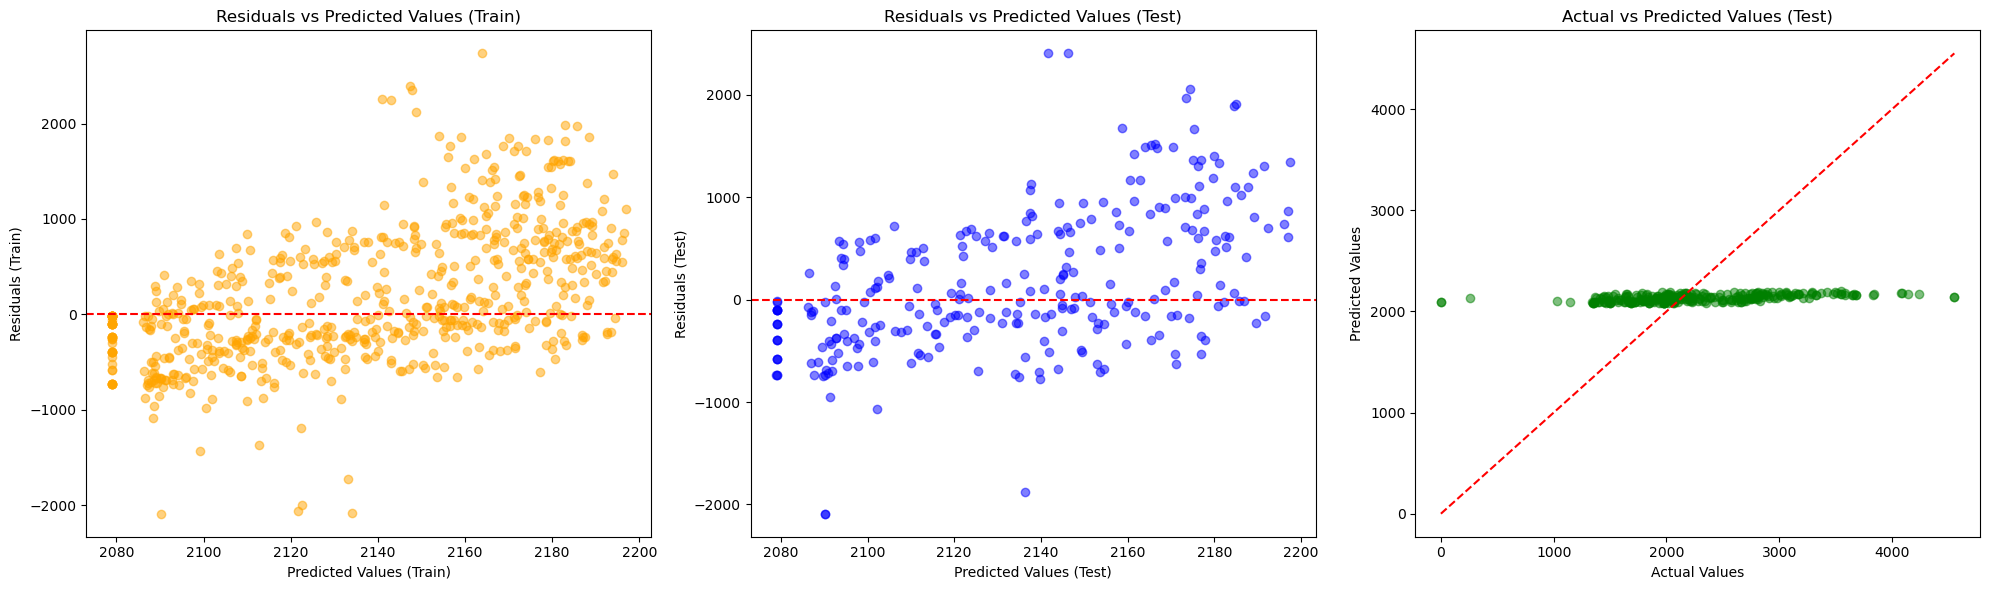

{'Model': 'Support Vector Regressor',
 'Training Time (s)': 8.366624116897583,
 'RMSE Train': 720.1974797870861,
 'RMSE Test': 711.4569964966615,
 'R2 Train': -0.014759915399857179,
 'R2 Test': -0.0020447547182600445,
 'MAE Train': 547.2191669225344,
 'MAE Test': 539.7623369169579,
 'Mean Residual Train': 172.3523011079304,
 'Mean Residual Test': 163.82900616325136,
 'MAPE Train': 1.4589486173022678e+16,
 'MAPE Test': 6.6764436555521816e+16}

In [230]:
svr_results = evaluate_model(SVR(), 'Support Vector Regressor')
results_df3.append(svr_results)
svr_results

### Bayesian Ridge

<Figure size 1400x600 with 0 Axes>

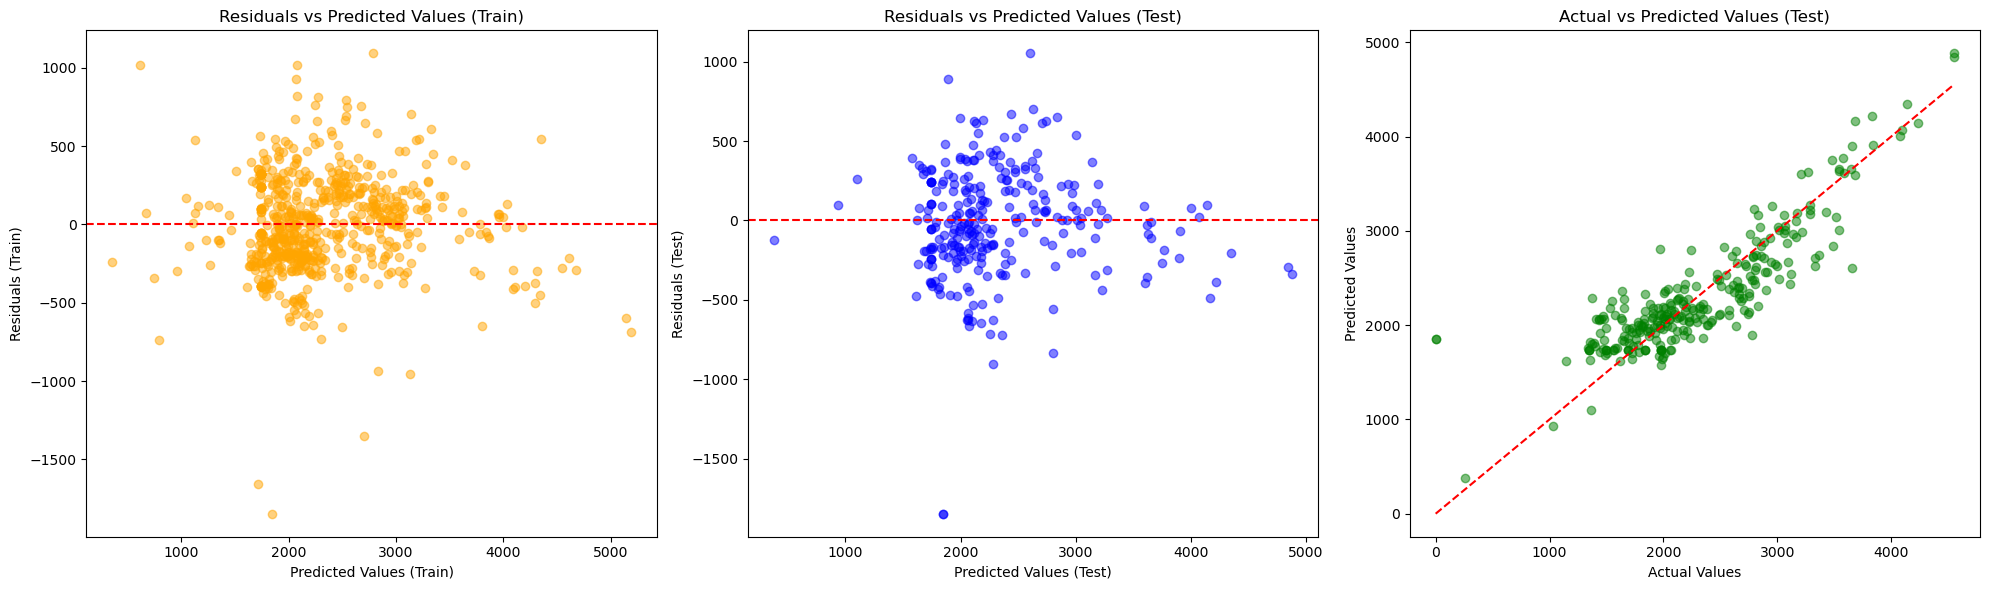

{'Model': 'Bayesian Ridge',
 'Training Time (s)': 8.031491756439209,
 'RMSE Train': 304.9920415855042,
 'RMSE Test': 350.86507880281516,
 'R2 Train': 0.8178800288513819,
 'R2 Test': 0.7562918230867824,
 'MAE Train': 233.54898166990824,
 'MAE Test': 260.71348400682666,
 'Mean Residual Train': 3.052413725128321e-13,
 'Mean Residual Test': -18.371502335660143,
 'MAPE Train': 1.2462114006606534e+16,
 'MAPE Test': 5.901204727085292e+16}

In [231]:
br_results = evaluate_model(BayesianRidge(), 'Bayesian Ridge')
results_df3.append(br_results)
br_results

### CatBoost Regressor

<Figure size 1400x600 with 0 Axes>

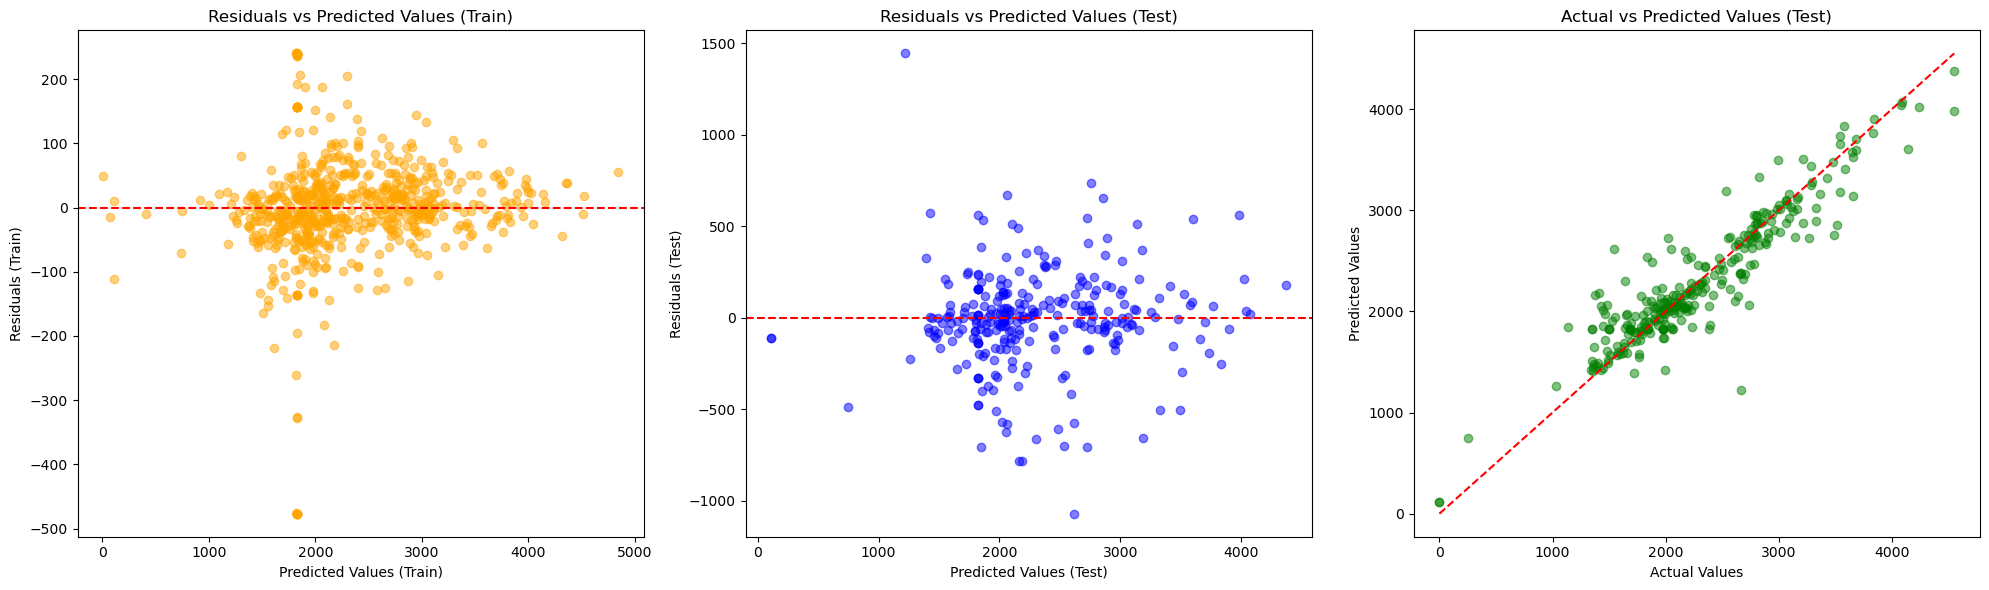

{'Model': 'CatBoost Regressor',
 'Training Time (s)': 100.33050608634949,
 'RMSE Train': 76.49394597290701,
 'RMSE Test': 270.4132975797899,
 'R2 Train': 0.9885235569645863,
 'R2 Test': 0.8552408920115167,
 'MAE Train': 44.25013088011395,
 'MAE Test': 181.4164834178264,
 'Mean Residual Train': -0.053221520042927524,
 'Mean Residual Test': -7.864668894994316,
 'MAPE Train': 651619353870624.4,
 'MAPE Test': 3559553681252686.0}

In [232]:
cb_results = evaluate_model(CatBoostRegressor(random_state=42, silent=True), 'CatBoost Regressor')
results_df3.append(cb_results)
cb_results

### Extra Trees Regressor

<Figure size 1400x600 with 0 Axes>

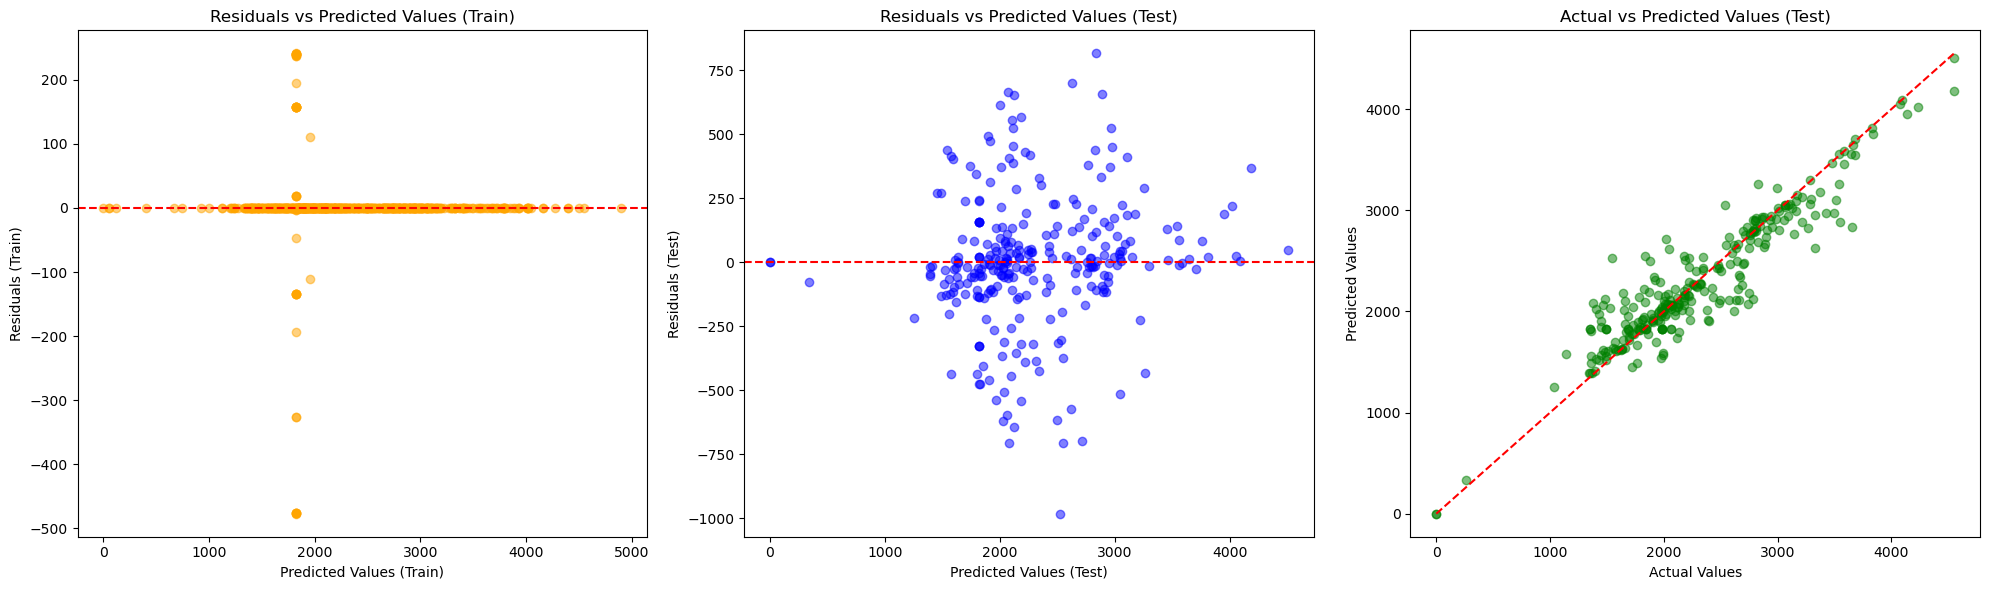

{'Model': 'Extra Trees Regressor',
 'Training Time (s)': 16.25655198097229,
 'RMSE Train': 62.75153327964148,
 'RMSE Test': 259.68845664610984,
 'R2 Train': 0.9923046372362894,
 'R2 Test': 0.86649574718407,
 'MAE Train': 13.566958295819875,
 'MAE Test': 177.41611457072017,
 'Mean Residual Train': -1.5227460760277336e-14,
 'Mean Residual Test': 2.659621461108217,
 'MAPE Train': 0.008080547056358724,
 'MAPE Test': 0.08624476777968153}

In [233]:
et_results = evaluate_model(ExtraTreesRegressor(random_state=42), 'Extra Trees Regressor')
results_df3.append(et_results)
et_results

## Hasil: Baseline

In [234]:
results_df = pd.DataFrame(results_df3)

results_df['RMSE Difference'] = results_df['RMSE Test'] - results_df['RMSE Train']
results_df['R2 Difference'] = results_df['R2 Test'] - results_df['R2 Train']
results_df['MAE Difference'] = results_df['MAE Test'] - results_df['MAE Train']
results_df['MAPE Difference'] = results_df['MAPE Test'] - results_df['MAPE Train']

# Menentukan urutan kolom yang diinginkan
columns_order = [
    'Model', 'Training Time (s)', 
    'RMSE Train', 'RMSE Test', 'RMSE Difference',
    'R2 Train', 'R2 Test', 'R2 Difference',
    'MAE Train', 'MAE Test', 'MAE Difference',
    'Mean Residual Train', 'Mean Residual Test',
    'MAPE Train', 'MAPE Test', 'MAPE Difference'
]

# Mengatur urutan kolom dan mengurutkan hasil berdasarkan beberapa metrik
results_df = results_df[columns_order].sort_values(
    by=['MAE Difference'],
    ascending=[True]
)

pd.options.display.float_format = '{:.4f}'.format
# Tampilkan DataFrame hasil
results_df

Model  Training Time (s)  RMSE Train  RMSE Test  \
8   Support Vector Regressor             8.3666    720.1975   711.4570   
2                      Ridge             6.8028    312.6993   347.7770   
3                      Lasso             6.5410    306.5120   349.3120   
4                Elastic Net             6.1820    441.2743   467.9692   
9             Bayesian Ridge             8.0315    304.9920   350.8651   
1          Linear Regression             7.0372    303.5084   354.7762   
7          Gradient Boosting            13.2025    140.0740   274.4096   
0              Random Forest            22.4303    120.3526   282.9362   
10        CatBoost Regressor           100.3305     76.4939   270.4133   
11     Extra Trees Regressor            16.2566     62.7515   259.6885   
6                    XGBoost            11.6858     62.9986   279.2536   
5              Decision Tree             6.8633     62.7515   384.3819   

    RMSE Difference  R2 Train  R2 Test  R2 Difference  MAE Train  MAE Test  \
8           -8.7405   -0.0148  -0.0020         0.0127   547.2192  539.7623   
2           35.0778    0.8087   0.7606        -0.0481   237.8053  254.8663   
3           42.8000    0.8160   0.7584        -0.0576   235.3213  257.8944   
4           26.6949    0.6182   0.5665        -0.0517   356.0789  379.6896   
9           45.8730    0.8179   0.7563        -0.0616   233.5490  260.7135   
1           51.2678    0.8197   0.7508        -0.0688   232.6852  264.4764   
7          134.3356    0.9613   0.8509        -0.1103   104.1778  195.9206   
0          162.5836    0.9716   0.8415        -0.1301    78.9245  191.6897   
10         193.9194    0.9885   0.8552        -0.1333    44.2501  181.4165   
11         196.9369    0.9923   0.8665        -0.1258    13.5670  177.4161   
6          216.2550    0.9922   0.8456        -0.1466    14.7204  193.1873   
5          321.6304    0.9923   0.7075        -0.2848    13.5670  233.6256   

    MAE Difference  Mean Residual Train  Mean Residual Test  \
8          -7.4568             172.3523            163.8290   
2          17.0610               0.0000            -12.0610   
3          22.5731               0.0000            -17.5546   
4          23.6107               0.0000             21.2991   
9          27.1645               0.0000            -18.3715   
1          31.7912              -0.0000            -20.9765   
7          91.7428              -0.0000              3.8329   
0         112.7652              -3.1707              1.1532   
10        137.1664              -0.0532             -7.8647   
11        163.8492              -0.0000              2.6596   
6         178.4669              -0.0033             11.1363   
5         220.0586               0.0000              9.5415   

               MAPE Train              MAPE Test        MAPE Difference  
8  14589486173022678.0000 66764436555521816.0000 52174950382499136.0000  
2  13110022194097974.0000 61745018042961120.0000 48634995848863144.0000  
3  13036561742897088.0000 63111285680449656.0000 50074723937552568.0000  
4  13648921146107792.0000 63961532731094840.0000 50312611584987048.0000  
9  12462114006606534.0000 59012047270852920.0000 46549933264246384.0000  
1  12015279576740702.0000 57823178723368824.0000 45807899146628120.0000  
7   3855037284195368.0000 22727027282376796.0000 18871989998181428.0000  
0   4320919368512925.5000 22488293543565568.0000 18167374175052644.0000  
10   651619353870624.3750  3559553681252686.0000  2907934327382061.5000  
11                 0.0081                 0.0862                 0.0782  
6     23161567215167.1289   200946670158869.8750   177785102943702.7500  
5                  0.0081                 0.1120                 0.1040

Data tersebut diurutkan berdasarkan MAE Test terkecil, dengan syarat perbedaan score dengan MAE Train tidak terlalu besar. Sehingga dapat disimpulkan 4 model terbaik pada dataset dengan treatment feature selection: Ridge, Lasso, Linear Regression, dan Bayesian Ridge. Namun hasil ini tidak jauh berbeda dan tidak jauh lebih baik daripada hasil evaluasi dataset tanpa perlakuan apa-apa. 